# Credit Card Fraud Detection
<font color=green size=3>- Shashank Pawaskar (C48)</font>

## Introduction

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The data set is taken from the __[Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)__ website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

# Business problem overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

Understanding and defining fraud
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing

## Data dictionary

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013.
- Out of a total of 2,84,807 transactions, 492 were fraudulent.
- This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions.
- The data set has also been modified with principal component analysis (PCA) to maintain confidentiality.
    - Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA.
    - The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions.
    - The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

## Project pipeline
The project pipeline can be briefly summarised in the following four steps:

- **Data Understanding:** Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.
- **Exploratory data analytics (EDA):** Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.
- **Train/Test split:** Now, you are familiar with the train/test split that you can perform to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
- **Model Building / Hyperparameter Tuning:** This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given data set. You should try and check if you get a better model by various sampling techniques.
- **Model evaluation:** Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

# Library Imports

In [ ]:
# Imported Libraries
!pip install tensorflow
!pip install seaborn
!pip install xgboost
!pip install imblearn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib.pyplot as show
from matplotlib.colors import ListedColormap
#from plotnine import *
import matplotlib.pyplot as Pyplot
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import shapiro
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import collections
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

# Other Libraries
from sklearn.model_selection import train_test_split,validation_curve, StratifiedShuffleSplit,StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from imblearn import over_sampling
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 479.6 MB 33 kB/s s eta 0:00:01
     |████████████████████████████████| 440 kB 70.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 2.4 MB 33.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 82.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 22.9 MB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 84.7 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 104.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 106.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 102.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 62.3 MB/s eta 0:00:01
     |████████████████████████████████| 186 kB 80.2 MB/s eta 0:00:01
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.6.0
    Uninstal

2024-02-17 06:09:16.670684: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-17 06:09:16.730122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
# Clss for Print Formatting
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**Un-Comment the below, if using Google Drive**

Create folder "Capstone Project", under your Google Drive Folder.

In [ ]:
# Mount Google Drive
#import os
#from google.colab import drive
#drive.mount('/content/gdrive')
# Setting root path for the notebook and data set
#root_path = '/content/gdrive/MyDrive/Capstone Project/'  #change dir to your project folder
#os.chdir(root_path)

# Data Understanding

## Load Data

In [ ]:
# Load data from the dataset CSV file
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### View Columns and Datatypes

In [ ]:
# Check the columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Total of 284807 rows in the dataset**

## Data - Statistical Information

In [ ]:
# Check the statistical information of the dataset
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

## Data - Null Value Check

In [ ]:
# Check for Null Values
# The data is PCA transformed and not likely to have NULL values, but we will still check for null values
df.isnull().sum().max()

0

**No Null values to handle**

In [ ]:
# Convert Time from seconds to hours
df['Time'] =df['Time']/3600

# Exploratory data analytics (EDA)

## Distribution of Classes

In [ ]:
#observe the different feature type present in the data
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100,2)
print(color.BOLD+"% of Non-Fraudulant Transactions :" +color.END+ str(normal_share))
print(color.BOLD+"% of Fraudulant Transactions :" + color.END+ str(fraud_share))

% of Non-Fraudulant Transactions :99.83
% of Fraudulant Transactions :0.17


**Note :** The Dataset is imbalanced.
- Over 99% of the transactions are non-fraud and only 0.17% of transaction are fraud.

Using this data as-is for our predictive models and analysis, we will get a lot of errors and model / algorithm is likely to overfit, as most transactions are not fraud.
We need to handle this imbalance in the dataset for our model to detect patterns that for the fraudulant transactions.

### Plot Distribution of Classes

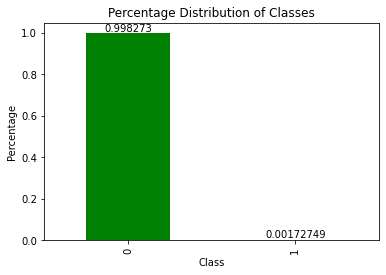

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
ax = df['Class'].value_counts(normalize = True).plot.bar(color = ['g', 'r'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Percentage Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

**As observed above, there is certainly a hug gap between number non-fraudulant and fraudulant transaction. Data is PCA transformed, hence we may not be required to perform any Outlier treatment.**

0 - **Non-Fradulant**  
1 - **Fraudulant**

#### Distribution of Classes with Time

Scatter Plot - Distribution of the Classes with Time
************************************************************ 



[(0.0, 47.99777777777778)]

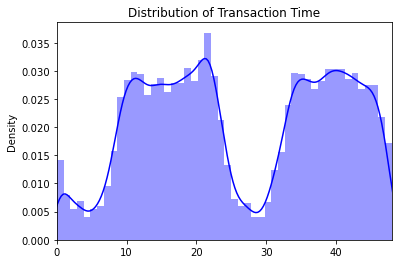

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
#amount_val = df['Amount'].values

time_val = df['Time'].values
print(color.BOLD+"Scatter Plot - Distribution of the Classes with Time"+color.END);
print('*'*60, '\n')
plt = sns.distplot(time_val, color='b')
plt.set(title='Distribution of Transaction Time')
plt.set(xlim =[min(time_val), max(time_val)])


**Above chart does not give us much information on the time series trend. Lets break-up the data set into fraudulant and non-fraudulant transactions.**

In [ ]:
# Creating separate Dataframes for Fraudulant and non-fraudulant transactions.
# creating fradulant dataframes
df_fraud = df[df['Class'] == 1]

# Creating non fraudulent dataframe
df_non_fraud = df[df['Class'] == 0]

In [ ]:
# Check and validate the number of records, against the plotted chart
print(color.BOLD+"Validating No. of Records"+color.END);
print('*'*40, '\n')
print(color.BOLD+'% of Fraudulant Transations :'+ color.END + str(round(df_fraud['Class'].count()/df['Class'].count()*100,2)))
print(color.BOLD +'% of Non Fraudulant Transations :'+ color.END + str(round(df_non_fraud['Class'].count()/df['Class'].count()*100,2)))



Validating No. of Records
**************************************** 

% of Fraudulant Transations :0.17
% of Non Fraudulant Transations :99.83


## Time Column **Trend**
**Lets now compare the time column trend for fraudulant and non-fraudulant transaction and see whether we observe any trend**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


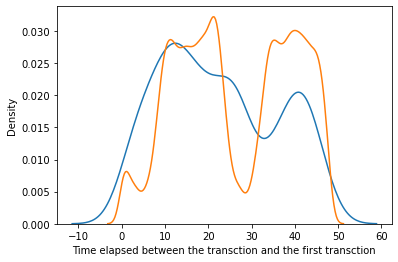

In [ ]:
# distribution plot
#import matplotlib.pyplot as show
#plt.figure(figsize=(8, 5))

ax = sns.distplot(df_fraud['Time'], label='Fradulent', hist=False)
ax = sns.distplot(df_non_fraud['Time'], label='Non Fraudulent', hist=False)
ax.set(xlabel='Time elapsed between the transction and the first transction')
plt.legend(loc='best')
#plt.show()

**As observed above, there is no specific pattern based on time elapsed, between Fraudulant and Non-Fradulant Transactions.**
**Though we may not be required to perform outlier treatment, we will have to handle the data impbalance between Fraudulant and Non-Fraudulant transactions.**


## Distribution of Amount Column

[(0.0, 25691.16)]

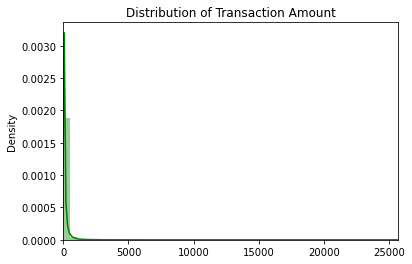

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
amount_val = df['Amount'].values

plt=sns.distplot(amount_val, color='g')
plt.set(title='Distribution of Transaction Amount')
plt.set(xlim=[min(amount_val), max(amount_val)])


#### PLot - Amount - Class Distrubtion

In [ ]:
# Check for statistical info of Amount for both Fraudulant and Non-Fraudulant Transactions
print(color.BOLD+"Fraudulant  - Amount details of transactions"+color.END)
print('*'*60, '\n')
print(df[df["Class"] == 1].Amount.describe())

print('-'*60,'\n')

print(color.BOLD+"Non-Fraudulant - Amount details of transactions" + color.END)
print('*'*60, '\n')
print(df[df["Class"] == 0].Amount.describe())
print('-'*60,'\n')

Fraudulant  - Amount details of transactions
************************************************************ 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
------------------------------------------------------------ 

Non-Fraudulant - Amount details of transactions
************************************************************ 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
------------------------------------------------------------ 



## Evaluation Time vs. Amount for Classes

Evaluate the Time vs. Amount transaction between Fraudulent and Non-Fraudulent
******************************************************************************** 



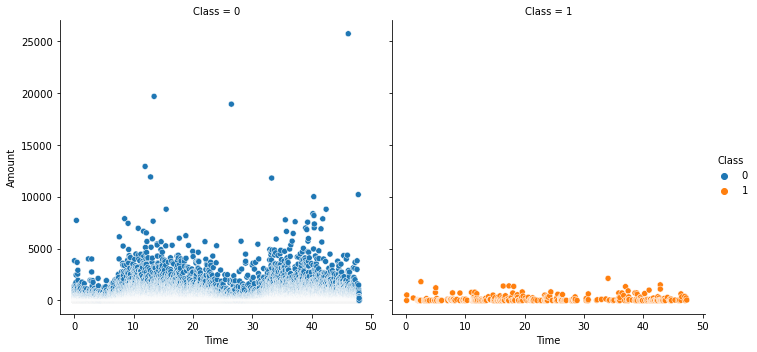

In [ ]:
# Evaluate the time vs. amount transaction between fraudulent and non-fraudulent
#import matplotlib.pyplot as show
print(color.BOLD + "Evaluate the Time vs. Amount transaction between Fraudulent and Non-Fraudulent" + color.END)
print('*'*80, '\n')
ax=sns.relplot(x="Time", y="Amount", col="Class", hue="Class", kind="scatter", data=df)
plt.tick_params(labelsize=14)
#plt.show();

## Distribution of Fradulant Transaction

Distribution of Fradulant Data
**************************************** 



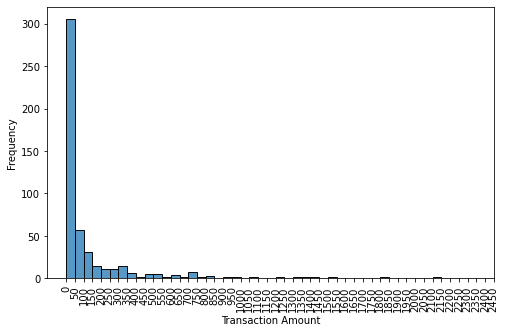

In [ ]:
# distribution of Fradulent data
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as show
print(color.BOLD+"Distribution of Fradulant Data"+color.END);
print('*'*40, '\n')
plt.figure(figsize=(8, 5))
sns.histplot(df_fraud['Amount'], binwidth=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(range(0, 2500, 50), rotation=90)
plt.show()

**Inference - Based on Analysis of Amount and its spread across Time**
- Average / Mean amount of Fraudulant transactions is higher at 122.21 vs. 88.29 for Non-Fraudulant Transactions
- Fraudulant Transactions are below 3000, Highest Fraud Transaction is betweem 2100 to 2250.
- Most of the Fraudulant transaction amount are in range of 0 and 50.
- We can see that Fraudulant transactions are spread acorss two days, so no clear pattern when checked against time.

## Dropping Unnecessary Columns

In [ ]:
# Drop unnecessary columns
df.drop('Time', axis=1, inplace=True)

## Co-Relation Heat Map

In [ ]:
print(color.BOLD+"Correlation Heat Map for all variables"+color.END);
print('*'*40, '\n')
df_correl=df.corr()
df_correl

Correlation Heat Map for all variables
**************************************** 



V1            V2            V3            V4            V5  \
V1      1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16  1.812612e-17   
V2      4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15  5.157519e-16   
V3     -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16 -6.539009e-17   
V4     -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00 -1.719944e-15   
V5      1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15  1.000000e+00   
V6     -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16  2.408382e-16   
V7     -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16  2.715541e-16   
V8     -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16  7.437229e-16   
V9     -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16  7.391702e-16   
V10     7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16 -5.202306e-16   
V11     2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16  7.203963e-16   
V12     2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16  7.412552e-16   
V13    -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16  5.886991e-16   
V14    -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16  6.565143e-16   
V15     3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16 -8.720275e-16   
V16     7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16  2.246261e-15   
V17    -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16  1.281914e-16   
V18     3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16  5.308590e-16   
V19     1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16 -1.450421e-16   
V20     4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16 -3.554057e-16   
V21    -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16 -3.920976e-16   
V22    -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17  1.253751e-16   
V23     6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17 -8.428683e-18   
V24    -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16 -1.149255e-15   
V25    -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16  4.808532e-16   
V26    -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16  4.319541e-16   
V27     1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17  6.590482e-16   
V28     2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18 -5.613951e-18   
Amount -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02 -3.863563e-01   
Class  -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01 -9.497430e-02   

                  V6            V7            V8            V9           V10  \
V1     -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16  7.388135e-17   
V2      2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17 -3.991394e-16   
V3      1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16  1.156587e-15   
V4     -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16  2.232685e-16   
V5      2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16 -5.202306e-16   
V6      1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16  5.932243e-17   
V7      1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15 -7.492834e-17   
V8     -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16 -2.801370e-16   
V9      4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00 -4.642274e-16   
V10     5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16  1.000000e+00   
V11     1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16 -4.622103e-16   
V12     2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15  1.771869e-15   
V13    -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15 -5.418460e-16   
V14     2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15  2.635936e-16   
V15    -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15  5.786332e-16   
V16     2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15  3.545450e-16   
V17     2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15  1.542955e-15   
V18     1.223814e-16  7.604126e-17 -3.667974e-16  4.993240e-16  3.902423e-16   
V19    -1.865597e

Correlation Heat Map for all variables
**************************************** 



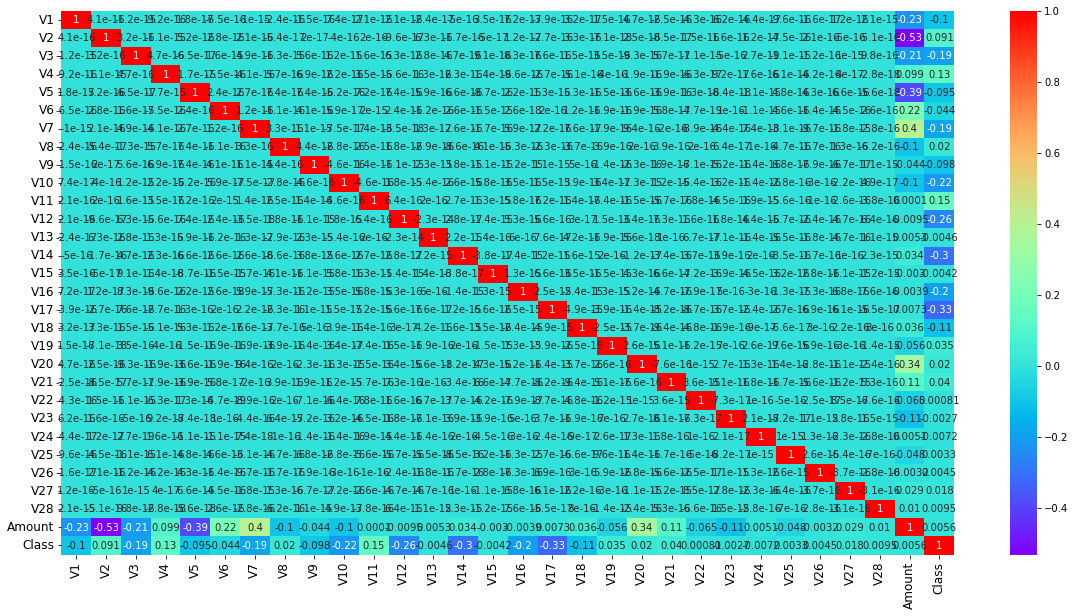

In [ ]:
# Lets evaluate the correlation between different parameters in the dataset if any
print(color.BOLD+"Correlation Heat Map for all variables"+color.END);
print('*'*40, '\n')
fig = plt.figure(figsize=(20,10))
ax=sns.heatmap(df_correl, cmap="rainbow", annot=True)
plt.tick_params(labelsize=12)
plt.show()

**Correlation**
- V2 and V5 are negatively correlated to Amount
- V7 and V20 are positively correlated to Amount
- V3, V7, V12, V14, V16 and V17 have a negative correlation with Class field.

## Data Distribution of Target Variablles
**Check Data Distribution for variables for both Fraudulant and Non-Fraudulant Transactions**

In [ ]:
# Store Column names
cols = df.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

Plotting the Shape of a Distribution of each Variable in Non-Fraudulent' & Fraudulent
************************************************************************************* 



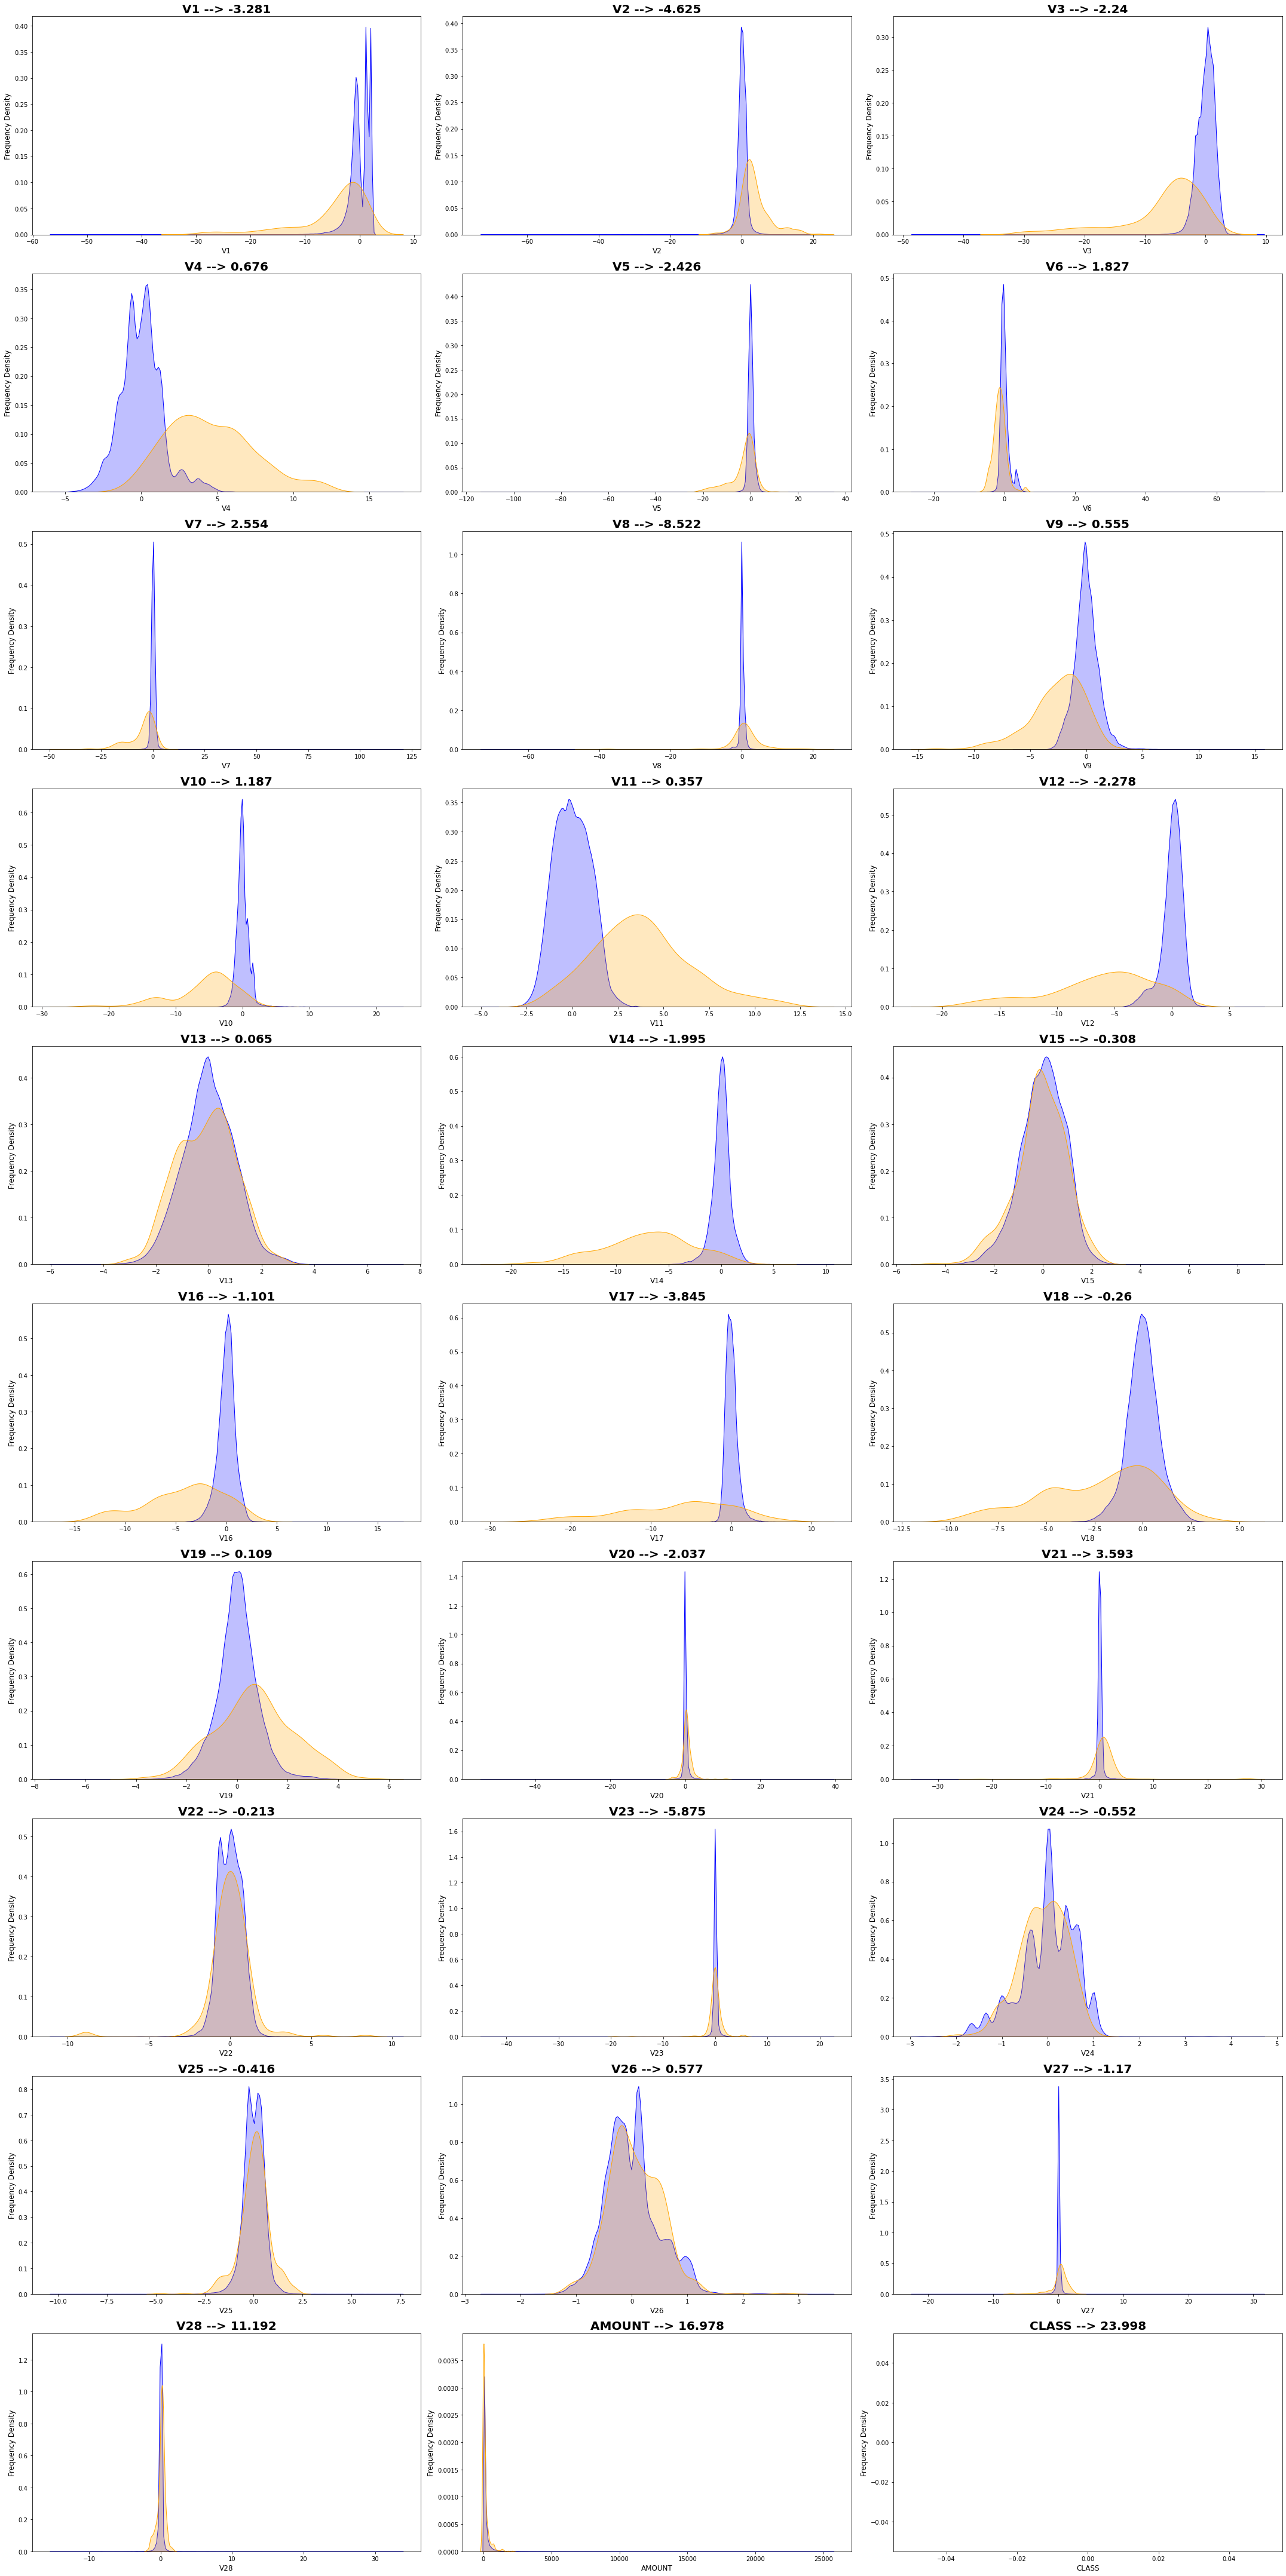

In [ ]:
# Ploting Distribution for Fradulant and Non-Fraudulant Transactions
print(color.BOLD+"Plotting the Shape of a Distribution of each Variable in Non-Fraudulent' & Fraudulent"+color.END);
print('*'*85, '\n')
k=0
plt.figure(figsize=(30, 60))
for col in cols:
    k=k+1
    plt.subplot(10, 3, k)
    #sns.distplot(X_train[col])
    g=sns.kdeplot(df.loc[(df["Class"] == 0),col] , color='b',shade=True,label='Non Fraudulent')
    g=sns.kdeplot(df.loc[(df['Class'] == 1),col] , color='orange',shade=True, label='Fraudulent')
    g.grid(False)
    plt.ylabel("Frequency Density", fontsize=12)
    plt.xlabel(col.upper(), fontsize=12)
    plt.tight_layout()
    plt.title(col.upper() + ' --> ' + str(round(df[col].skew(), 3)),fontweight='bold', fontsize=20)

**We notice that variables can be categorised with respect to the skew values (Positive or Negative)**

## Data Skewness
**Lets get these variables which are +ve and -ve**

In [ ]:
# Non Fraudulent = to check the skewness, we will also print the mean/average, variance and kurtosis.

print (color.BOLD+"Non Fraudulent = Check Mean, Variance, skewness, and kurtosis"+color.END)
print('*'*70, '\n')
a = df_non_fraud.mean(axis = 0, skipna = True)
b = df_non_fraud.var(axis = 0, skipna = True)
c = df_non_fraud.skew(axis = 0, skipna = True)
d = df_non_fraud.kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

skew_non_fraud = pd.concat([a, b, c, d] ,axis = 1)
skew_non_fraud.columns = ["Mean", "Var", "Skewness", "kurtosis"]
skew_non_fraud=skew_non_fraud.reset_index().rename(index=str, columns={"index": "Variables"})
print(skew_non_fraud)

Non Fraudulent = Check Mean, Variance, skewness, and kurtosis
********************************************************************** 

   Variables       Mean           Var   Skewness    kurtosis
0       Time  26.343945    173.976216  -0.036015   -1.293597
1         V1   0.008258      3.724182  -3.130188   31.065568
2         V2  -0.006271      2.676974  -4.887166   98.406211
3         V3   0.012171      2.129933  -1.453676   14.545345
4         V4  -0.007860      1.958134   0.581137    2.095716
5         V5   0.005453      1.841318  -2.213903  217.852170
6         V6   0.002419      1.768669   1.842604   42.987534
7         V7   0.009637      1.389598   4.747800  452.920870
8         V8  -0.000987      1.348579  -8.395492  209.772662
9         V9   0.004467      1.186731   0.665635    3.196847
10       V10   0.009824      1.090361   2.422278   21.961970
11       V11  -0.006576      1.006233   0.145537    0.035641
12       V12   0.010832      0.894801  -1.256301    5.300894
13       V1

- **A positive skewness is the right-skewed distribution with the long tail on its right side. The value of skewness for a positively skewed distribution is greater than zero.**
    -  **"mode < median < mean"**
- **A negatively skewed distribution is the left-skewed distribution with the long tail on its left side. The value of skewness for a negatively skewed distribution is less than zero.**
    - **"mean < median < mode"**
- **A normal skewness is a normal distribution of the data in the middle with skew values close to zero.**
    - **"mean = median"**

In [ ]:
# Fraudulent = to check the skewness, we will also print the mean/average, variance and kurtosis.

print (color.BOLD+"Fraudulent = Check Mean, Variance, skewness, and kurtosis"+color.END)
print('*'*70, '\n')
a = df_fraud.mean(axis = 0, skipna = True)
b = df_fraud.var(axis = 0, skipna = True)
c = df_fraud.skew(axis = 0, skipna = True)
d = df_fraud.kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

skew_fraud = pd.concat([a, b, c, d] ,axis = 1)
skew_fraud.columns = ["Mean", "Var", "Skewness", "kurtosis"]
skew_fraud=skew_fraud.reset_index().rename(index=str, columns={"index": "Variables"})
print(skew_fraud)

Fraudulent = Check Mean, Variance, skewness, and kurtosis
********************************************************************** 

   Variables        Mean           Var  Skewness   kurtosis
0       Time   22.429669    176.560352  0.251173  -1.154832
1         V1   -4.771948     46.018406 -1.797617   2.879609
2         V2    3.623778     18.414532  1.226561   2.597563
3         V3   -7.033281     50.565429 -1.514985   1.781004
4         V4    4.542029      8.255955  0.496746  -0.197493
5         V5   -3.151225     28.863413 -1.361139   1.728831
6         V6   -1.397737      3.452623  0.867734   2.876068
7         V7   -5.568731     51.937575 -1.827599   4.245361
8         V8    0.570636     46.210501 -2.830022  16.764743
9         V9   -2.581123      6.254479 -0.975075   1.494887
10       V10   -5.676883     23.983949 -1.152719   1.450166
11       V11    3.800173      7.174922  0.499090   0.207397
12       V12   -6.259393     21.663984 -0.666830  -0.196194
13       V13   -0.109334     

### Positive Skewness - Variables

In [ ]:
# Variables with Positve Skewness
print(color.BOLD+'Non Fraudulent - Positive skewness'+color.END)
print('*'*40, '\n')
pos_non_Fraud= skew_non_fraud[skew_non_fraud.Skewness >0]
print(pos_non_Fraud['Variables'].unique())

print('-'*40, '\n')

print(color.BOLD+'Fraudulent - Positive skewness'+color.END)
print('*'*40, '\n')
pos_Fraud= skew_fraud[skew_fraud.Skewness > 0]
print(pos_Fraud['Variables'].unique())

print('-'*40, '\n')

Non Fraudulent - Positive skewness
**************************************** 

['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
---------------------------------------- 

Fraudulent - Positive skewness
**************************************** 

['Time' 'V2' 'V4' 'V6' 'V11' 'V19' 'V20' 'V21' 'V26' 'Amount']
---------------------------------------- 



### Negative Skewness - Variables

In [ ]:
# Variables with Negative Skewness
print(color.BOLD+'Non Fraudulent - Negative skewness'+color.END)
print('*'*40, '\n')
neg_non_Fraud= skew_non_fraud[skew_non_fraud.Skewness < 0]
print(neg_non_Fraud['Variables'].unique())

print('-'*40, '\n')

print(color.BOLD+'Fraudulent - Negative skewness'+color.END)
print('*'*40, '\n')
neg_Fraud= skew_fraud[skew_fraud.Skewness < 0]
print(neg_Fraud['Variables'].unique())

print('-'*40, '\n')

Non Fraudulent - Negative skewness
**************************************** 

['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']
---------------------------------------- 

Fraudulent - Negative skewness
**************************************** 

['V1' 'V3' 'V5' 'V7' 'V8' 'V9' 'V10' 'V12' 'V13' 'V14' 'V15' 'V16' 'V17'
 'V18' 'V22' 'V23' 'V24' 'V25' 'V27' 'V28']
---------------------------------------- 



**Normal Skewness - in reality, no real word data has a perfectly normal distribution. Therefore, even the value of skewness is not exactly zero; it is nearly zero. Although the value of zero is used as a reference for determining the skewness of a distribution.**

**An absolute skewness value ≤2 or an absolute kurtosis (excess) ≤4 may be used as reference values for determining considerable normality.**

###  Variables with <=2 Skewness
**List the valriable which fall under ≤2 skewness range**

In [ ]:
# Variables with Normal Skewness
print(color.BOLD+'Non Fraudulent - Normal Range skewness (>= -2 and <= 2)'+color.END)
print('*'*60, '\n')
norm_non_Fraud= skew_fraud[skew_fraud.Skewness >= -2]
norm_non_Fraud= norm_non_Fraud[norm_non_Fraud.Skewness <= 2]
print(norm_non_Fraud['Variables'].unique())

print('-'*60, '\n')

print(color.BOLD+'Fraudulent - Normal Range skewness (>= -2 and <= 2)'+color.END)
print('*'*60, '\n')
norm_Fraud= skew_fraud[skew_fraud.Skewness >= -2]
norm_Fraud= norm_Fraud[norm_Fraud.Skewness <= 2]
print(norm_Fraud['Variables'].unique())

print('-'*60, '\n')

Non Fraudulent - Normal Range skewness (>= -2 and <= 2)
************************************************************ 

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V22' 'V24' 'V25' 'V26' 'V28' 'Class']
------------------------------------------------------------ 

Fraudulent - Normal Range skewness (>= -2 and <= 2)
************************************************************ 

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V22' 'V24' 'V25' 'V26' 'V28' 'Class']
------------------------------------------------------------ 



# Splitting the data into Train & Test data

In [ ]:
# putting all features in X
X = df.drop(['Class'], axis=1)
# assigning target variable to y
y= df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, stratify=y, random_state=42)

In [ ]:
X_train.shape,X_test.shape

((199364, 29), (85443, 29))

## Feature Scaling

In [ ]:
# importing the library for Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
# train the train set
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
249927 -0.012102  0.707332  0.163334 -0.756498  0.590999 -0.653429  0.844608   
214082  1.776151 -0.184642 -2.204096  1.191668  0.614461 -1.016525  0.919254   
106005 -1.083391 -4.440527 -1.399530  0.469764 -2.076458 -0.766137  1.601441   
58619  -0.518847  1.025087 -0.614624 -0.780959  2.474666  3.335055  0.046111   
191638 -0.640421  0.212171  0.283341 -1.786916  2.616127  4.024863 -0.198897   

              V8        V9       V10  ...       V20       V21       V22  \
249927 -0.001672 -0.184399 -0.222719  ... -0.038329 -0.231385 -0.572415   
214082 -0.387465 -0.318277  0.517022  ... -0.030437  0.281190  0.530070   
106005 -0.709176 -1.288745  0.086419  ...  2.189260  0.346463 -1.432833   
58619   0.794249 -0.322448  0.128383  ...  0.225957 -0.193099 -0.708348   
191638  0.937087  0.474428 -0.283699  ...  0.154309  0.167939  0.759218   

             V23       V24       V25       V26       V27       V28    Amount  
249927  0.042660 -0.360882 -0.494703  0.142657  0.235922  0.083758 -0.321082  
214082 -0.232262 -0.342096  0.492355 -0.427682 -0.075228 -0.056755  0.243475  
106005 -1.097063  0.505926 -0.140185  0.870190 -0.316982  0.227833  4.797594  
58619   0.145672  0.944217 -0.788017  0.039995  0.010804  0.254309 -0.331514  
191638 -0.321412  0.767971 -0.084221  0.612936  0.074029 -0.033344 -0.331514  

[5 rows x 29 columns]

In [ ]:
# transform the test set

X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
186882 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811 -2.737844   
165754 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694  1.369769   
235285  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822  0.190403   
101271  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946  0.029460   
5832    1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926 -0.825094   

              V8        V9       V10  ...       V20       V21       V22  \
186882 -3.543314 -0.483147  0.112724  ... -1.959611  4.328165 -2.167329   
165754 -0.133535 -0.957100 -0.261170  ... -0.128120  0.133048  0.499501   
235285  0.161493  0.840595  0.099172  ...  1.039287  0.318037 -0.760732   
101271 -0.079962  0.227173 -0.267319  ... -0.050933 -0.379270 -1.148959   
5832    0.163280  2.301808 -0.641129  ... -0.196966 -0.216512 -0.195607   

             V23       V24       V25       V26       V27       V28    Amount  
186882  1.022567 -0.241143 -1.094885 -0.475427 -0.177157 -0.082691 -0.201469  
165754 -0.392572 -0.393364  0.233354 -0.490717  0.143897  0.136810 -0.312626  
235285 -0.181332  0.595866 -0.760920 -1.048927 -0.096970  0.088686  2.416826  
101271 -0.047403 -1.074464  0.375683  0.182045 -0.031732  0.017501 -0.290023  
5832    0.072785  0.045625  0.135192  0.308617  0.001142  0.017673 -0.281092  

[5 rows x 29 columns]

**Preserve X_test & y_test to evaluate on the test data once you build the model**

In [ ]:
X_train_org, x_test_org, y_train_org, y_test_org = X_train, X_test, y_train, y_test
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


## Plotting the distribution of a variable

Histogram of a variable from the Dataset to see the Skewness
************************************************************ 



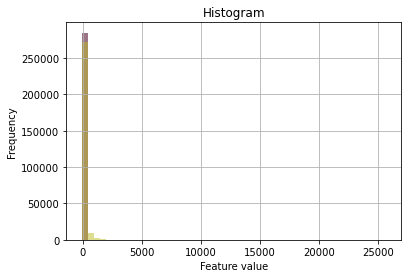

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
# Reference - https://winder.ai/histograms-and-skewed-data/
df_1 = pd.DataFrame(X) # Create a pandas DataFrame out of the numpy array
print(color.BOLD+"Histogram of a variable from the Dataset to see the Skewness"+color.END);
print('*'*60, '\n')
df_1.plot.hist(alpha=0.5, bins=50, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

**Data is skewed, we will apply the transformer to make distribution more gausian**
**Before that lets check the skewness for indiidual variables**

## Power Transformation
**If **bold text** there is skewness present in the distribution use:**
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

### Data Skewness Plot - Before Transformation

Distribution of the variables (skewness) of all the columns
********************************************************************** 



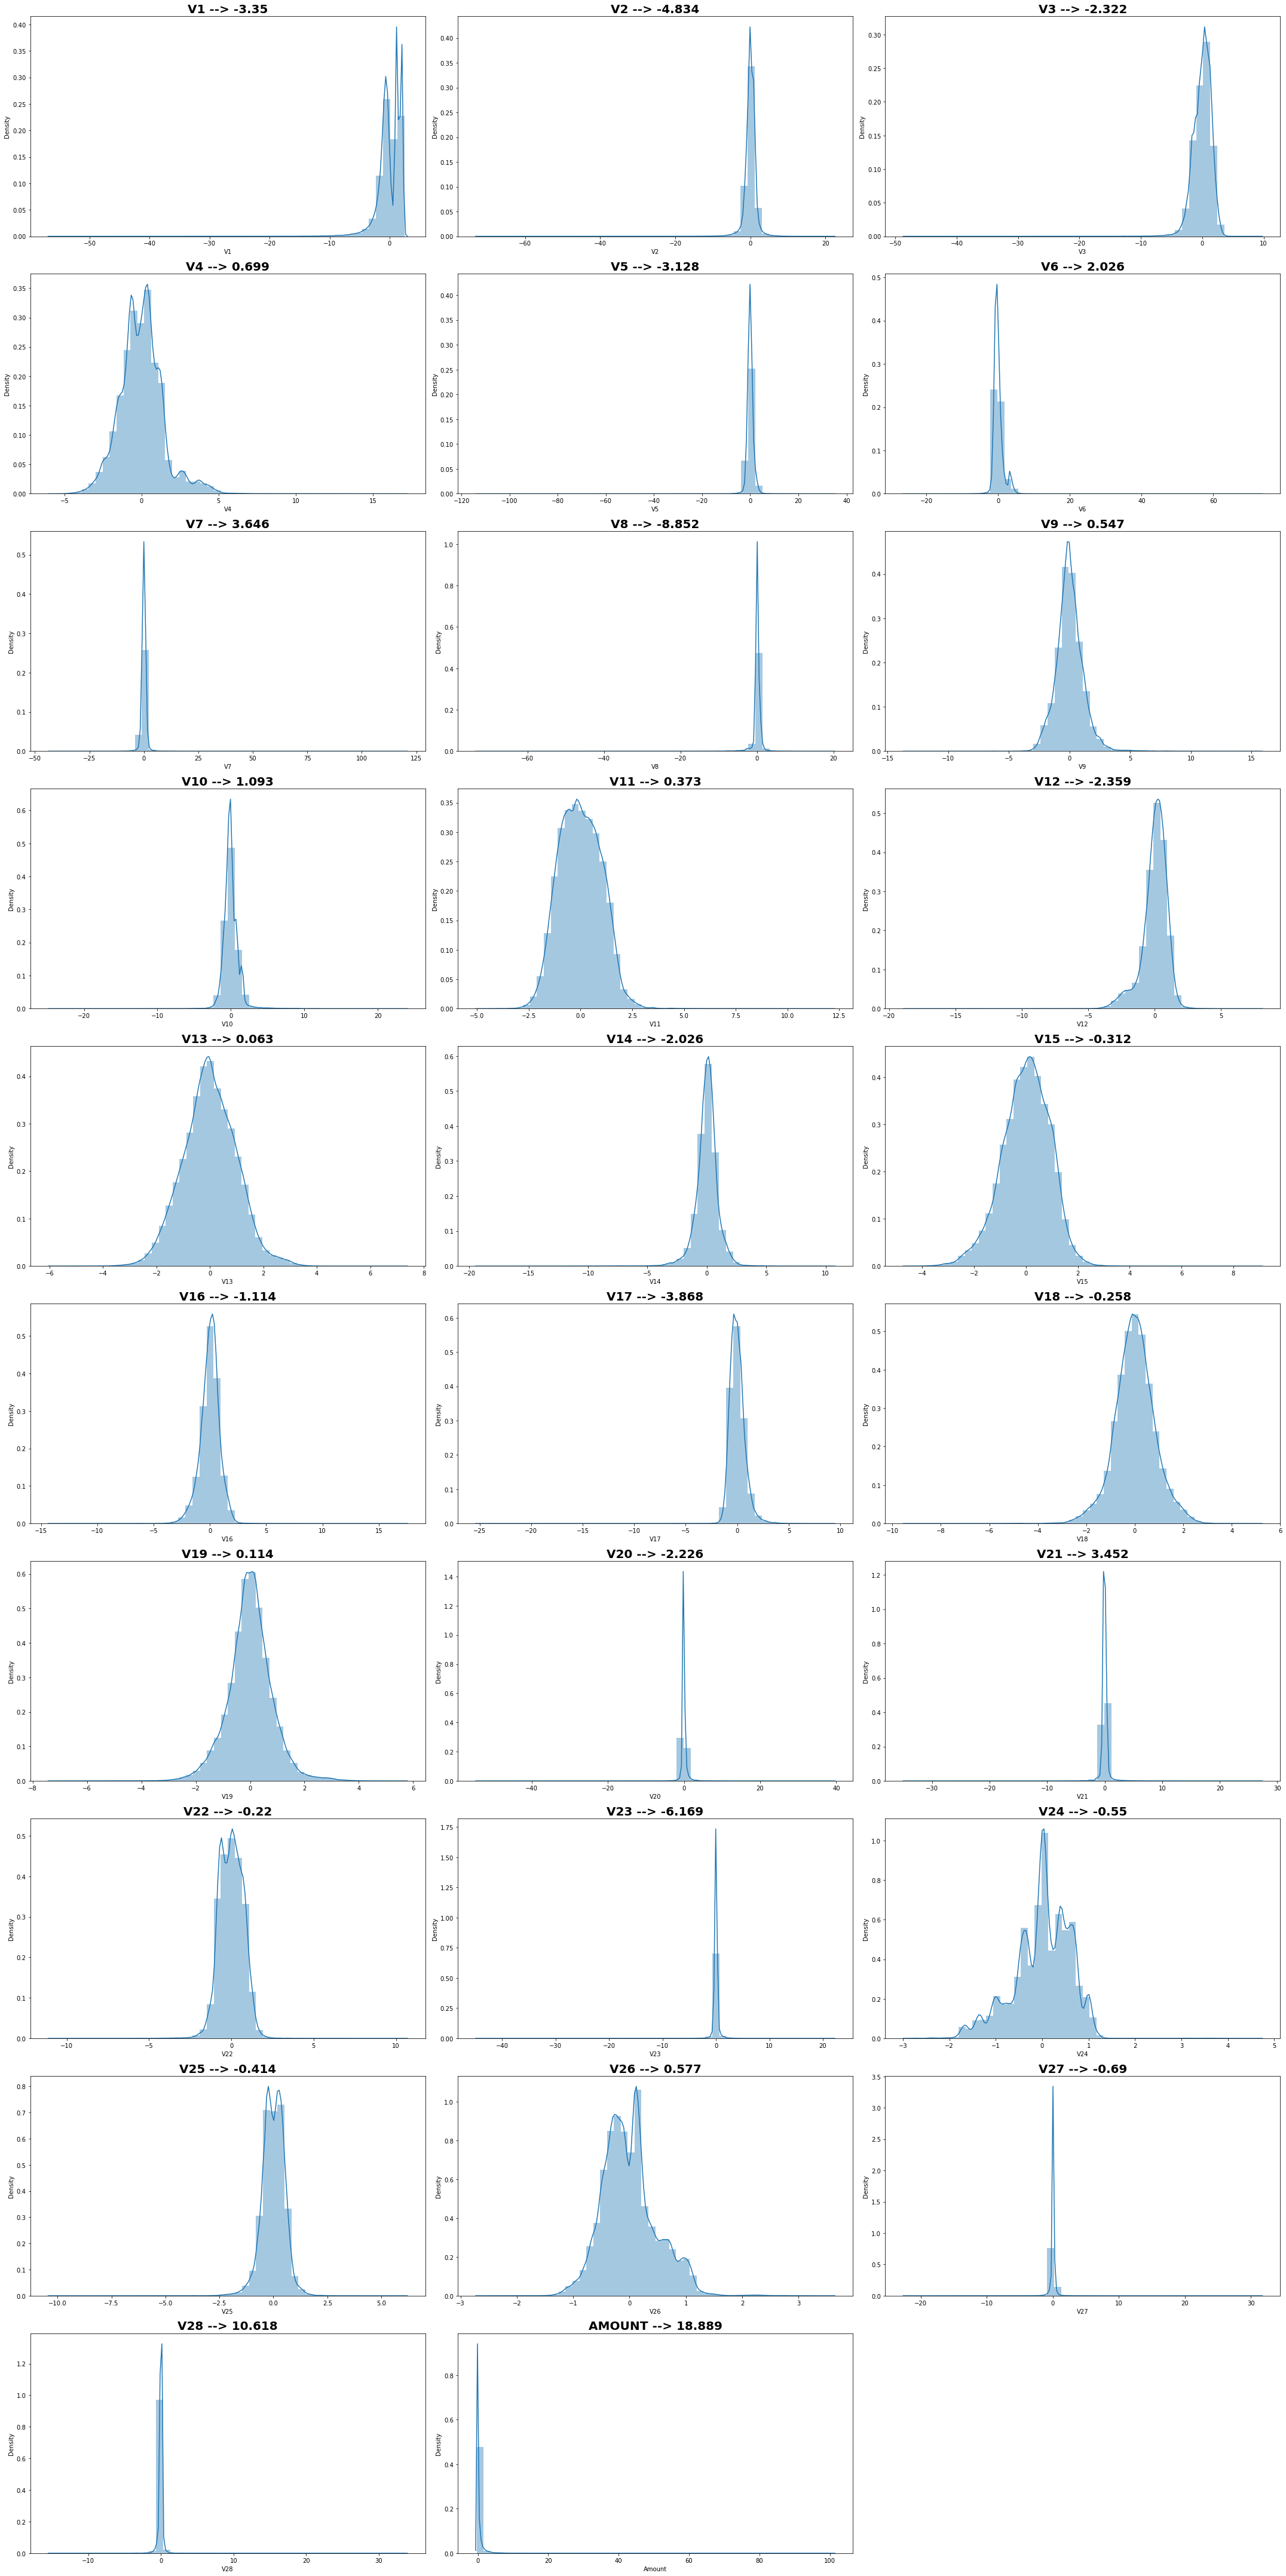

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
cols = X_train.columns
print (color.BOLD+"Distribution of the variables (skewness) of all the columns"+color.END)
print('*'*70, '\n')
k=0
plt.figure(figsize=(30, 60))
for col in cols:
    k=k+1
    plt.subplot(10, 3, k)
    sns.distplot(X_train[col])
    plt.tight_layout()
    plt.title(col.upper() + ' --> ' + str(round(X_train[col].skew(), 3)),fontweight='bold', fontsize=20)

### Apply PowerTransformation

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

### Data Skewness Plot - After **Transformation**

Distribution of the variables (skewness) of all the columns
********************************************************************** 



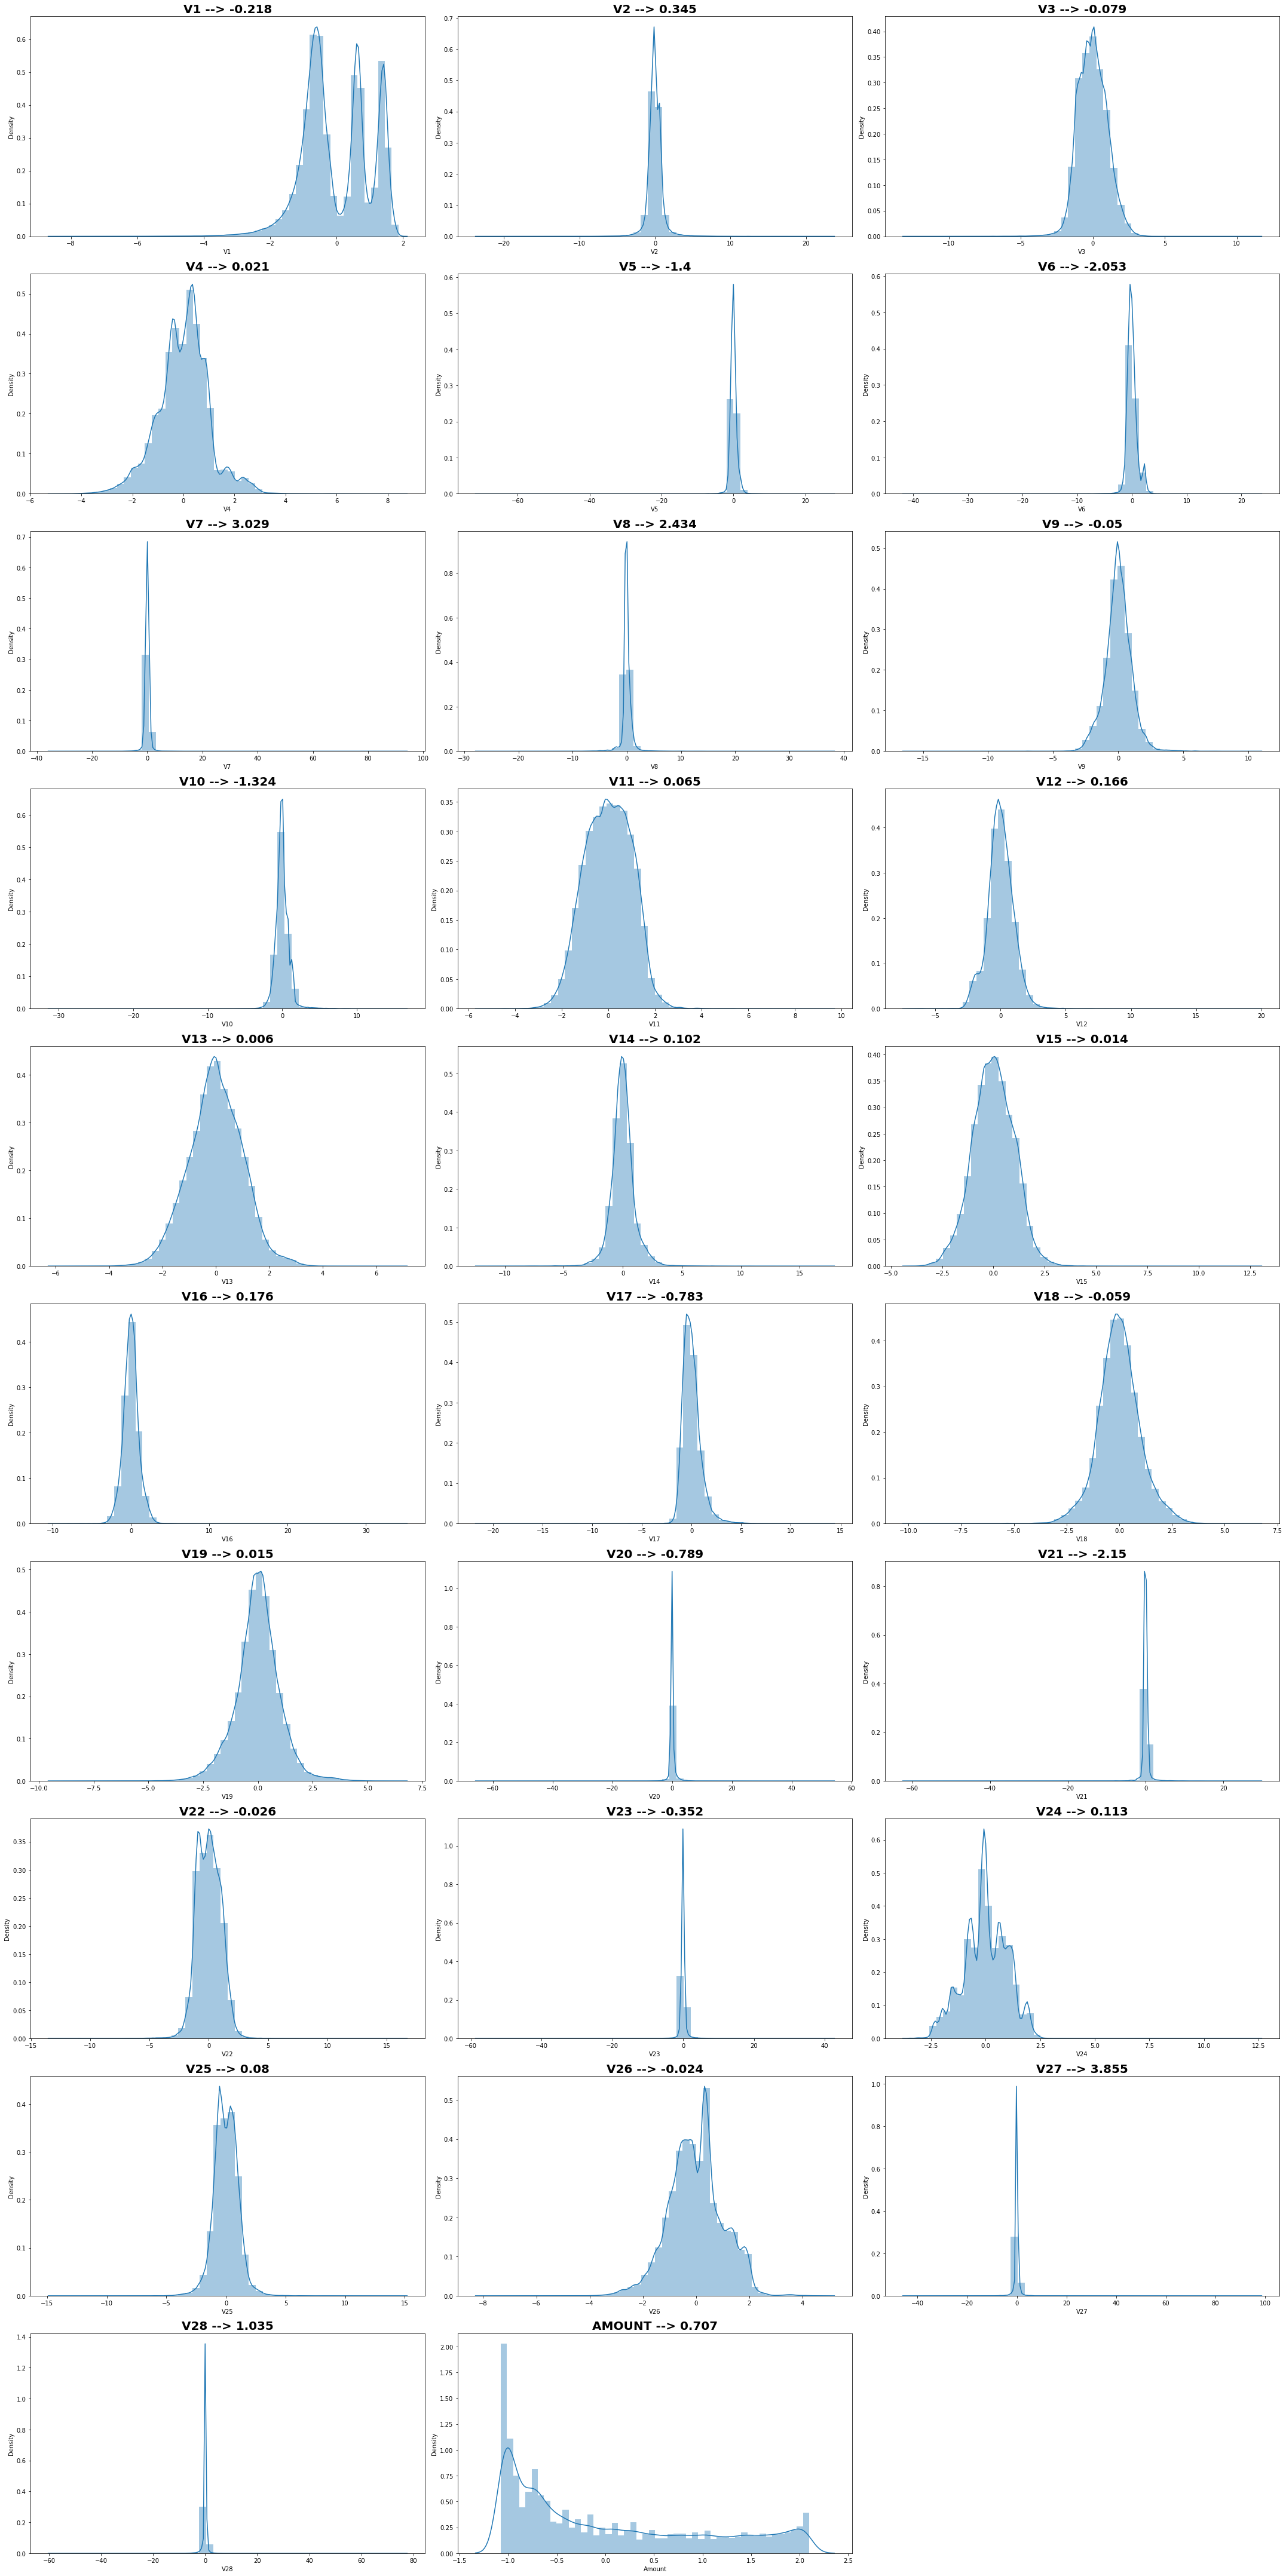

In [ ]:
# plot the histogram of a variable from the dataset again to see the result
cols = X_train.columns
print (color.BOLD+"Distribution of the variables (skewness) of all the columns"+color.END)
print('*'*70, '\n')
k=0
plt.figure(figsize=(30, 60))
for col in cols:
    k=k+1
    plt.subplot(10, 3, k)
    sns.distplot(X_train[col])
    plt.tight_layout()
    plt.title(col.upper() + ' --> ' + str(round(X_train[col].skew(), 3)),fontweight='bold', fontsize=20)

**AS noticed, after the transformation, all the skew values are moving closer to 0, that means moving towards symmetrical distribution.**

### Print - Data Imbalance

In [ ]:
# Evaluate whether the dataset is balanced at what percentage level
print('The percentage of Non-Fraudulant Transactions is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage of Fraudulant Transactions is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage of Non-Fraudulant Transactions is  99.83 % of the dataset
The percentage of Fraudulant Transactions is  0.17 % of the dataset
The ratio of imbalance is 0.17


**Heavily imbalanced data, with only 0.17% transactions are fradulant.**

**Since the data is heavily imbalanced, we cannot use Accuracy as a metric for measurment.**
- Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous.
- Our training data is the one illustrated in calculation above.
    - If accuracy is used to measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy (99.8%), but obviously, this model won’t provide any valuable information for us.
    
**Hence, in this case, other alternative evaluation metrics can be applied such as:

- Precision/Specificity: how many selected instances are relevant.
- Recall/Sensitivity: how many relevant instances are selected.
- F1 score: harmonic mean of precision and recall.
- MCC: correlation coefficient between the observed and predicted binary classifications.
- AUC: relation between true-positive rate and false positive rate.

# Model Building - Imbalanced Data
- Build different models on the imbalanced dataset and see the result

## Import Required Libraries

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import time

# importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from datetime import datetime

## Define Common Functions
**To be used across Model Building Processing**

### AUC_ROC Curve Function

In [ ]:
# ROC Curve function

def draw_roc( Xtest, Xprobs, ytest, yprobs, Mname):

    fig = plt.figure(figsize=(12,5))
    fig.set_facecolor("#F3F3F3")

    # Train
    plt.subplot(121)
    fpr,tpr,thresholds = roc_curve(Xtest,Xprobs)
    auc_score = roc_auc_score(Xtest, Xprobs)
    plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(Mname+' Model: Train ROC Curve', fontsize =12)
    plt.legend(loc="lower right")
    plt.tick_params(labelsize=12)
    plt.plot([0,1],[0,1],linestyle = "dashed", color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "y")

    # -----------------------------------------------------------------------------------------------------------------------
    # Test
    plt.subplot(122)
    fpr,tpr,thresholds = roc_curve(ytest, yprobs)
    auc_score = roc_auc_score(y_test, yprobs)
    plt.plot(fpr, tpr, linestyle = "dotted", color = "royalblue",linewidth = 2, label='ROC curve (area = %0.5f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(Mname+' Model: Test ROC Curve', fontsize =12)
    plt.legend(loc="lower right")
    plt.tick_params(labelsize=12)
    plt.plot([0,1],[0,1],linestyle = "dashed", color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "y")
    plt.show()

    return None

### Confusion Matrix Function

In [ ]:
# Confusion Matrix Function
def draw_conf_matrix( conf_train, conf_test):
    classes = ['Not Fraudulent', 'Fraudulent']
    fig = plt.figure(figsize=(12,5))
    fig.set_facecolor("#F3F3F3")
    # Train Set
    plt.subplot(121)
    ax= sns.heatmap(conf_train,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                    xticklabels=classes, yticklabels=classes, linewidths = 3,linecolor = "w",cmap = "Set1")
    plt.title('Train Set - Confusion Matrix Plot', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
    # Test Set
    plt.subplot(122)
    ax= sns.heatmap(conf_test,annot=True, annot_kws={"fontsize":15}, fmt = "",square = True,
                    xticklabels=classes, yticklabels=classes, linewidths = 3,linecolor = "w",cmap = "Set1")
    plt.title('Test Set - Confusion Matrix Plot', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90, horizontalalignment='right')
    plt.show()

    return None

### Precision-Recall Function

In [ ]:
# Precision recall curves for all the models
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def precision_recall( Xtest, Xprobs, Xpred, ytest, yprobs, ypred, Mname):
    # Train Set
    fig = plt.figure(figsize=(12,5))
    fig.set_facecolor("#F3F3F3")
    plt.subplot(121)
    recall,precision,thresholds = precision_recall_curve(Xtest,Xprobs)
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + str(np.around(average_precision_score(Xtest,Xpred),5))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = 'best', prop = {"size" : 14})
    plt.grid(True,alpha = .15)
    plt.title( Mname+' Model: Train Precision_Recall_curve', fontsize =12)
    plt.xlabel(Mname+" Recall_Train Set",fontsize =12)
    plt.ylabel(Mname+" Precision Train Set",fontsize =12)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))
    plt.tick_params(labelsize=12)

    # Test Set
    plt.subplot(122)
    recall,precision,thresholds = precision_recall_curve(ytest,yprobs)
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + str(np.around(average_precision_score(ytest,ypred),5))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = 'best', prop = {"size" : 14})
    plt.grid(True,alpha = .15)
    plt.title( Mname+' Model: Test Precision_Recall_curve', fontsize =12)
    plt.xlabel(Mname+" Recall_Test Set",fontsize =12)
    plt.ylabel(Mname+" Precision Test Set",fontsize =12)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))
    plt.tick_params(labelsize=12)

    plt.show()

    return None

### Metric Score Function

In [ ]:
# Function to get ROC_AUC_Score and other metrics
#def get_score_metrics(data_1, pred_1, proba_1, model_1):
def get_score_metrics(data_1, pred_1, proba_1):

    # Accuracy
    acc = metrics.accuracy_score(data_1, pred_1)


    # Confusion matrix
    confusion_matrix = metrics.confusion_matrix(data_1, pred_1)
    TN = confusion_matrix[0,0] # True negative
    FP = confusion_matrix[0,1] # False positive
    FN = confusion_matrix[1,0] # False negative
    TP = confusion_matrix[1,1] # True positive

    # Precision
    precision = precision_score(data_1,pred_1, average='weighted')


    # Recall / Sensitivity / TPR
    recall = recall_score(data_1,pred_1, average='weighted')



    # Specificity / TNR
    specificity = TN / float(TN+FP)


    # FPR
    FPR = FP / float(TN+FP)


    # FNR
    FNR = FN / float(FN + TP)


    # positive predictive value
    PPV = TP / (TP+FP)

    # Negative predictive value
    NPV = TN / (TN+ FN)


    # F1 score
    f1Score = f1_score(data_1, pred_1, average='weighted')


    # ROC AUC Score
    roc_auc = roc_auc_score(data_1, proba_1)

    return acc, confusion_matrix, precision, recall, specificity, FPR, FNR, PPV, NPV, f1Score, roc_auc#

### Model Fitment Function

In [ ]:
# Fit Models Function
def model_fitment(model_index, model_sklearn, DType, exp_results, X_train, y_train):
    for name,model in zip(model_index,model_sklearn):
        print('*'*60, '\n')
        print (color.BOLD+"Model-"+name+" Fitting Train Set"+color.END)
        print('*'*60, '\n')

        # Train Fit
        ML_models[name] = model.fit(X_train,y_train)

        # Predict Train
        y_train_pred = model.predict(X_train)
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        fpr,tpr,thresholds = roc_curve(y_train, y_train_pred_proba)
        threshold = thresholds[np.argmax(tpr-fpr)]
        tr_residuals = y_train == y_train_pred
        residuals_tr = pd.Series(tr_residuals).value_counts()

        # Print Classification Report
        print(color.BOLD+"Train Set - Classification Report" + color.END)
        print('*'*60)
        print(classification_report(y_train, y_train_pred))
        print('-'*60, '\n')

        # Train Metrics
        print(color.BOLD+"Getting Test Metrics..." + color.END)
        acc_tr, confusion_tr, precision_tr, recall_tr, specificity_tr, FPR_tr, FNR_tr, PPV_tr, NPV_tr, f1Score_tr, roc_auc_tr =get_score_metrics(y_train, y_train_pred,y_train_pred_proba)

        # Save Train Metrics to Dataframe
        new_row =  {'Dataset' : DType,'Model_Name':name, 'Results':'Train Set','confusion_matrix':confusion_tr,
                    'Accuracy':acc_tr, 'Precision':precision_tr, 'Recall':recall_tr,'Specificity':specificity_tr, 'FPR':FPR_tr,
                    'FNR':FNR_tr, 'PPV' : PPV_tr, 'NPV' : NPV_tr, 'F1_Score':f1Score_tr,'ROC_AUC': roc_auc_tr,
                    'Threshold':threshold, 'Residuals':residuals_tr}
        exp_results.loc[len(exp_results)] = new_row

        print (color.BOLD+"Model-"+name+" Fitting Test Set"+color.END)
        y_test_pred = model.predict(X_test)
        y_test_pred_proba = model.predict_proba(X_test)[:,1]
        fpr,tpr,thresholds = roc_curve(y_test, y_test_pred_proba)
        threshold = thresholds[np.argmax(tpr-fpr)]
        ts_residuals = y_test == y_test_pred
        residuals_ts = pd.Series(ts_residuals).value_counts()

        # Print Classification Report
        print(color.BOLD+"Test Set - Classification Report" + color.END)
        print('*'*60)
        print(classification_report(y_test, y_test_pred))
        print('-'*60, '\n')

        # Get Test  Metrics
        print(color.BOLD+"Getting Test Metrics..." + color.END)
        acc_ts, confusion_ts, precision_ts, recall_ts, specificity_ts, FPR_ts, FNR_ts, PPV_ts, NPV_ts, f1Score_ts, roc_auc_ts  = get_score_metrics(y_test, y_test_pred, y_test_pred_proba)

        # Plot Confusion Matrix
        print('\n')
        print(color.BOLD+"Confusion Matrix" + color.END)
        print('*'*60, '\n')
        draw_conf_matrix(confusion_tr, confusion_ts)
        print('-'*60, '\n')
        print('\n')

        # Save Train Metrics to Dataframe
        new_row =  {'Dataset' : DType,'Model_Name':name, 'Results':'Test Set','confusion_matrix':confusion_ts,
                    'Accuracy':acc_ts, 'Precision':precision_ts, 'Recall':recall_ts,'Specificity':specificity_ts,
                    'FPR':FPR_ts, 'FNR':FNR_ts, 'PPV' : PPV_ts, 'NPV' : NPV_ts, 'F1_Score':f1Score_ts,'ROC_AUC': roc_auc_ts,
                    'Threshold':threshold,'Residuals':residuals_ts}
        exp_results.loc[len(exp_results)] = new_row

        # Print speficity, sensitivity, FPR, positive predictive value and Negative predictive value
        print(color.BOLD+"Model - "+name+" Print Metrics" + color.END)
        print('*'*60, '\n')
        print(exp_results[exp_results["Model_Name"]==name][["Model_Name", "Results", "Specificity", "Recall", "FPR", "PPV", "NPV","Threshold"]])
        print('-'*60, '\n')
        print (color.BOLD+"Model - "+name+" : Number of Train values correctly predicted" + color.END)
        print(pd.Series(tr_residuals).value_counts())
        print('-'*60, '\n')
        print (color.BOLD+"Model - "+name+" : Number of Test values correctly predicted" + color.END)
        print(pd.Series(ts_residuals).value_counts())
        print('\n')

        # Print ROC Curve
        print(color.BOLD+"Model - "+name+" ROC Curve" + color.END)
        print('*'*60, '\n')
        draw_roc( y_train, y_train_pred_proba, y_test, y_test_pred_proba, name)
        print('-'*60, '\n')
        print('\n')

        # Print Precision-Recall Plot
        print(color.BOLD+"Model - "+name+" Precision Recall Curve" + color.END)
        print('*'*60, '\n')
        precision_recall(y_train, y_train_pred_proba, y_train_pred, y_test, y_test_pred_proba, y_test_pred, name)
        print('-'*60, '\n')
        print('*'*60, '\n')
        print('\n')

    return None

### Residuals Plot Function

In [ ]:
# Print Model Residuals Function
def print_ml_residuals(model_index, DType, exp_results ):
    for name in model_index:
        print(color.BOLD+"***************Model "+name+" - "+DType+" Data Set******************" + color.END)
        print(color.BOLD+"Residuals - Train Set" + color.END)
        print('*'*60, '\n')
        print(exp_results[(exp_results["Results"]=='Train Set') & (exp_results["Model_Name"]==name)][["Residuals"]])
        print('-'*60, '\n')
        print(color.BOLD+"Residuals - Test Set" + color.END)
        print('*'*60, '\n')
        print(exp_results[(exp_results["Results"]=='Test Set') & (exp_results["Model_Name"]==name)][["Residuals"]])
        print('-'*60, '\n')
        print('\n')
    return None

In [ ]:
# Creating a Function to Plot Evaluation parameters for all the Models
def model_eval_param(df_1, DataSet, DType):

    print(color.BOLD+"Model Wise Evaluation Parameters Comparison  for "+DType+" - "+DataSet+color.BOLD)
    print('*'*80,'\n')

    plt.rcParams['figure.figsize']=(20,16)

    plt.subplot(321)
    g=sns.barplot(data=df_1, x="Model_Name", y="F1_Score", hue="Results",errwidth=0)
    for i in g.containers:
        g.bar_label(i, label_type='center', rotation=90, color='white')
    plt.title('ML Model Vs Respective model- F1 Score')

    plt.subplot(322)
    g=sns.barplot(data=df_1, x="Model_Name", y="Accuracy", hue="Results",errwidth=0)
    for i in g.containers:
        g.bar_label(i, label_type='center', rotation=90, color='white')
    plt.title('ML Model Vs Respective model- Accuracy')

    plt.subplot(323)
    g=sns.barplot(data=df_1, x="Model_Name", y="Precision", hue="Results",errwidth=0)
    for i in g.containers:
        g.bar_label(i, label_type='center', rotation=90, color='white')
    plt.title('ML Model Vs Respective model- Precision')

    plt.subplot(324)
    g=sns.barplot(data=df_1, x="Model_Name", y="Recall", hue="Results",errwidth=0)
    for i in g.containers:
        g.bar_label(i, label_type='center', rotation=90, color='white')
    plt.title('ML Model Vs Respective model- Recall')

    plt.subplot(325)
    g=sns.barplot(data=df_1, x="Model_Name", y="ROC_AUC", hue="Results",errwidth=0)
    for i in g.containers:
        g.bar_label(i, label_type='center', rotation=90, color='white')
    plt.title('ML Model Vs Respective model- AUC_ROC')

    plt.show()

    return None

### Feature Importance Plot

In [ ]:
# Feature Importance Function for the Best Model
def feature_imp_model(clf, X_train):
    for i in clf.feature_importances_:
        var_imp.append(i)

    print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
    print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
    print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

    # Variable on Index-16 and Index-13 seems to be the top 2 variables
    top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
    second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

    X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
    X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

    np.random.shuffle(X_train_0)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [10, 6]

    plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
    plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
                label='Actual Class-0 Examples')
    plt.legend()

    return None

### Verify Feature Importance Plot

In [ ]:
# Re-Confirm the Feature Importance for the Model
def verify_feature_importance(clf, X_train, Mname):
    importances = clf.feature_importances_

    # make importance relative to the max importance
    feature_importance = 100.0 * (importances / importances.max())
    sorted_idx = np.argsort(feature_importance)
    feature_names = list(X_train.columns.values)
    feature_names_sort = [feature_names[indice] for indice in sorted_idx]
    pos = np.arange(sorted_idx.shape[0]) + .5

    # plot the result
    fig = plt.figure(figsize=(10,8))
    fig.set_facecolor("#F3F3F3")
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, feature_names_sort)
    plt.title(Mname+' Model: Relative Feature Importance', fontsize=12)
    plt.tick_params(labelsize=12)
    plt.show()

    return None

### Cross Validation-Hyper Parameter Selection

#### Logistic Regression GridSearchCV

In [ ]:
# Logistic Regresion - Set GridSearch Function
# define models and parameters
def lr_set_GridSearch():
    model = LogisticRegression()

    # Creating KFold object with 5 splits
    folds = KFold(n_splits=5, random_state=4, shuffle=True)

    # specify params
    params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

    # Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
    model_cv = GridSearchCV(estimator = model,
                            param_grid = params,
                            scoring ='roc_auc',
                            cv=folds,
                            verbose=1,
                            return_train_score=True)
    return model_cv


#### KNN GridSearchCV

In [ ]:
# KNN - Set GridSearch Function

# define models and parameters
def knn_set_GridSearch():
    model = KNeighborsClassifier()
    n_neighbors = range(1, 21, 2)
    weights = ['uniform', 'distance']
    metric = ['euclidean', 'minkowski']

    # define grid search
    grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    model_cv = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',verbose=1,error_score=0)

    return model_cv

#### SVM GridSearchCV

In [ ]:
# SVM - Set GridSearch Function

# define model and parameters
def svm_set_GridSearch():
    model = SVC()
    kernel = ['poly', 'rbf', 'sigmoid']
    C = [50, 10, 1.0, 0.1, 0.01]
    gamma = ['scale']

    # define grid search
    grid = dict(kernel=kernel,C=C,gamma=gamma)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    model_cv = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc', verbose=1,error_score=0)

    return model_cv


#### Decision Tree GridSearchCV

In [ ]:
# Decision Tree - Set GridSearch Function

# define models and parameters
def dt_set_GridSearch():
    model = DecisionTreeClassifier()
    # Create the parameter grid
    param_grid = {'max_depth': range(5, 15, 5),
                  'min_samples_leaf': range(50, 150, 50),
                  'min_samples_split': range(50, 150, 50)}

    # Instantiate the grid search model
    dtree = DecisionTreeClassifier()

    grid_search = GridSearchCV(estimator = model,
                               param_grid = param_grid,
                               scoring= 'roc_auc',
                               cv = 3,
                               verbose = 1)

    return model_cv

#### RandomForest GridSearchCV

In [ ]:
# RandomForest - Set GridSearch Function

# define models and parameters
def rf_set_GridSearch():
    param_grid = {
        'max_depth': range(5,10,5) ,
        'min_samples_leaf': [50, 100],
        'min_samples_split': [50, 100],
        'n_estimators': [100,200],
        'max_features': [10, 20]}

    # Create a based model
    model = RandomForestClassifier()

    # Instantiate the grid search model
    model_cv = GridSearchCV(estimator = model,
                               param_grid = param_grid,
                               cv = 2,
                               n_jobs = -1,
                               verbose = 1,
                               return_train_score=True)

    return model_cv

#### XGBoost GridSearchCV

In [ ]:
# XGBoost - Set GridSearch Function

# define models and parameters
def xgb_set_GridSearch():
    # creating a KFold object
    folds = 3

    # specify range of hyperparameters
    param_grid = {'learning_rate': [0.2, 0.6],
                  'subsample': [0.3, 0.6, 0.9]}

    # specify model
    model = XGBClassifier(max_depth=2, n_estimators=200)

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = model,
                            param_grid = param_grid,
                            scoring= 'roc_auc',
                            cv = folds,
                            verbose = 1,
                            return_train_score=True)
    return model_cv

### Cross-Validation Results Function

In [ ]:
# Function - Model Fitment and CV Results
def get_cv_results(model_cv, X_train, y_train, Mname):
    # fit the model
    print (color.BOLD+Mname+" Model - Finding Best Parameters Values using GridSearchCV"+color.END)
    print('*'*60, '\n')
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Start Time =", current_time)

    grid_result = model_cv.fit(X_train, y_train)

    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("End Time =", current_time)
    print('\n')

    # summarize results
    best_score = grid_result.best_score_
    best_params = grid_result.best_params_
    print('Best Param : ' , best_params)
    print('Best Score : ' , best_score)
    print('-'*60,'\n')

    print (color.BOLD+"Print Results"+color.END)
    print('*'*60, '\n')

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    return best_score, best_params

### Create DataFrame to Store Results

In [ ]:
# Creating a Dataframe to store the Model Results

# DataFrame - Model Best Parameters
model_params = pd.DataFrame(columns=['DataType','Model_Name', 'best_params', 'best_score'])


# Model Experiment / Train-Test Prediction Results
exp_results = pd.DataFrame(columns=['Dataset','Model_Name', 'Results','confusion_matrix','Accuracy','Precision','Recall',
                                    'Specificity', 'FPR', 'FNR','PPV','NPV','F1_Score','ROC_AUC', 'Threshold', 'Residuals' ])

## HyperParameter Tuning for the Models - Imbalanced Dataset


### Logistic Regression

In [ ]:
# Using GridSearchCV to get best parameters
# define models and parameters
model_cv = lr_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train, y_train, 'LR')

# Save results to Dataframe
new_row =  {'DataType' : 'Imbalanced','Model_Name':'LR', 'best_params':best_params, 'best_score':best_score}
model_params.loc[len(model_params)] = new_row
model_params



LR Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 14:25:01
Fitting 30 folds for each of 15 candidates, totalling 450 fits
End Time = 14:26:25


Best Param :  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score :  0.9834955849488825
------------------------------------------------------------ 

Print Results
************************************************************ 

0.982521 (0.015437) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.982282 (0.015603) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.982074 (0.015497) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.982468 (0.015536) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.982619 (0.015528) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.982114 (0.015490) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.982523 (0.015457) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9

DataType Model_Name                                        best_params  \
0  Imbalanced         LR  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...   

   best_score  
0    0.983496

### KNN

In [ ]:
# Using GridSearchCV to get best KNN values
# define models and parameters
model_cv = knn_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train, y_train, 'KNN')

# Save results to Dataframe
new_row =  {'DataType' : 'Imbalanced','Model_Name':'KNN', 'best_params':best_params, 'best_score':best_score}
model_params.loc[len(model_params)] = new_row
model_params



KNN Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 14:26:41
Fitting 10 folds for each of 40 candidates, totalling 400 fits
End Time = 15:18:06


Best Param :  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score :  0.999531008380883
------------------------------------------------------------ 

Print Results
************************************************************ 

0.999428 (0.000085) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.999428 (0.000085) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.999531 (0.000058) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.999511 (0.000066) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.999486 (0.000074) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.999506 (0.000058) with: {'metric': 'euclidean', 'n_neighbors': 5

DataType Model_Name                                        best_params  \
0  Imbalanced         LR  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...   
1  Imbalanced        KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   

   best_score  
0    0.983496  
1    0.999531

### SVM

In [ ]:
# Using GridSearchCV to get best parameters for SVM

# define model and parameters
model_cv = svm_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train, y_train, 'SVM')

# Save results to Dataframe
new_row =  {'DataType' : 'Imbalanced','Model_Name':'SVM', 'best_params':best_params, 'best_score':best_score}
model_params.loc[len(model_params)] = new_row
model_params


SVM Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 15:31:43
Fitting 30 folds for each of 15 candidates, totalling 450 fits
End Time = 16:44:56


Best Param :  {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score :  0.9563124759500824
------------------------------------------------------------ 

Print Results
************************************************************ 

0.871217 (0.052116) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.956312 (0.023982) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.871904 (0.085963) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.879113 (0.049860) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.950610 (0.026004) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.825345 (0.098691) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.892041 (0.040094) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.949890 (0.026226) with: {

DataType Model_Name                                        best_params  \
0  Imbalanced         LR  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...   
1  Imbalanced        KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   
2  Imbalanced        SVM       {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}   

   best_score  
0    0.983496  
1    0.999531  
2    0.956312

### Decision Trees

In [ ]:
# Using GridSearchCV to get best parameters for Decision Tree

# define model and parameters
model_cv = dt_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train, y_train, 'DT')

# Save results to Dataframe
new_row =  {'DataType' : 'Imbalanced','Model_Name':'DT', 'best_params':best_params, 'best_score':best_score}
model_params.loc[len(model_params)] = new_row
model_params



DT Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 16:46:15
Fitting 10 folds for each of 8 candidates, totalling 80 fits
End Time = 16:47:17


Best Param :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
Best Score :  0.9669711884482901
------------------------------------------------------------ 

Print Results
************************************************************ 

0.925837 (0.021551) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}
0.931627 (0.016258) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}
0.943654 (0.015713) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
0.943656 (0.015713) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}
0.962323 (0.012568) with: {'criterion

DataType Model_Name                                        best_params  \
0  Imbalanced         LR  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...   
1  Imbalanced        KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   
2  Imbalanced        SVM       {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}   
3  Imbalanced         DT  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   best_score  
0    0.983496  
1    0.999531  
2    0.956312  
3    0.966971

### RandomForest

In [ ]:
# Using GridSearchCV to get best parameters for RandomForest

# define model and parameters
model_cv = rf_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train, y_train, 'RF')

# Save results to Dataframe
new_row =  {'DataType' : 'Imbalanced','Model_Name':'RF', 'best_params':best_params, 'best_score':best_score}
model_params.loc[len(model_params)] = new_row
model_params


RF Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 16:49:30
Fitting 10 folds for each of 24 candidates, totalling 240 fits
End Time = 17:20:07


Best Param :  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 200}
Best Score :  0.9715750664509292
------------------------------------------------------------ 

Print Results
************************************************************ 

0.949952 (0.020198) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 10}
0.970738 (0.011611) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}
0.969820 (0.011713) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
0.952455 (0.017171) with: {'max_depth': 5, 'max_features': 

DataType Model_Name                                        best_params  \
0  Imbalanced         LR  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...   
1  Imbalanced        KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   
2  Imbalanced        SVM       {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}   
3  Imbalanced         DT  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4  Imbalanced         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   

   best_score  
0    0.983496  
1    0.999531  
2    0.956312  
3    0.966971  
4    0.971575

### XGBoost

In [ ]:
# Using GridSearchCV to get best parameters for XGBoost

# define model and parameters
model_cv = xgb_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train, y_train, 'XGB')

# Save results to Dataframe
new_row =  {'DataType' : 'Imbalanced','Model_Name':'XGB', 'best_params':best_params, 'best_score':best_score}
model_params.loc[len(model_params)] = new_row
model_params


XGB Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 17:25:54
Fitting 10 folds for each of 12 candidates, totalling 120 fits
End Time = 17:26:47


Best Param :  {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.3}
Best Score :  0.9824820049615666
------------------------------------------------------------ 

Print Results
************************************************************ 

0.933719 (0.015865) with: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.3}
0.931655 (0.015958) with: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.6}
0.982482 (0.010026) with: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.3}
0.980638 (0.011347) with: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.6}
0.982372 (0.007418) with: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.3}
0.980538 (0.009853) with: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample'

DataType Model_Name                                        best_params  \
0  Imbalanced         LR  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...   
1  Imbalanced        KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   
2  Imbalanced        SVM       {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}   
3  Imbalanced         DT  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4  Imbalanced         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
5  Imbalanced        XGB  {'learning_rate': 0.1, 'n_estimators': 100, 's...   
6  Imbalanced        XGB  {'learning_rate': 0.1, 'n_estimators': 100, 's...   

   best_score  
0    0.983496  
1    0.999531  
2    0.956312  
3    0.966971  
4    0.971575  
5    0.982482  
6    0.982482

### Saving the Params

In [ ]:
# Creating a Dataframe to store the Imbalance HyperParameter Results for each model
# Creating dataframe and storing in CSV, as the runtime for each for each of models is time consuming.
# Please note that HyperTuning has been done with 1 GPU, 32 MB on JarvisLabs (AWS) platform.
# will be embedding the CV results images for each model and avoid execution of the same multiple times.

# Export to CSV
model_params.to_csv('model_params.csv', index=False)

In [ ]:
# Load the Model Params for Imblanced Dataset
# Load data from the dataset CSV file
#model_params = pd.read_csv('imbalance_model_params.csv')
print(color.BOLD+'Imbalance DataSet - GridSearchCV : Best Parameters'+color.BOLD)
print('*'*80,'\n')
model_params

Imbalance DataSet - GridSearchCV : Best Parameters
******************************************************************************** 



DataType Model_Name                                        best_params  \
0  Imbalanced         LR  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...   
1  Imbalanced        KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   
2  Imbalanced        SVM       {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}   
3  Imbalanced         DT  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4  Imbalanced         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
5  Imbalanced        XGB  {'learning_rate': 0.1, 'n_estimators': 100, 's...   

   best_score  
0    0.983496  
1    0.999531  
2    0.956312  
3    0.966971  
4    0.971575  
5    0.982482

## Model Train
**Imbalanced DataSet**

************************************************************ 

Model-LR Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.89      0.65      0.75       344

    accuracy                           1.00    199364
   macro avg       0.95      0.83      0.88    199364
weighted avg       1.00      1.00      1.00    199364

------------------------------------------------------------ 

Getting Test Metrics...
Model-LR Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.57      0.76      0.65       148

    accuracy                           1.00     85443


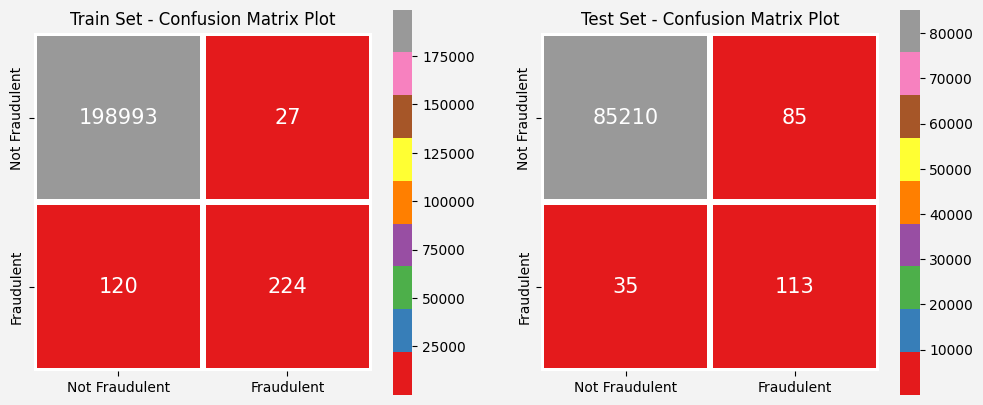

------------------------------------------------------------ 



Model - LR Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
0         LR  Train Set     0.999864  0.999263  0.000136  0.892430  0.999397   
1         LR   Test Set     0.999003  0.998596  0.000997  0.570707  0.999589   

   Threshold  
0   0.003717  
1   0.006739  
------------------------------------------------------------ 

Model - LR : Number of Train values correctly predicted
True     199217
False       147
Name: Class, dtype: int64
------------------------------------------------------------ 

Model - LR : Number of Test values correctly predicted
True     85323
False      120
Name: Class, dtype: int64


Model - LR ROC Curve
************************************************************ 



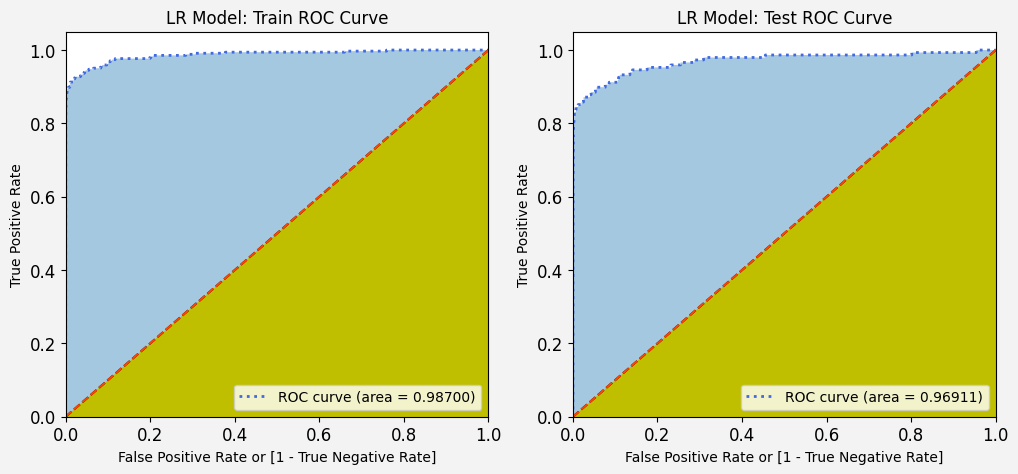

------------------------------------------------------------ 



Model - LR Precision Recall Curve
************************************************************ 



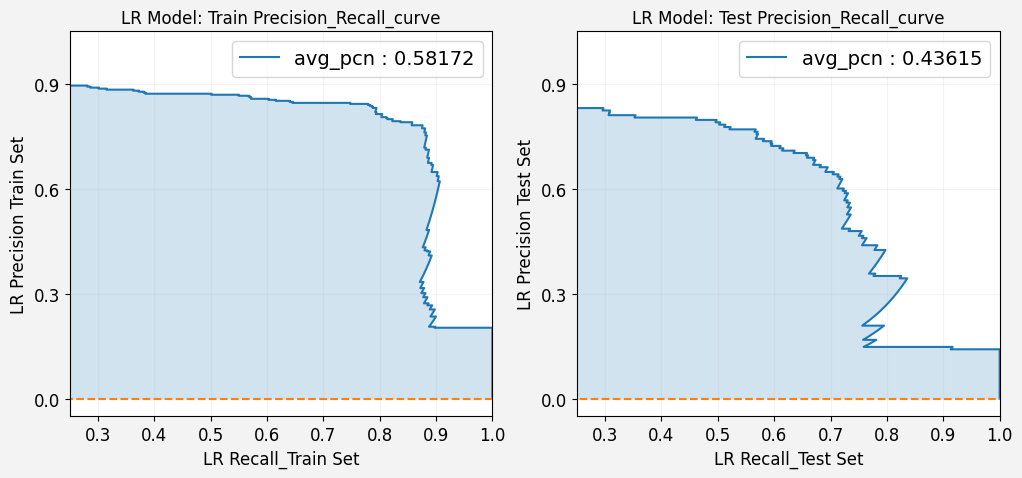

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-KNN Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.97      0.83      0.90       344

    accuracy                           1.00    199364
   macro avg       0.99      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364

------------------------------------------------------------ 

Getting Test Metrics...
Model-KNN Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

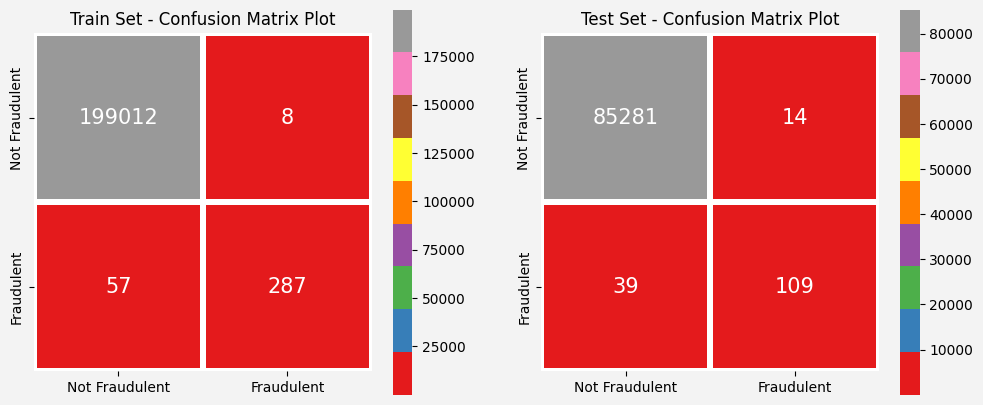

------------------------------------------------------------ 



Model - KNN Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
2        KNN  Train Set     0.999960  0.999674  0.000040  0.972881  0.999714   
3        KNN   Test Set     0.999836  0.999380  0.000164  0.886179  0.999543   

   Threshold  
2   0.333333  
3   0.333333  
------------------------------------------------------------ 

Model - KNN : Number of Train values correctly predicted
True     199299
False        65
Name: Class, dtype: int64
------------------------------------------------------------ 

Model - KNN : Number of Test values correctly predicted
True     85390
False       53
Name: Class, dtype: int64


Model - KNN ROC Curve
************************************************************ 



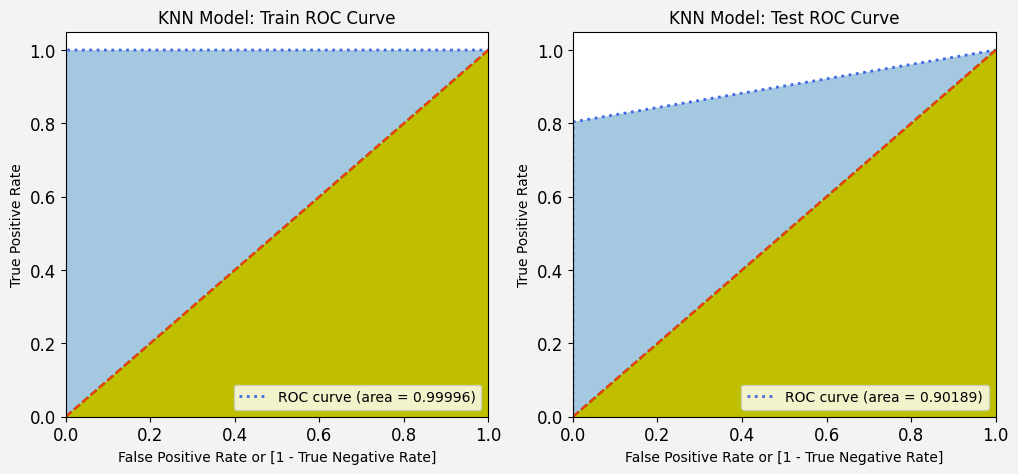

------------------------------------------------------------ 



Model - KNN Precision Recall Curve
************************************************************ 



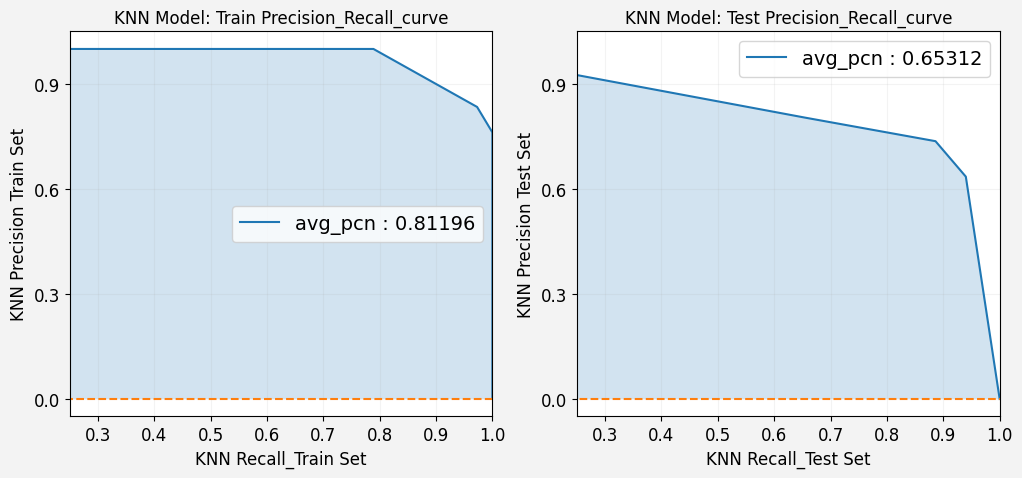

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-SVM Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      0.95      0.98       344

    accuracy                           1.00    199364
   macro avg       1.00      0.98      0.99    199364
weighted avg       1.00      1.00      1.00    199364

------------------------------------------------------------ 

Getting Test Metrics...
Model-SVM Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

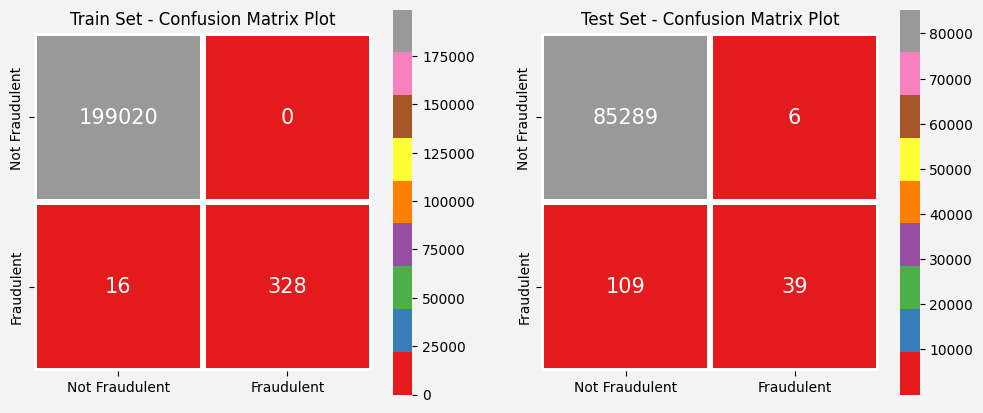

------------------------------------------------------------ 



Model - SVM Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall      FPR       PPV       NPV  \
4        SVM  Train Set      1.00000  0.999920  0.00000  1.000000  0.999920   
5        SVM   Test Set      0.99993  0.998654  0.00007  0.866667  0.998724   

   Threshold  
4   0.007409  
5   0.005839  
------------------------------------------------------------ 

Model - SVM : Number of Train values correctly predicted
True     199348
False        16
Name: Class, dtype: int64
------------------------------------------------------------ 

Model - SVM : Number of Test values correctly predicted
True     85328
False      115
Name: Class, dtype: int64


Model - SVM ROC Curve
************************************************************ 



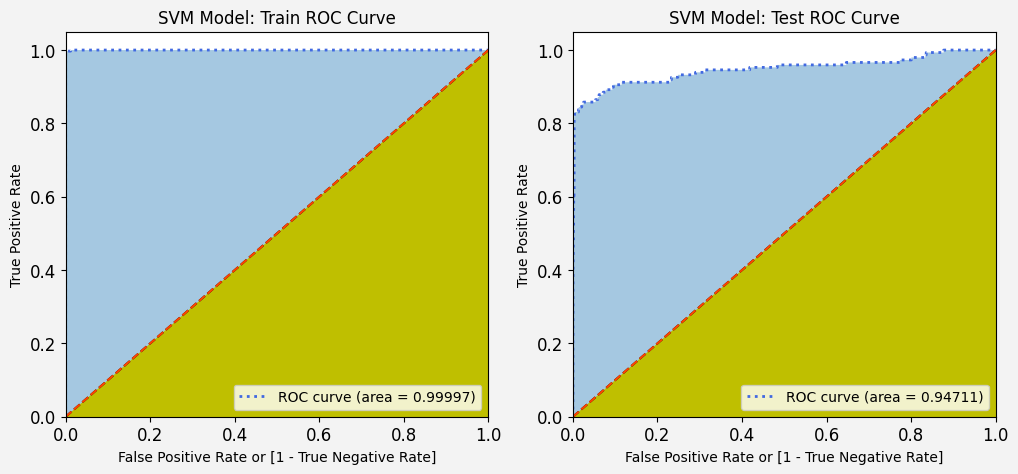

------------------------------------------------------------ 



Model - SVM Precision Recall Curve
************************************************************ 



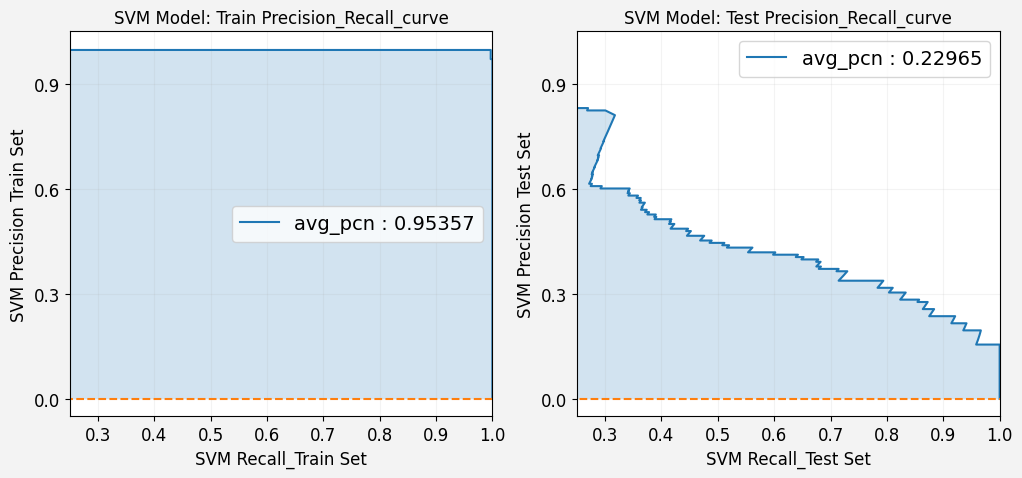

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-DT Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.76      0.72      0.74       344

    accuracy                           1.00    199364
   macro avg       0.88      0.86      0.87    199364
weighted avg       1.00      1.00      1.00    199364

------------------------------------------------------------ 

Getting Test Metrics...
Model-DT Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00  

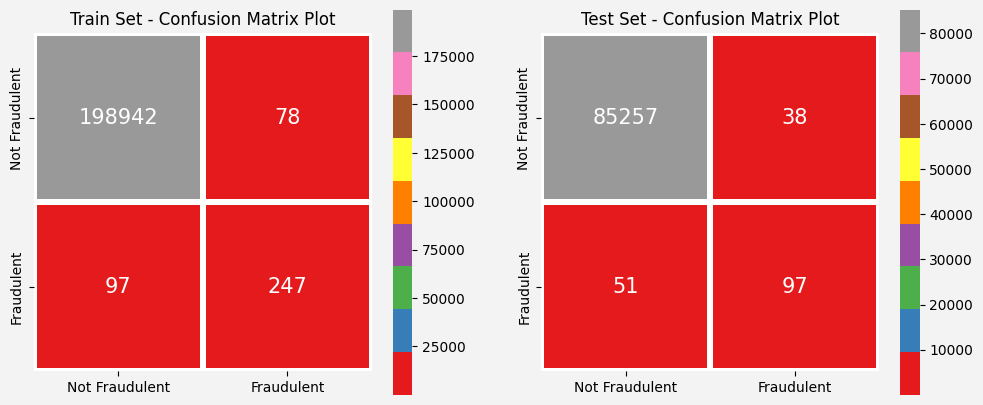

------------------------------------------------------------ 



Model - DT Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
6         DT  Train Set     0.999608  0.999122  0.000392  0.760000  0.999513   
7         DT   Test Set     0.999554  0.998958  0.000446  0.718519  0.999402   

   Threshold  
6   0.002188  
7   0.022624  
------------------------------------------------------------ 

Model - DT : Number of Train values correctly predicted
True     199189
False       175
Name: Class, dtype: int64
------------------------------------------------------------ 

Model - DT : Number of Test values correctly predicted
True     85354
False       89
Name: Class, dtype: int64


Model - DT ROC Curve
************************************************************ 



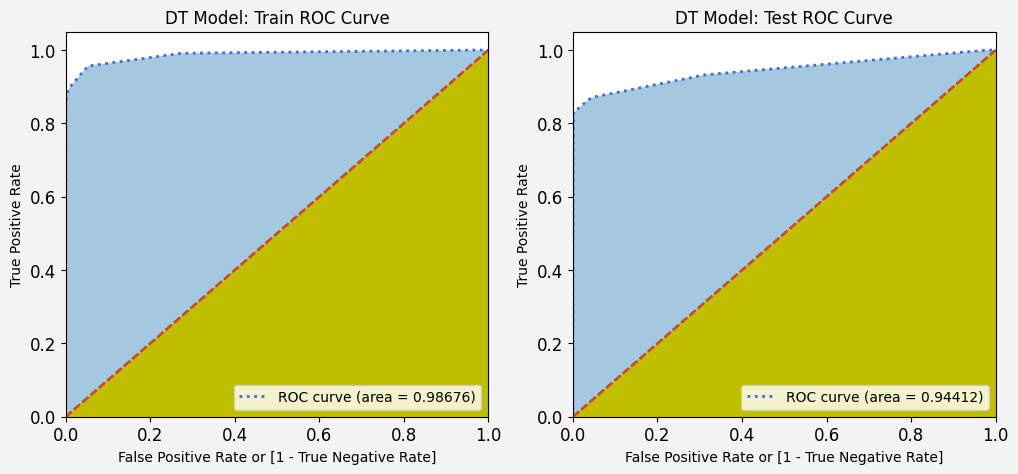

------------------------------------------------------------ 



Model - DT Precision Recall Curve
************************************************************ 



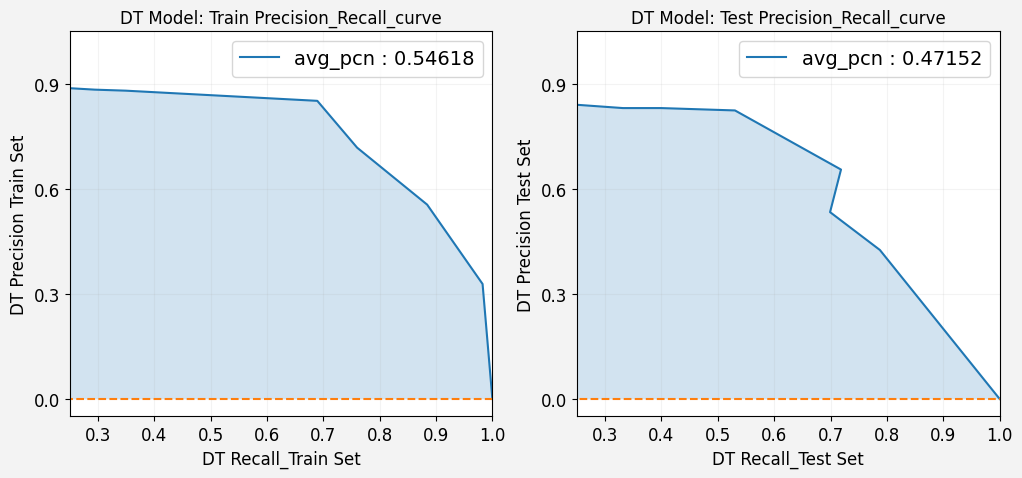

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-RF Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.87      0.58      0.70       344

    accuracy                           1.00    199364
   macro avg       0.94      0.79      0.85    199364
weighted avg       1.00      1.00      1.00    199364

------------------------------------------------------------ 

Getting Test Metrics...
Model-RF Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00  

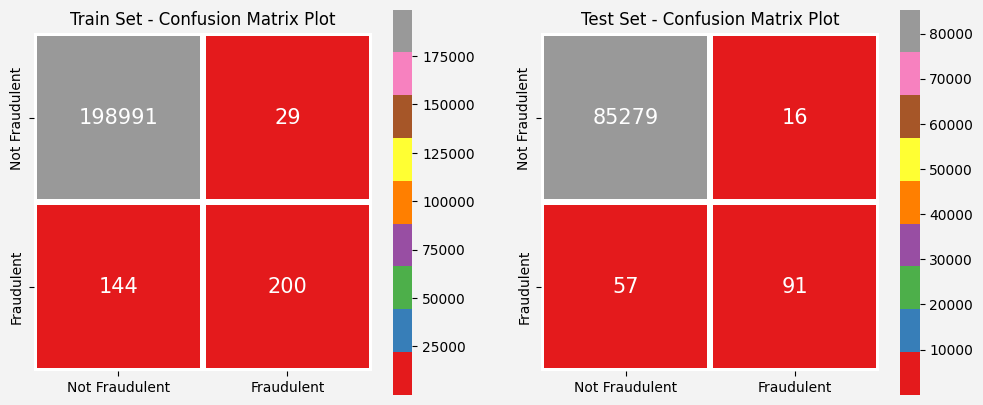

------------------------------------------------------------ 



Model - RF Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
8         RF  Train Set     0.999854  0.999132  0.000146  0.873362  0.999277   
9         RF   Test Set     0.999812  0.999146  0.000188  0.850467  0.999332   

   Threshold  
8   0.000777  
9   0.027936  
------------------------------------------------------------ 

Model - RF : Number of Train values correctly predicted
True     199191
False       173
Name: Class, dtype: int64
------------------------------------------------------------ 

Model - RF : Number of Test values correctly predicted
True     85370
False       73
Name: Class, dtype: int64


Model - RF ROC Curve
************************************************************ 



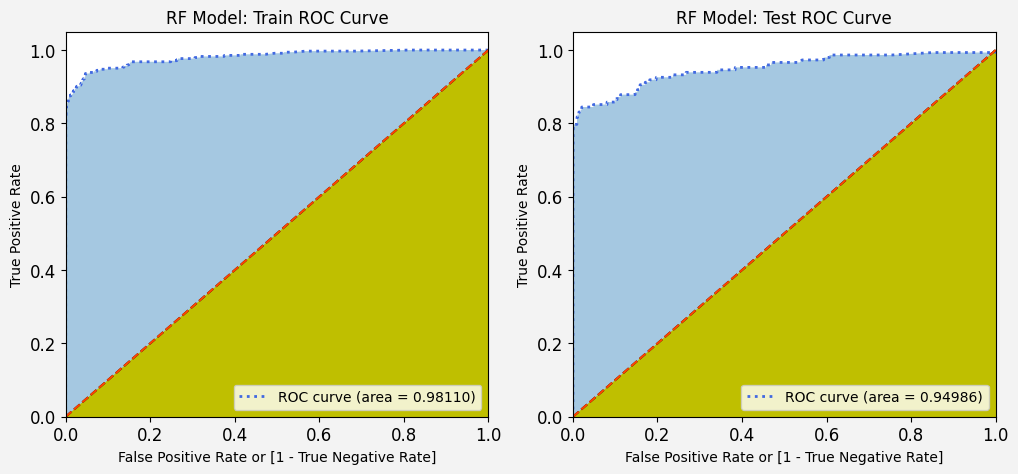

------------------------------------------------------------ 



Model - RF Precision Recall Curve
************************************************************ 



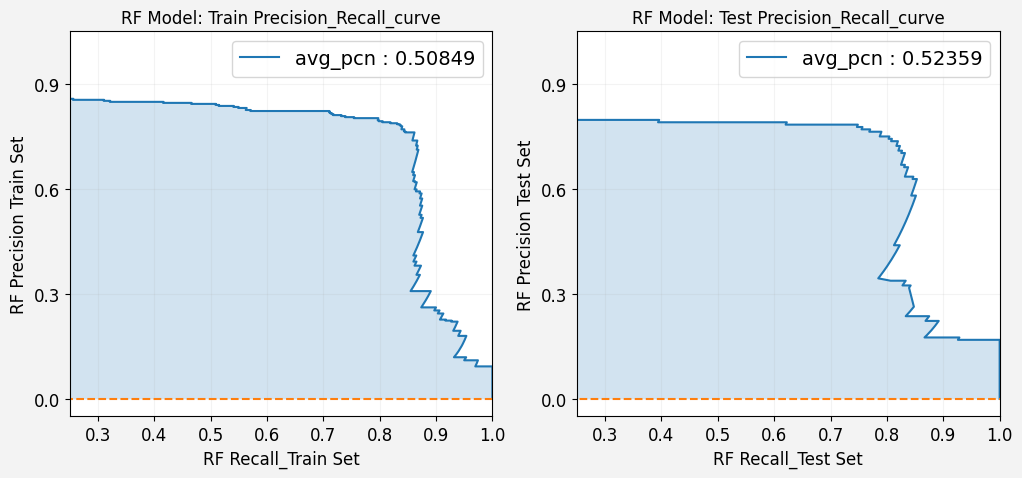

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-XGB Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.98      0.86      0.92       344

    accuracy                           1.00    199364
   macro avg       0.99      0.93      0.96    199364
weighted avg       1.00      1.00      1.00    199364

------------------------------------------------------------ 

Getting Test Metrics...
Model-XGB Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

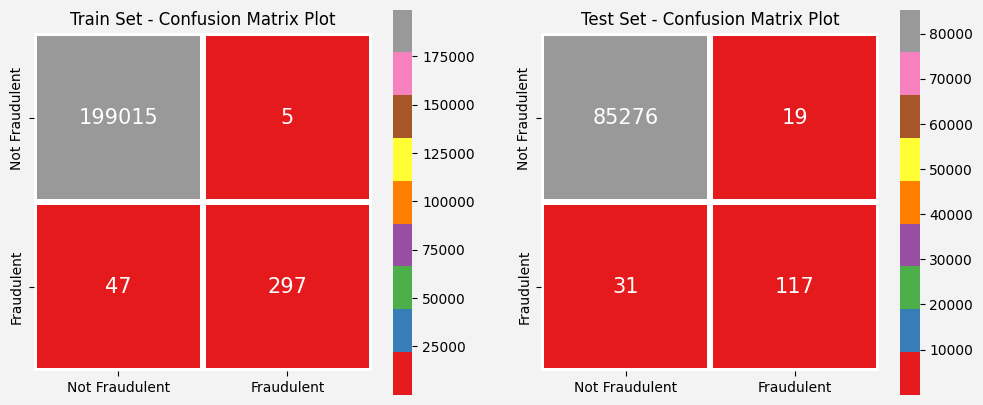

------------------------------------------------------------ 



Model - XGB Print Metrics
************************************************************ 

   Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
10        XGB  Train Set     0.999975  0.999739  0.000025  0.983444  0.999764   
11        XGB   Test Set     0.999777  0.999415  0.000223  0.860294  0.999637   

    Threshold  
10   0.002112  
11   0.000897  
------------------------------------------------------------ 

Model - XGB : Number of Train values correctly predicted
True     199312
False        52
Name: Class, dtype: int64
------------------------------------------------------------ 

Model - XGB : Number of Test values correctly predicted
True     85393
False       50
Name: Class, dtype: int64


Model - XGB ROC Curve
************************************************************ 



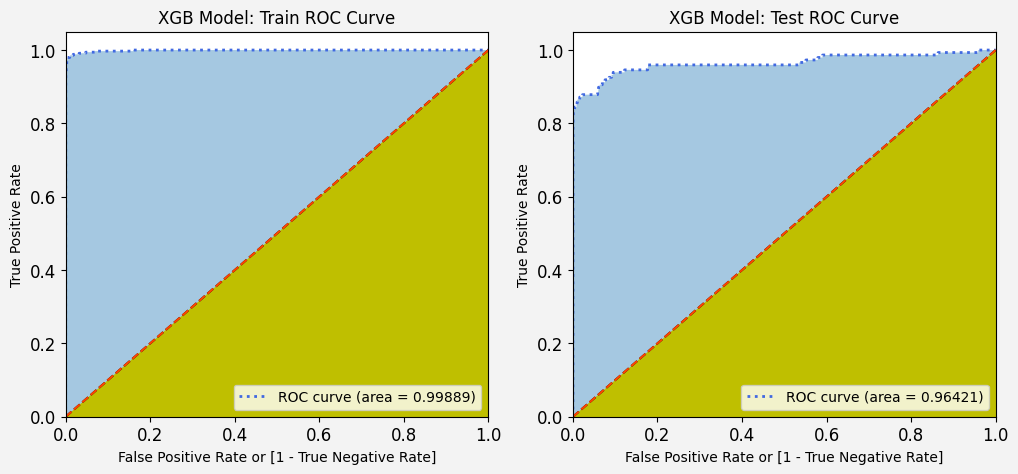

------------------------------------------------------------ 



Model - XGB Precision Recall Curve
************************************************************ 



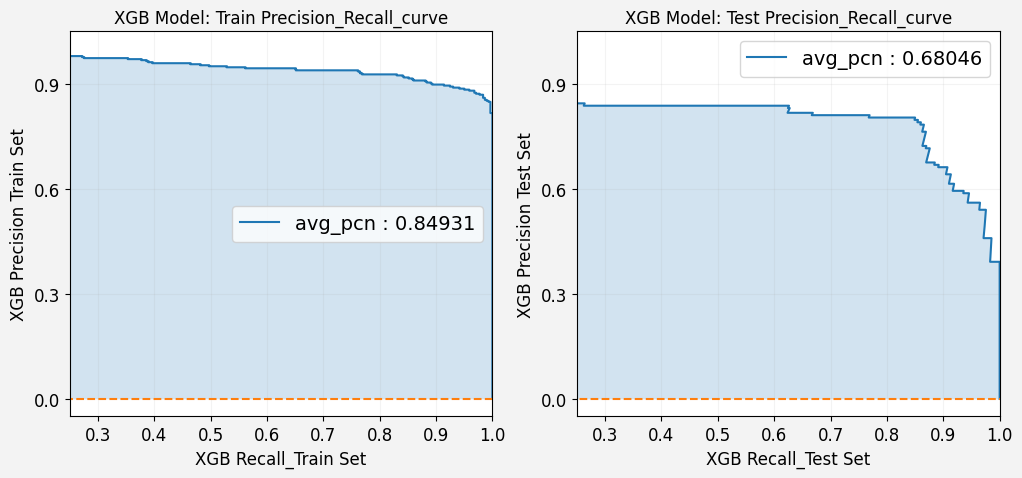

------------------------------------------------------------ 

************************************************************ 





Models
************************************************************ 

{'LR': LogisticRegression(C=0.1, solver='liblinear'), 'KNN': KNeighborsClassifier(metric='euclidean', n_neighbors=3), 'SVM': SVC(C=50, probability=True), 'DT': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50), 'RF': RandomForestClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       n_estimators=200), 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_cons

In [ ]:
# Train Model Summary
#train_summary = []
ML_models = {}

# ML Models to Train

model_index = ['LR', 'KNN', 'SVM', 'DT','RF', 'XGB']
model_sklearn = [LogisticRegression(penalty='l2', C=0.1, solver='liblinear'),
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='uniform'),
                 SVC(C=50, gamma='scale', kernel='rbf',probability=True),
                 DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100, min_samples_split=50),
                 RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=100, min_samples_split=50, n_estimators=200),
                 XGBClassifier(learning_rate=0.1, n_estimators=100, subsample=0.3, eval_metric='mlogloss',use_label_encoder=False)]



# Calling Defined Function for model Fitment and printing results
model_fitment(model_index, model_sklearn, 'Imbalanced', exp_results, X_train, y_train)


# Print Model Details
print('\n')
print (color.BOLD+"Models"+color.END)
print('*'*60, '\n')
print(ML_models)
print('-'*60, '\n')
print('\n')



### Residuals

```
# This is formatted as code
```



In [ ]:
# Print Residuals for all models
#exp_results=exp_results.reset_index(drop=True, inplace=True)
model_index = ['LR', 'KNN', 'SVM', 'DT','RF', 'XGB']
print_ml_residuals(model_index, 'Imbalanced', exp_results)

***************Model LR - Imbalanced Data Set******************
Residuals - Train Set
************************************************************ 

                                           Residuals
0  True     199217
False       147
Name: Class, d...
------------------------------------------------------------ 

Residuals - Test Set
************************************************************ 

                                           Residuals
1  True     85323
False      120
Name: Class, dty...
------------------------------------------------------------ 



***************Model KNN - Imbalanced Data Set******************
Residuals - Train Set
************************************************************ 

                                           Residuals
2  True     199299
False        65
Name: Class, d...
------------------------------------------------------------ 

Residuals - Test Set
************************************************************ 

                        

### Evaluation Plot

Model Wise Evaluation Parameters Comparison  for Imbalanced - Train-Test
******************************************************************************** 



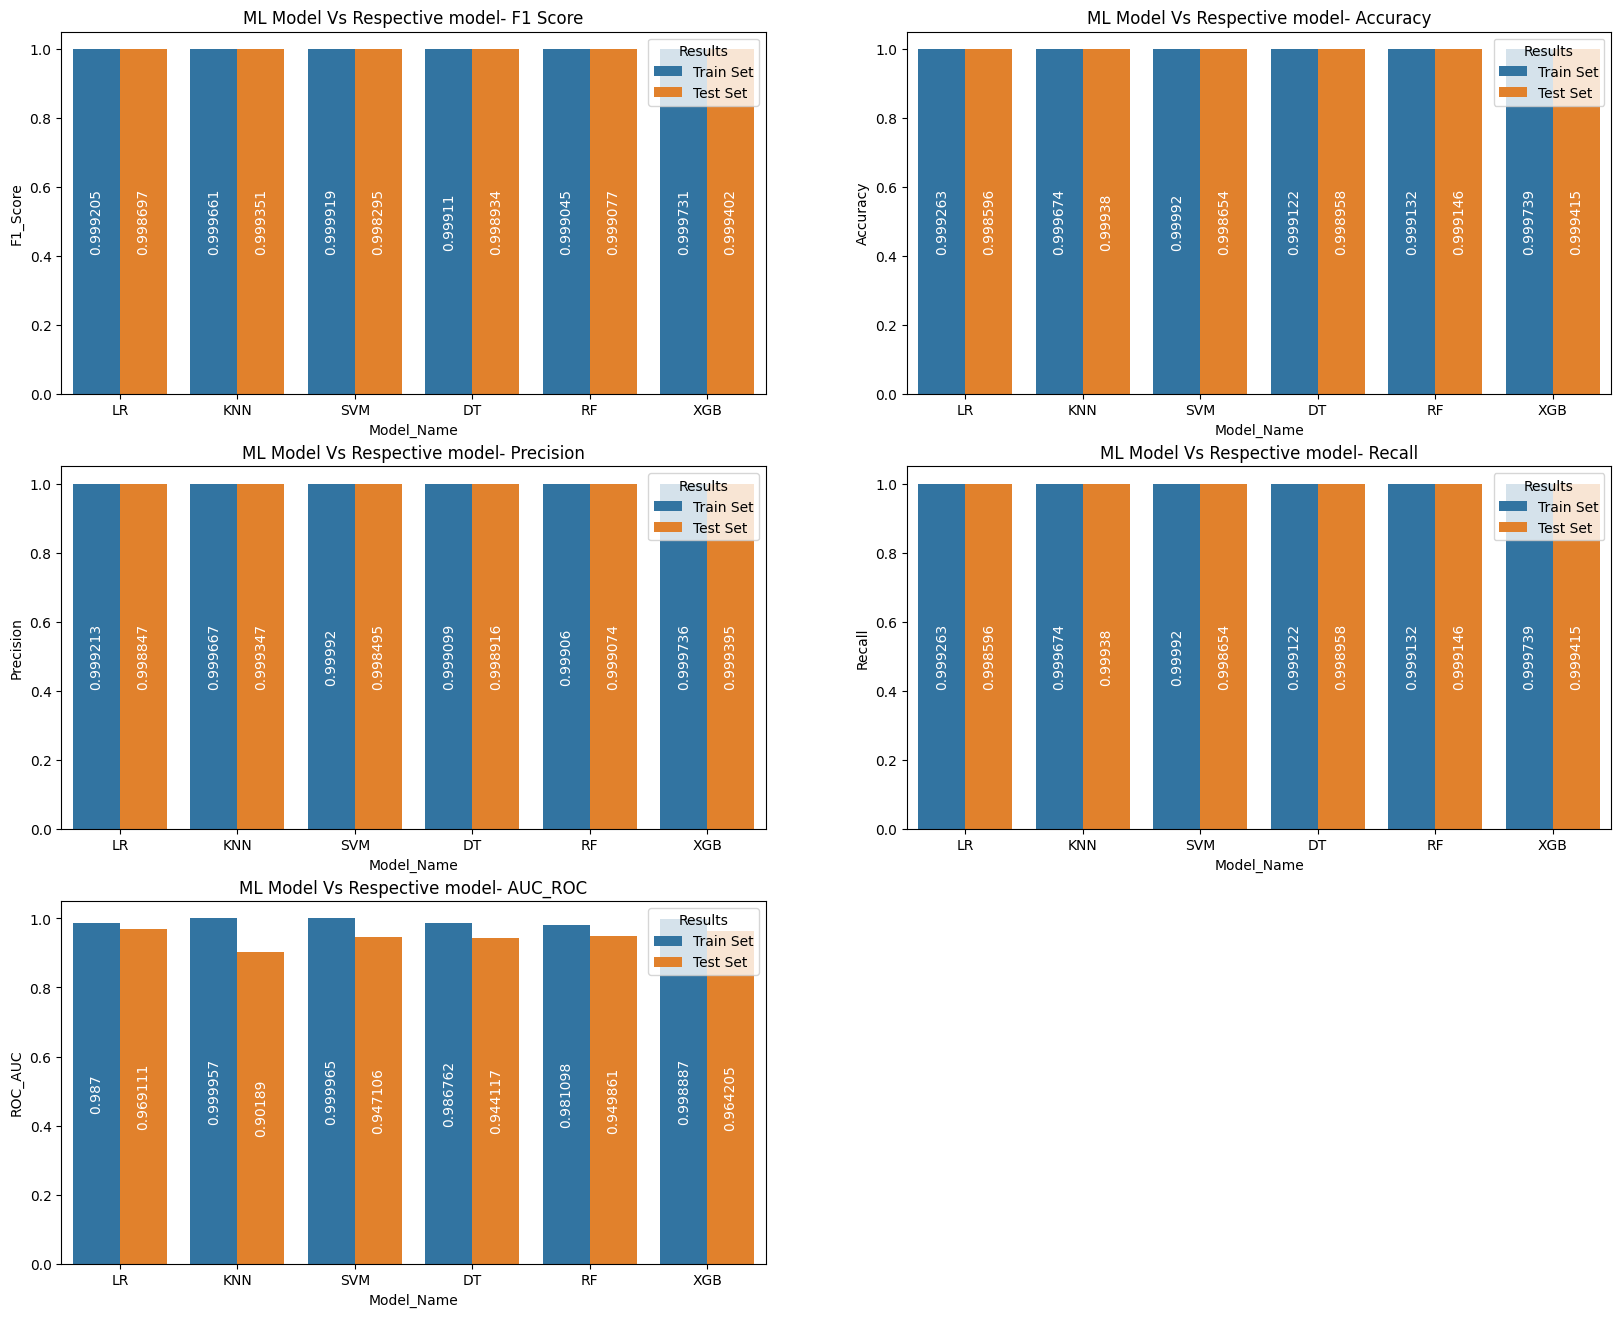

In [ ]:
# Plot Comparison of evaluation parameters for all the models]

model_eval_param(exp_results, 'Train-Test', 'Imbalanced')


### Model Train Results

In [ ]:
print (color.BOLD+"Model Results"+color.END)
print('*'*60, '\n')
exp_results


Model Results
************************************************************ 



Dataset Model_Name    Results            confusion_matrix  Accuracy  \
0   Imbalanced         LR  Train Set  [[198993, 27], [120, 224]]  0.999263   
1   Imbalanced         LR   Test Set    [[85210, 85], [35, 113]]  0.998596   
2   Imbalanced        KNN  Train Set    [[199012, 8], [57, 287]]  0.999674   
3   Imbalanced        KNN   Test Set    [[85281, 14], [39, 109]]  0.999380   
4   Imbalanced        SVM  Train Set    [[199020, 0], [16, 328]]  0.999920   
5   Imbalanced        SVM   Test Set     [[85289, 6], [109, 39]]  0.998654   
6   Imbalanced         DT  Train Set   [[198942, 78], [97, 247]]  0.999122   
7   Imbalanced         DT   Test Set     [[85257, 38], [51, 97]]  0.998958   
8   Imbalanced         RF  Train Set  [[198991, 29], [144, 200]]  0.999132   
9   Imbalanced         RF   Test Set     [[85279, 16], [57, 91]]  0.999146   
10  Imbalanced        XGB  Train Set    [[199015, 5], [47, 297]]  0.999739   
11  Imbalanced        XGB   Test Set    [[85276, 19], [31, 117]]  0.999415   

    Precision    Recall  Specificity       FPR       FNR       PPV       NPV  \
0    0.999213  0.999263     0.999864  0.000136  0.348837  0.892430  0.999397   
1    0.998847  0.998596     0.999003  0.000997  0.236486  0.570707  0.999589   
2    0.999667  0.999674     0.999960  0.000040  0.165698  0.972881  0.999714   
3    0.999347  0.999380     0.999836  0.000164  0.263514  0.886179  0.999543   
4    0.999920  0.999920     1.000000  0.000000  0.046512  1.000000  0.999920   
5    0.998495  0.998654     0.999930  0.000070  0.736486  0.866667  0.998724   
6    0.999099  0.999122     0.999608  0.000392  0.281977  0.760000  0.999513   
7    0.998916  0.998958     0.999554  0.000446  0.344595  0.718519  0.999402   
8    0.999060  0.999132     0.999854  0.000146  0.418605  0.873362  0.999277   
9    0.999074  0.999146     0.999812  0.000188  0.385135  0.850467  0.999332   
10   0.999736  0.999739     0.999975  0.000025  0.136628  0.983444  0.999764   
11   0.999395  0.999415     0.999777  0.000223  0.209459  0.860294  0.999637   

    F1_Score   ROC_AUC  Threshold  \
0   0.999205  0.987000   0.003717   
1   0.998697  0.969111   0.006739   
2   0.999661  0.999957   0.333333   
3   0.999351  0.901890   0.333333   
4   0.999919  0.999965   0.007409   
5   0.998295  0.947106   0.005839   
6   0.999110  0.986762   0.002188   
7   0.998934  0.944117   0.022624   
8   0.999045  0.981098   0.000777   
9   0.999077  0.949861   0.027936   
10  0.999731  0.998887   0.002112   
11  0.999402  0.964205   0.000897   

                                            Residuals  
0   True     199217
False       147
Name: Class, d...  
1   True     85323
False      120
Name: Class, dty...  
2   True     199299
False        65
Name: Class, d...  
3   True     85390
False       53
Name: Class, dty...  
4   True     199348
False        16
Name: Class, d...  
5   True     85328
False      115
Name: Class, dty...  
6   True     199189
False       175
Name: Class, d...  
7   True     85354
False       89
Name: Class, dty...  
8   True     199191
False       173
Name: Class, d...  
9   True     85370
False       73
Name: Class, dty...  
10  True     199312
False        52
Name: Class, d...  
11  True     85393
False       50
Name: Class, dty...

### Export Results to CSV

In [ ]:
# Export to CSV
exp_results.to_csv('exp_results.csv', index=False)

**Model Selection Criteria**
- As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model.
    
- If the model always predicts the same class (1 or 0) for all the data points, it will result in an accuracy of more than 99%
- Accuracy alone may not be a reliable performance metric when dealing with imbalanced datasets. It can be misleading, as it  it may not capture the model's ability to correctly identify the minority class.  .    
- Hence, ware measuringre the ROC-AUC score for fair evaluation of the mod, as s. We have usedenarios ROCo used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds.

- The default threshold of **0.5** is not always the ideal threshold to find the best **classification label** of the **test point**. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR / Recall is high and FPR is low, i.e., misclassifications are low.

### Outcome - Best Model
- Models Trained / Experimented - Logistic Regression, K-Nearest Neighbhor, SVM, Decision Tree, Random Forest and XGBoost
- **KNN** Model has better results among all the models run
  - **FPR** is low
  - **TPR** is high
  - **Threshold** is closer to 0.5
  - **Train & Test AUC_ROC** is good.





#### Feature Importance

**Based on the models run, KNN model is best model, when we consider the AUC_ROC and Threshold scores for both Train and Test.**

**Feature importance is not defined for the KNN Classification algorithm. There is no easy way to compute the features responsible for a classification here.**

**Hence for KNN we are not generating the Feature Importance Plots**



### Save Best Model

In [ ]:
# Best Model - Feature Importance
imb_best_model = ML_models['KNN']

In [ ]:
import pickle
mb_ML_models = ML_models
imb_best_model = ML_models['KNN']
# save the model to disk
imb_best_model_saved = 'Imb_best_model.sav'
pickle.dump(imb_best_model, open(imb_best_model_saved, 'wb'))

## Imbalance DataSet - Best Model Metrics

In [ ]:
print(color.BOLD+'Imbalance DataSet - Best Model : KNN Metrics'+color.BOLD)
print('*'*80,'\n')
exp_results[exp_results["Model_Name"]=='KNN']
exp_results[(exp_results["Model_Name"]=='KNN')]

Imbalance DataSet - Best Model : KNN Metrics
******************************************************************************** 



Dataset Model_Name    Results          confusion_matrix  Accuracy  \
2  Imbalanced        KNN  Train Set  [[199012, 8], [57, 287]]  0.999674   
3  Imbalanced        KNN   Test Set  [[85281, 14], [39, 109]]  0.999380   

   Precision    Recall  Specificity       FPR       FNR       PPV       NPV  \
2   0.999667  0.999674     0.999960  0.000040  0.165698  0.972881  0.999714   
3   0.999347  0.999380     0.999836  0.000164  0.263514  0.886179  0.999543   

   F1_Score   ROC_AUC  Threshold  \
2  0.999661  0.999957   0.333333   
3  0.999351  0.901890   0.333333   

                                           Residuals  
2  True     199299
False        65
Name: Class, d...  
3  True     85390
False       53
Name: Class, dty...

# Model building with balancing Classes

##### Class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

All the above Class Balancing Techniques increase the Dataset substantially.
- Both KNN and SVM are very slow.

**SVM -** One of the primary reasons popular libraries SVM algorithms are slow is because they are not incremental. They require the entire dataset to be in RAM all at once. So with the above balancing techniques data points increase substantially, it's going to run kind of slow.
*Please Note - I have tried running SVM models with 1 and 2 GPUS with 32 GB RAM & 16 GB VRAM and 64 GB RAM & 32 GB VRAM, the Cross validation and hypertuning could not completed even after 4.5 hours run*

**KNN -** The KNN algorithm does not work well with large datasets. The cost of calculating the distance between the new point and each existing point is huge, which degrades performance.
- But we will Train using KNN, as it was the best model for imbalanced dataset. However, we will use the default parameters (only change being CV which will be set to 3(.

**It is important to note, for both KNN and SVM, , however, that more training data does not necessarily lead to better classification.**

#### Decision - We will not be using SVM for the dataset, after we apply the above Balancing techniques.

**References :**

https://www.sciencedirect.com/science/article/abs/pii/S0925231207002962#:~:text=Support%20vector%20machine%20(SVM)%20is,the%20size%20of%20data

https://towardsdatascience.com/when-do-support-vector-machines-fail-3f23295ebef2

https://levelup.gitconnected.com/knn-failure-cases-limitations-and-strategy-to-pick-right-k-45de1b986428

https://www.simplilearn.com/tutorials/machine-learning-tutorial/knn-in-python#:~:text=The%20KNN%20algorithm%20does%20not,KNN%20algorithm%20to%20any%20dataset.
%20set.


## Import Required Libraries

In [ ]:
# Import Libraries
import imblearn
from imblearn.over_sampling import RandomOverSampler


In [ ]:
# Creating a Dataframe to store the Model Results

# DataFrame - Model Best Parameters
model_params_ros = pd.DataFrame(columns=['DataType','Model_Name', 'best_params', 'best_score'])


# Model Experiment / Train-Test Prediction Results
exp_results_ros = pd.DataFrame(columns=['Dataset','Model_Name', 'Results','confusion_matrix','Accuracy','Precision','Recall',
                                    'Specificity', 'FPR', 'FNR','PPV','NPV','F1_Score','ROC_AUC', 'Threshold', 'Residuals' ])

## Random Oversampling

In [ ]:
# Random Oversampling using imblearn
ros = RandomOverSampler(random_state=42)

# fitting the SMOTE to the train set
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_ros))

Original dataset shape Counter({0: 199020, 1: 344})
Resample dataset shape Counter({0: 199020, 1: 199020})


### Logistic Regression

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = lr_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_ros, y_train_ros, 'LR')

# Save results to Dataframe
new_row =  {'DataType' : 'ROS Balanced','Model_Name':'LR', 'best_params':best_params, 'best_score':best_score}
model_params_ros.loc[len(model_params_ros)] = new_row
model_params_ros

LR Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 23:09:36
Fitting 30 folds for each of 15 candidates, totalling 450 fits
End Time = 23:12:55


Best Param :  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score :  0.9904028342872977
------------------------------------------------------------ 

Print Results
************************************************************ 

0.990402 (0.000324) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990403 (0.000323) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.990403 (0.000323) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.990401 (0.000324) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990403 (0.000323) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.990403 (0.000323) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.990400 (0.000324) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9

DataType Model_Name                                        best_params  \
0  ROS Balanced         LR  {'C': 100, 'penalty': 'l2', 'solver': 'libline...   

   best_score  
0    0.990403

### Decision Tree

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = dt_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_ros, y_train_ros, 'DT')

# Save results to Dataframe
new_row =  {'DataType' : 'ROS Balanced','Model_Name':'DT', 'best_params':best_params, 'best_score':best_score}
model_params_ros.loc[len(model_params_ros)] = new_row
model_params_ros



DT Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 23:14:00
Fitting 10 folds for each of 8 candidates, totalling 80 fits
End Time = 23:15:10


Best Param :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
Best Score :  0.9950554708638604
------------------------------------------------------------ 

Print Results
************************************************************ 

0.994315 (0.000619) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}
0.994315 (0.000619) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}
0.994181 (0.000628) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
0.994181 (0.000628) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}
0.995007 (0.000247) with: {'criterion

DataType Model_Name                                        best_params  \
0  ROS Balanced         LR  {'C': 100, 'penalty': 'l2', 'solver': 'libline...   
1  ROS Balanced         DT  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   best_score  
0    0.990403  
1    0.995055

### RandomForest

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = rf_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_ros, y_train_ros, 'RF')

# Save results to Dataframe
new_row =  {'DataType' : 'ROS Balanced','Model_Name':'RF', 'best_params':best_params, 'best_score':best_score}
model_params_ros.loc[len(model_params_ros)] = new_row
model_params_ros



RF Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 23:22:52
Fitting 10 folds for each of 24 candidates, totalling 240 fits
End Time = 00:01:00


Best Param :  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
Best Score :  0.996452703066905
------------------------------------------------------------ 

Print Results
************************************************************ 

0.994348 (0.001301) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 10}
0.996416 (0.000228) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}
0.996453 (0.000245) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
0.995253 (0.001087) with: {'max_depth': 5, 'max_features': 'sq

DataType Model_Name                                        best_params  \
0  ROS Balanced         LR  {'C': 100, 'penalty': 'l2', 'solver': 'libline...   
1  ROS Balanced         DT  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2  ROS Balanced         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   

   best_score  
0    0.990403  
1    0.995055  
2    0.996453

### XGBoost

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = xgb_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_ros, y_train_ros, 'XGB')

# Save results to Dataframe
new_row =  {'DataType' : 'ROS Balanced','Model_Name':'XGB', 'best_params':best_params, 'best_score':best_score}
model_params_ros.loc[len(model_params_ros)] = new_row
model_params_ros



XGB Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 00:18:46
Fitting 10 folds for each of 12 candidates, totalling 120 fits
End Time = 00:20:40


Best Param :  {'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.6}
Best Score :  0.9999956738639876
------------------------------------------------------------ 

Print Results
************************************************************ 

0.999764 (0.000049) with: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.3}
0.999755 (0.000049) with: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.6}
0.999975 (0.000014) with: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.3}
0.999982 (0.000011) with: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.6}
0.999992 (0.000009) with: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.3}
0.999993 (0.000006) with: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample'

DataType Model_Name                                        best_params  \
0  ROS Balanced         LR  {'C': 100, 'penalty': 'l2', 'solver': 'libline...   
1  ROS Balanced         DT  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2  ROS Balanced         RF  {'max_depth': 5, 'max_features': 'sqrt', 'min_...   
3  ROS Balanced        XGB  {'learning_rate': 0.2, 'n_estimators': 200, 's...   
4  ROS Balanced        XGB  {'learning_rate': 0.2, 'n_estimators': 200, 's...   

   best_score  
0    0.990403  
1    0.995055  
2    0.996453  
3    0.999996  
4    0.999996

### Saving the Params

In [ ]:
# Creating a Dataframe to store the Imbalance HyperParameter Results for each model
# Creating dataframe and storing in CSV, as the runtime for each for each of models is time consuming.
# Please note that HyperTuning has been done with 1 GPU, 32 MB on JarvisLabs (AWS) platform.
# will be embedding the CV results images for each model and avoid execution of the same multiple times.


# Export to CSV
model_params_ros.to_csv('model_params_ros.csv', index=False)

## Model Training - ROS

************************************************************ 

Model-LR Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.96      0.95      0.95    398040
weighted avg       0.96      0.95      0.95    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-LR Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85295
           1       0.02      0.89      0.04       148

    accuracy                           0.93     85443


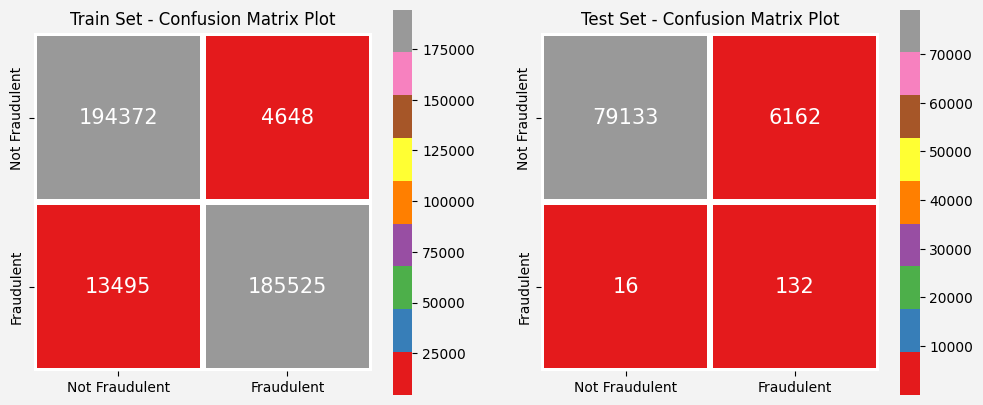

------------------------------------------------------------ 



Model - LR Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
0         LR  Train Set     0.976646  0.954419  0.023354  0.975559  0.935079   
1         LR   Test Set     0.927757  0.927694  0.072243  0.020972  0.999798   

   Threshold  
0   0.370903  
1   0.930399  
------------------------------------------------------------ 

Model - LR : Number of Train values correctly predicted
Class
True     379897
False     18143
Name: count, dtype: int64
------------------------------------------------------------ 

Model - LR : Number of Test values correctly predicted
Class
True     79265
False     6178
Name: count, dtype: int64


Model - LR ROC Curve
************************************************************ 



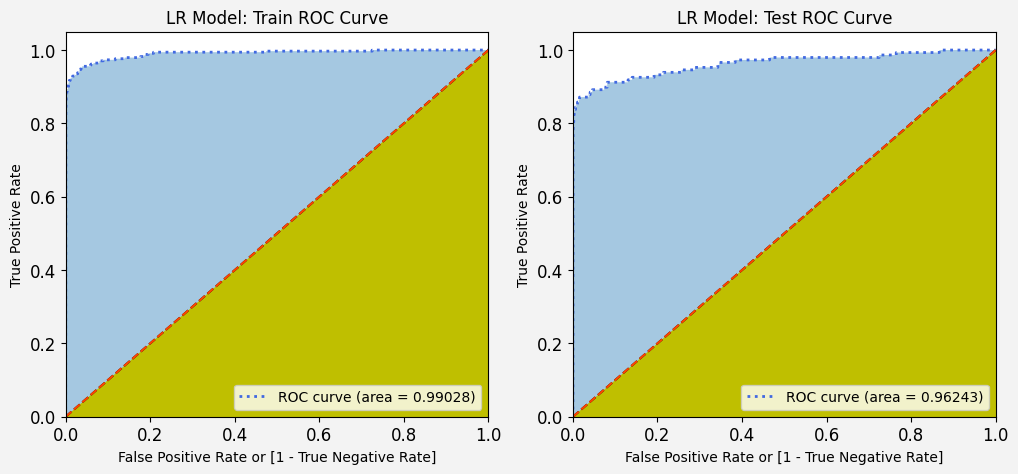

------------------------------------------------------------ 



Model - LR Precision Recall Curve
************************************************************ 



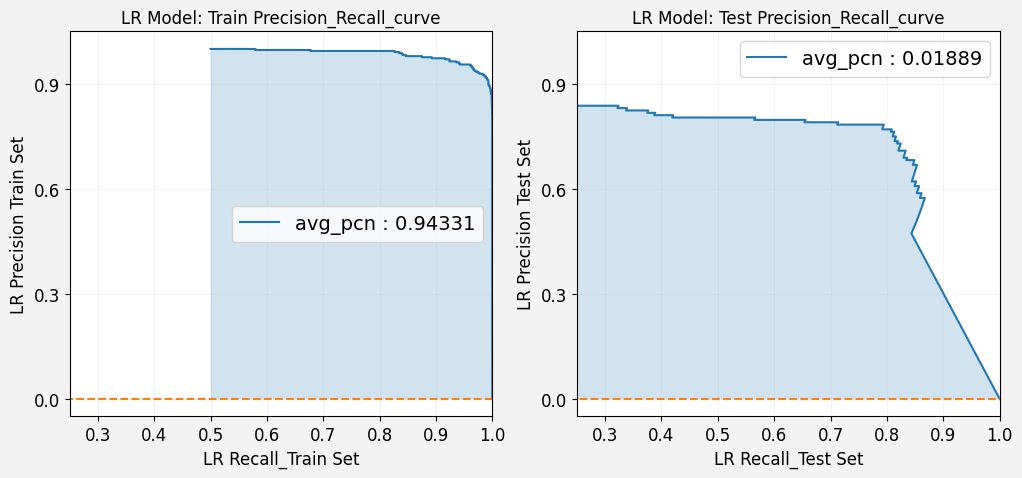

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-KNN Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-KNN Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

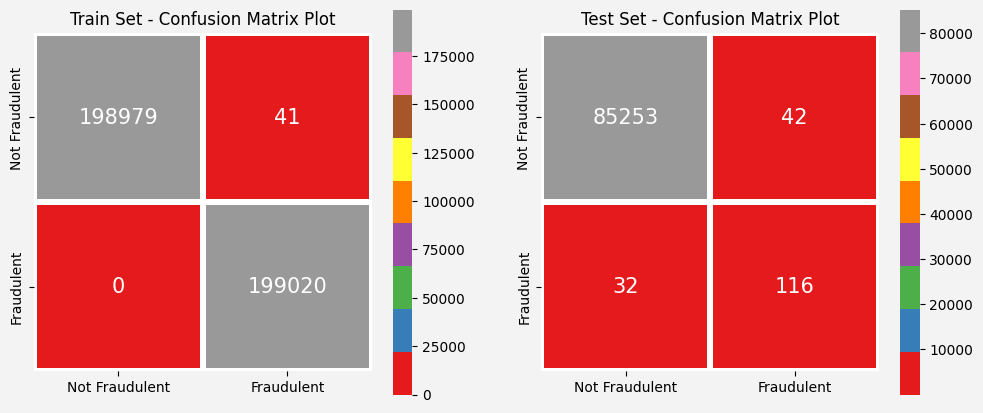

------------------------------------------------------------ 



Model - KNN Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
2        KNN  Train Set     0.999794  0.999897  0.000206  0.999794  1.000000   
3        KNN   Test Set     0.999508  0.999134  0.000492  0.734177  0.999625   

   Threshold  
2   1.000000  
3   0.333333  
------------------------------------------------------------ 

Model - KNN : Number of Train values correctly predicted
Class
True     397999
False        41
Name: count, dtype: int64
------------------------------------------------------------ 

Model - KNN : Number of Test values correctly predicted
Class
True     85369
False       74
Name: count, dtype: int64


Model - KNN ROC Curve
************************************************************ 



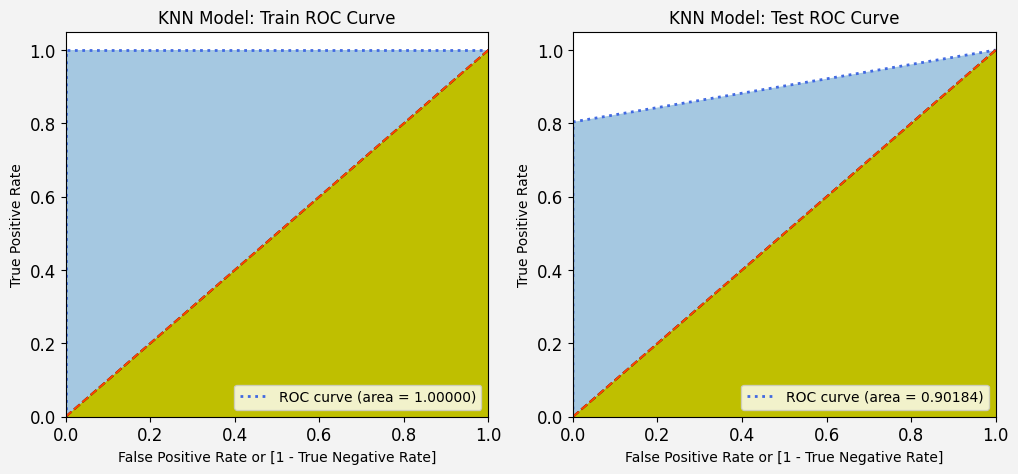

------------------------------------------------------------ 



Model - KNN Precision Recall Curve
************************************************************ 



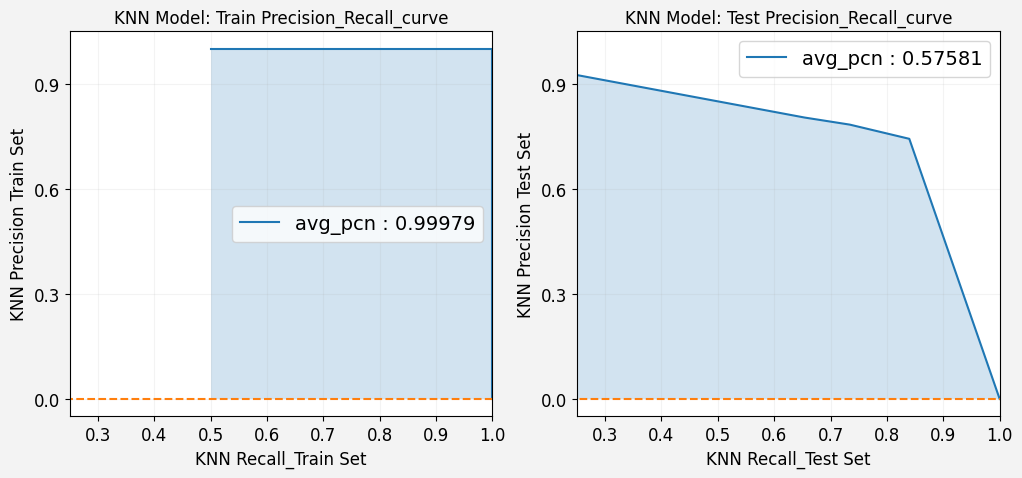

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-DT Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    199020
           1       0.99      0.95      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-DT Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.98  

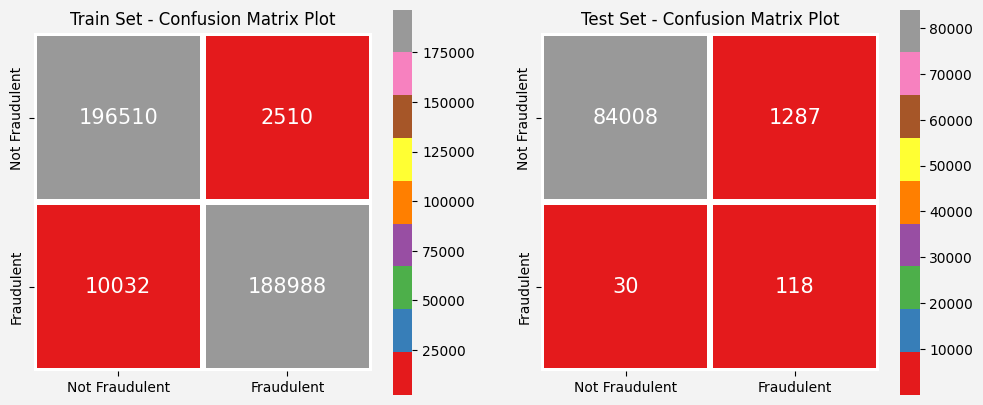

------------------------------------------------------------ 



Model - DT Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
4         DT  Train Set     0.987388  0.968491  0.012612  0.986893  0.951429   
5         DT   Test Set     0.984911  0.984586  0.015089  0.083986  0.999643   

   Threshold  
4    0.75326  
5    0.29605  
------------------------------------------------------------ 

Model - DT : Number of Train values correctly predicted
Class
True     385498
False     12542
Name: count, dtype: int64
------------------------------------------------------------ 

Model - DT : Number of Test values correctly predicted
Class
True     84126
False     1317
Name: count, dtype: int64


Model - DT ROC Curve
************************************************************ 



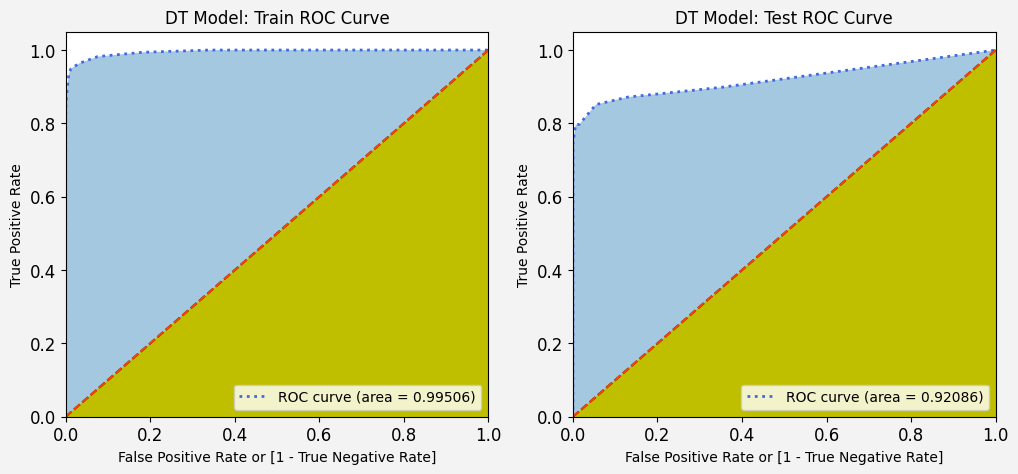

------------------------------------------------------------ 



Model - DT Precision Recall Curve
************************************************************ 



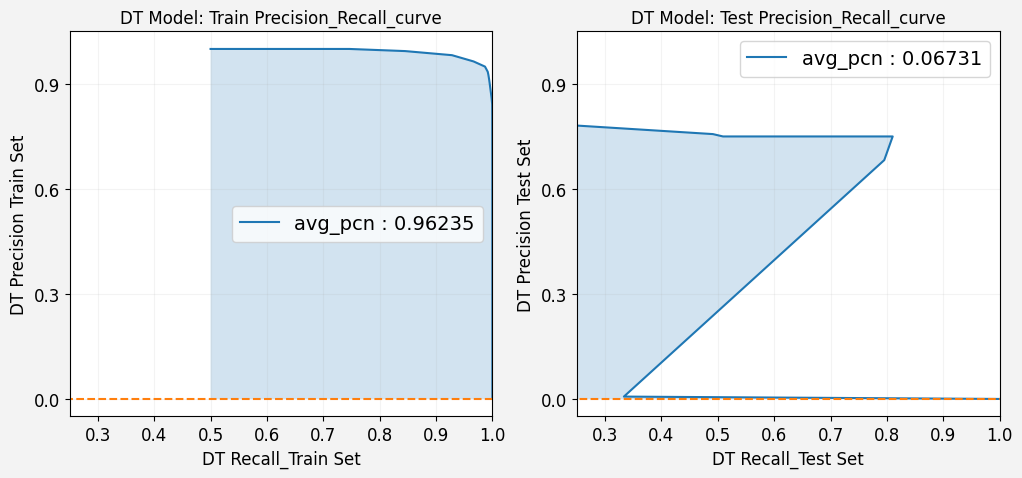

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-RF Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    199020
           1       1.00      0.93      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.97      0.96      0.96    398040
weighted avg       0.97      0.96      0.96    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-RF Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99  

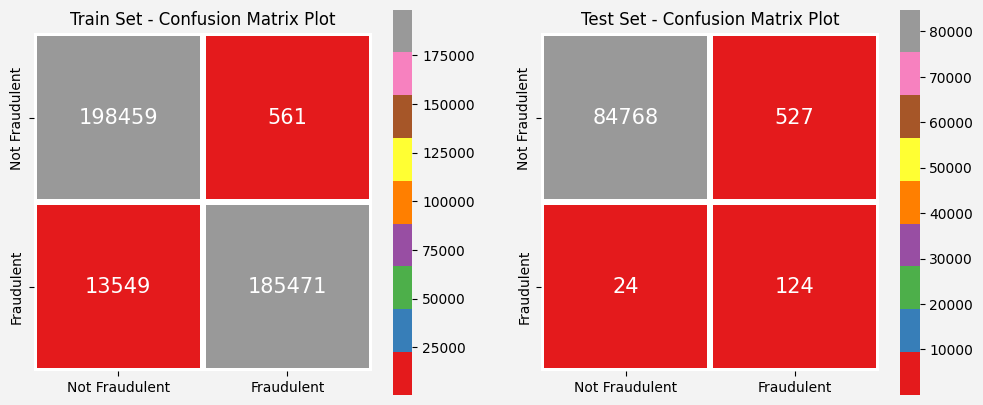

------------------------------------------------------------ 



Model - RF Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
6         RF  Train Set     0.997181  0.964551  0.002819  0.996984  0.936092   
7         RF   Test Set     0.993821  0.993551  0.006179  0.190476  0.999717   

   Threshold  
6   0.339722  
7   0.277070  
------------------------------------------------------------ 

Model - RF : Number of Train values correctly predicted
Class
True     383930
False     14110
Name: count, dtype: int64
------------------------------------------------------------ 

Model - RF : Number of Test values correctly predicted
Class
True     84892
False      551
Name: count, dtype: int64


Model - RF ROC Curve
************************************************************ 



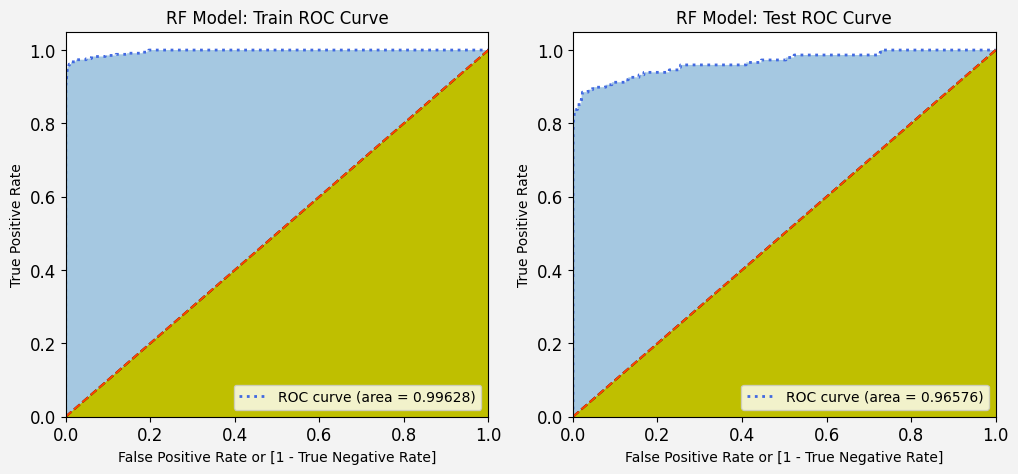

------------------------------------------------------------ 



Model - RF Precision Recall Curve
************************************************************ 



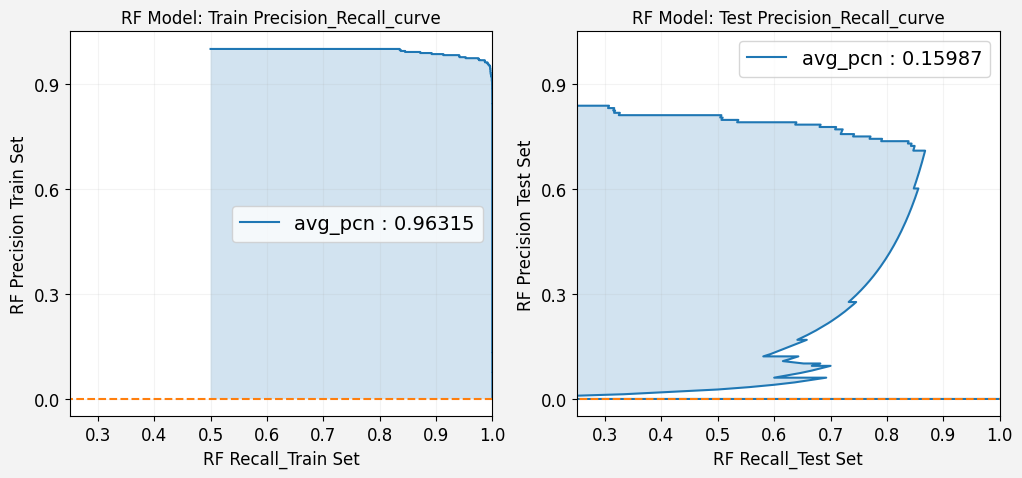

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-XGB Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-XGB Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

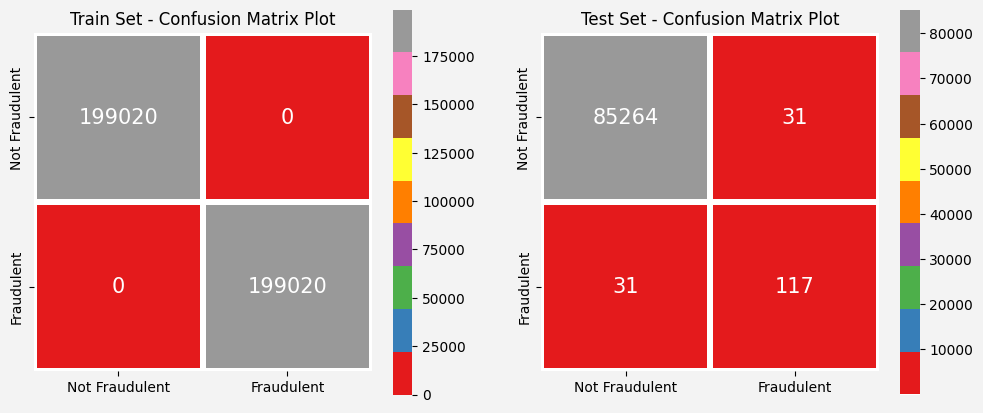

------------------------------------------------------------ 



Model - XGB Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
8        XGB  Train Set     1.000000  1.000000  0.000000  1.000000  1.000000   
9        XGB   Test Set     0.999637  0.999274  0.000363  0.790541  0.999637   

   Threshold  
8   0.999641  
9   0.000113  
------------------------------------------------------------ 

Model - XGB : Number of Train values correctly predicted
Class
True    398040
Name: count, dtype: int64
------------------------------------------------------------ 

Model - XGB : Number of Test values correctly predicted
Class
True     85381
False       62
Name: count, dtype: int64


Model - XGB ROC Curve
************************************************************ 



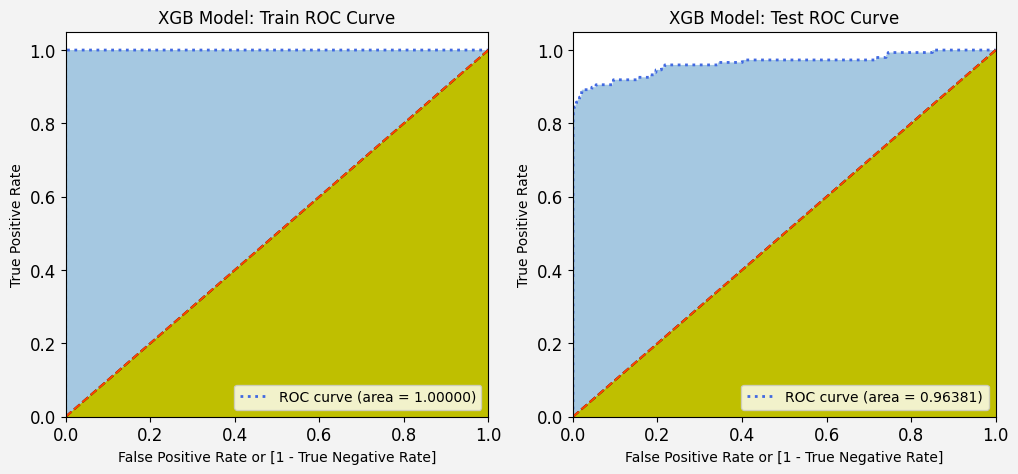

------------------------------------------------------------ 



Model - XGB Precision Recall Curve
************************************************************ 



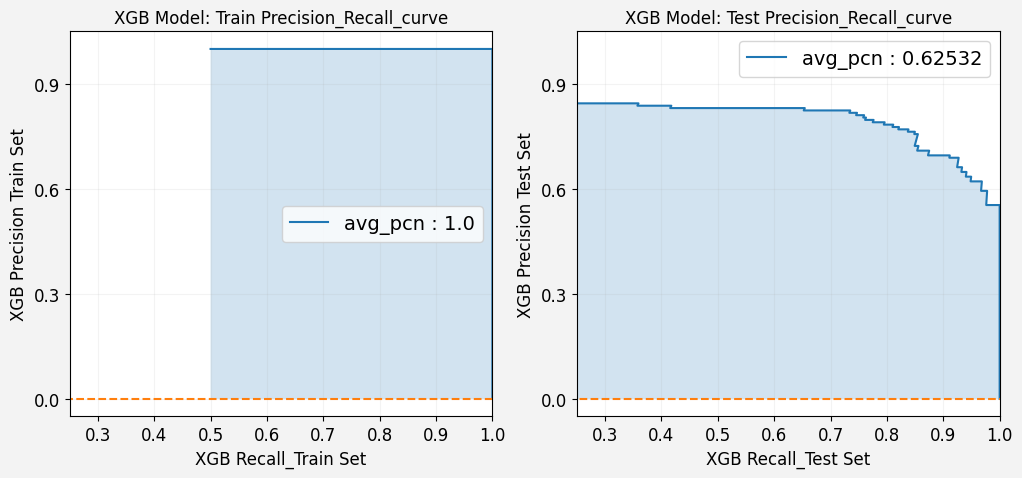

------------------------------------------------------------ 

************************************************************ 





Models
************************************************************ 

{'LR': LogisticRegression(C=100, solver='liblinear'), 'KNN': KNeighborsClassifier(n_neighbors=3), 'DT': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100,
                       min_samples_split=50), 'RF': RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=200), 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=No

In [ ]:
# Train Model Summary
#train_summary = []
ML_models = {}

# ML Models to Train

model_index = ['LR', 'KNN', 'DT', 'RF', 'XGB']
model_sklearn = [LogisticRegression(penalty='l2', C=100, solver='liblinear'),
                 # Using KNN  with Default
                 KNeighborsClassifier(n_neighbors=3),
                 # Dropping SVM
                 #SVC(probability=True),
                 DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=100, min_samples_split=50),
                 RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=50, min_samples_split=50, n_estimators=200),
                 XGBClassifier(learning_rate=0.2, n_estimators=200, subsample=0.6, eval_metric='mlogloss',use_label_encoder=False)]


# Calling Defined Function for model Fitment and printing results
model_fitment(model_index, model_sklearn, 'ROS Balanced', exp_results_ros,X_train_ros, y_train_ros)


# Print Model Details
print('\n')
print (color.BOLD+"Models"+color.END)
print('*'*60, '\n')
print(ML_models)
print('-'*60, '\n')
print('\n')


### Residuals

In [ ]:
# Print Residuals for all models
#exp_results=exp_results.reset_index(drop=True, inplace=True)
model_index = ['LR', 'KNN', 'DT', 'RF', 'XGB']
print_ml_residuals(model_index, 'ROS Balanced', exp_results_ros )

***************Model LR - ROS Balanced Data Set******************
Residuals - Train Set
************************************************************ 

                                           Residuals
0  Class
True     379897
False     18143
Name: co...
------------------------------------------------------------ 

Residuals - Test Set
************************************************************ 

                                           Residuals
1  Class
True     79265
False     6178
Name: coun...
------------------------------------------------------------ 



***************Model KNN - ROS Balanced Data Set******************
Residuals - Train Set
************************************************************ 

                                           Residuals
2  Class
True     397999
False        41
Name: co...
------------------------------------------------------------ 

Residuals - Test Set
************************************************************ 

                    

### Evaluation Plot

Model Wise Evaluation Parameters Comparison  for ROS Balanced - Train-Test
******************************************************************************** 



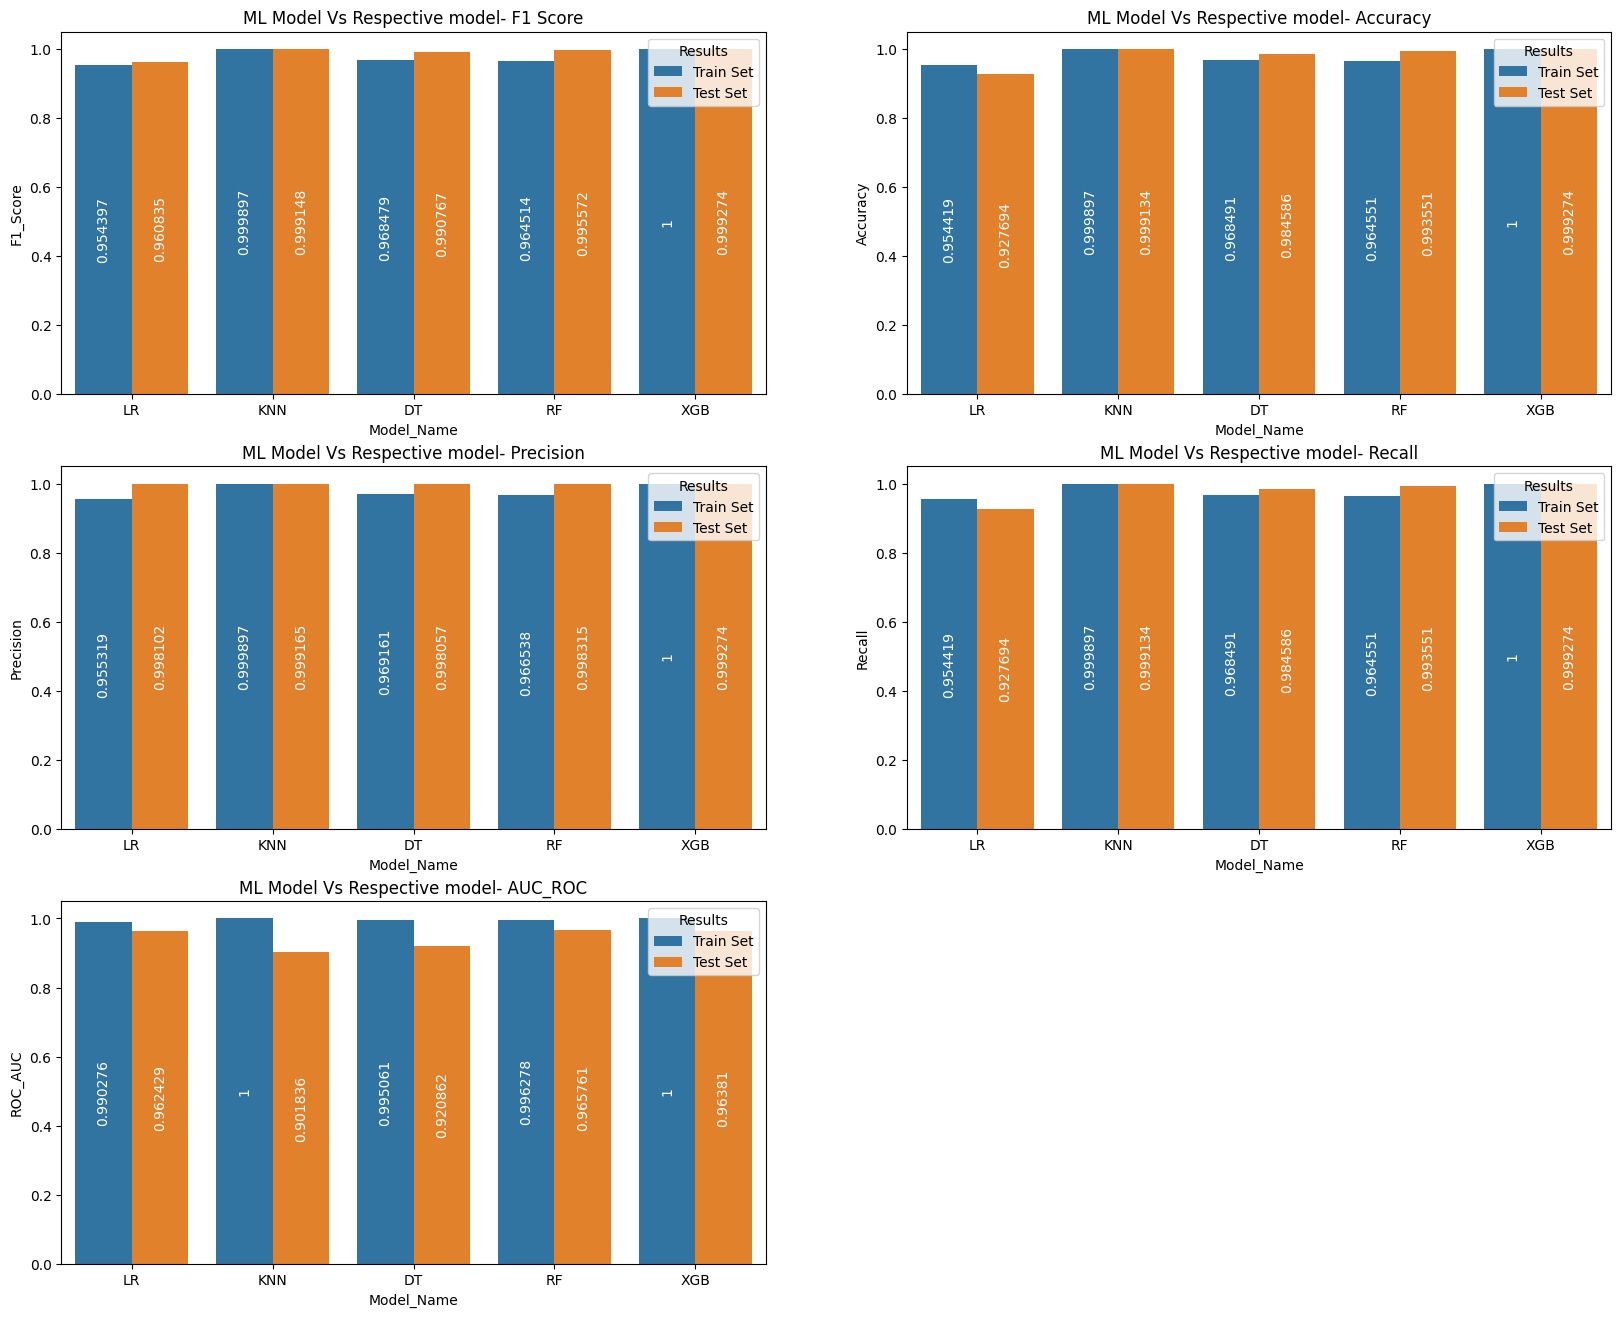

In [ ]:
# Plot Comparison of evaluation parameters for all the models]

model_eval_param(exp_results_ros, 'Train-Test', 'ROS Balanced')

### Model Train Results

In [ ]:
exp_results_ros

Dataset Model_Name    Results                   confusion_matrix  \
0  ROS Balanced         LR  Train Set  [[194372, 4648], [13495, 185525]]   
1  ROS Balanced         LR   Test Set         [[79133, 6162], [16, 132]]   
2  ROS Balanced        KNN  Train Set        [[198979, 41], [0, 199020]]   
3  ROS Balanced        KNN   Test Set           [[85253, 42], [32, 116]]   
4  ROS Balanced         DT  Train Set  [[196510, 2510], [10032, 188988]]   
5  ROS Balanced         DT   Test Set         [[84008, 1287], [30, 118]]   
6  ROS Balanced         RF  Train Set   [[198459, 561], [13549, 185471]]   
7  ROS Balanced         RF   Test Set          [[84768, 527], [24, 124]]   
8  ROS Balanced        XGB  Train Set         [[199020, 0], [0, 199020]]   
9  ROS Balanced        XGB   Test Set           [[85264, 31], [31, 117]]   

   Accuracy  Precision    Recall  Specificity       FPR       FNR       PPV  \
0  0.954419   0.955319  0.954419     0.976646  0.023354  0.067807  0.975559   
1  0.927694   0.998102  0.927694     0.927757  0.072243  0.108108  0.020972   
2  0.999897   0.999897  0.999897     0.999794  0.000206  0.000000  0.999794   
3  0.999134   0.999165  0.999134     0.999508  0.000492  0.216216  0.734177   
4  0.968491   0.969161  0.968491     0.987388  0.012612  0.050407  0.986893   
5  0.984586   0.998057  0.984586     0.984911  0.015089  0.202703  0.083986   
6  0.964551   0.966538  0.964551     0.997181  0.002819  0.068079  0.996984   
7  0.993551   0.998315  0.993551     0.993821  0.006179  0.162162  0.190476   
8  1.000000   1.000000  1.000000     1.000000  0.000000  0.000000  1.000000   
9  0.999274   0.999274  0.999274     0.999637  0.000363  0.209459  0.790541   

        NPV  F1_Score   ROC_AUC  Threshold  \
0  0.935079  0.954397  0.990276   0.370903   
1  0.999798  0.960835  0.962429   0.930399   
2  1.000000  0.999897  1.000000   1.000000   
3  0.999625  0.999148  0.901836   0.333333   
4  0.951429  0.968479  0.995061   0.753260   
5  0.999643  0.990767  0.920862   0.296050   
6  0.936092  0.964514  0.996278   0.339722   
7  0.999717  0.995572  0.965761   0.277070   
8  1.000000  1.000000  1.000000   0.999641   
9  0.999637  0.999274  0.963810   0.000113   

                                           Residuals  
0  Class
True     379897
False     18143
Name: co...  
1  Class
True     79265
False     6178
Name: coun...  
2  Class
True     397999
False        41
Name: co...  
3  Class
True     85369
False       74
Name: coun...  
4  Class
True     385498
False     12542
Name: co...  
5  Class
True     84126
False     1317
Name: coun...  
6  Class
True     383930
False     14110
Name: co...  
7  Class
True     84892
False      551
Name: coun...  
8     Class
True    398040
Name: count, dtype: int64  
9  Class
True     85381
False       62
Name: coun...

### Best Model

#### Outcome - Best Model
- Models Trained / Experimented - Logistic Regression, K-Nearest Neighbhor, SVM, Decision Tree, Random Forest and XGBoost
- **Random Forest (RF)** Model has better results among all the models run
  - **FPR** is low
  - **TPR** is high
  - **Threshold** is closer to 0.5
  - **Train & Test AUC_ROC** is good.

#### Feature Importance

Best Model : RF - Feature Importance - 
******************************************************************************** 

Top var = 14
2nd Top var = 10
3rd Top var = 4


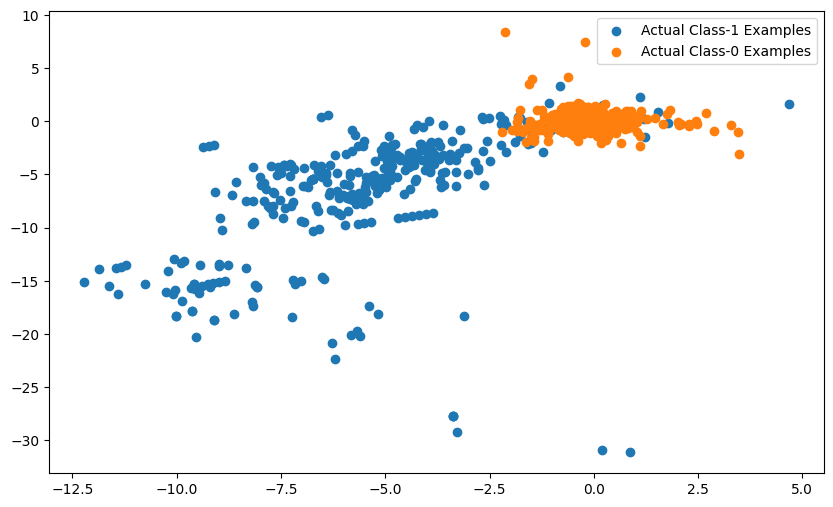

In [ ]:
# Best Model - Feature Importance
var_imp = []
clf = ML_models['RF']

# Feature Importance Function for the Best Model
print(color.BOLD+"Best Model : RF - Feature Importance"+" - "+color.BOLD)
print('*'*80,'\n')
feature_imp_model(clf, X_train_ros)

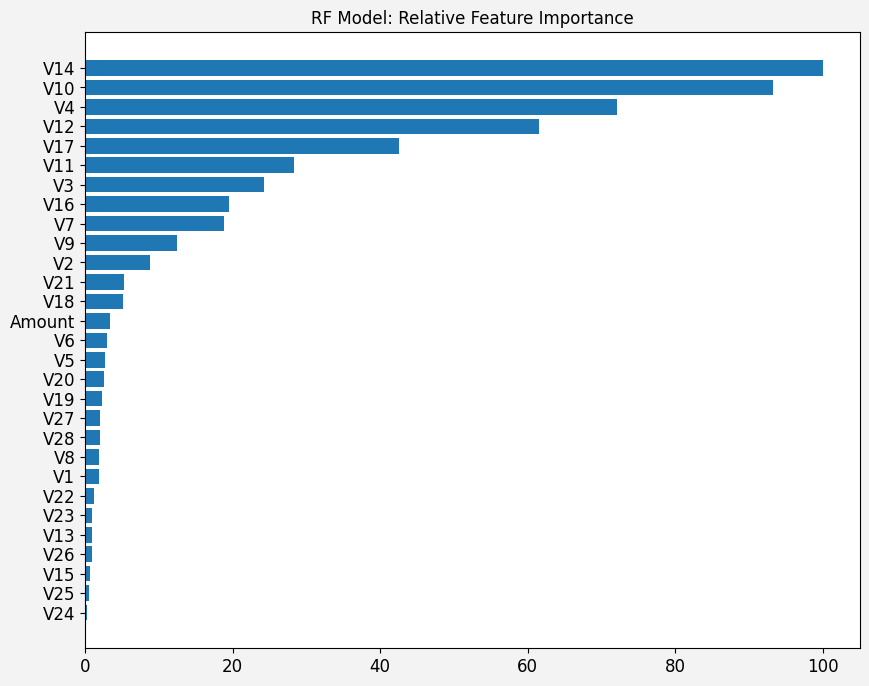

In [ ]:
# Re-Confirm the Feature Importance for the Model - XGB

clf = ML_models['RF']

verify_feature_importance(clf, X_train, 'RF')

#### Best Model - Metrics : ROS Balanced

In [ ]:
print(color.BOLD+'ROS Balanced DataSet - Best Model : RF Metrics'+color.BOLD)
print('*'*80,'\n')
exp_results_ros[(exp_results_ros["Model_Name"]=='RF') ]

ROS Balanced DataSet - Best Model : RF Metrics
******************************************************************************** 



Dataset Model_Name    Results                  confusion_matrix  \
6  ROS Balanced         RF  Train Set  [[198459, 561], [13549, 185471]]   
7  ROS Balanced         RF   Test Set         [[84768, 527], [24, 124]]   

   Accuracy  Precision    Recall  Specificity       FPR       FNR       PPV  \
6  0.964551   0.966538  0.964551     0.997181  0.002819  0.068079  0.996984   
7  0.993551   0.998315  0.993551     0.993821  0.006179  0.162162  0.190476   

        NPV  F1_Score   ROC_AUC  Threshold  \
6  0.936092  0.964514  0.996278   0.339722   
7  0.999717  0.995572  0.965761   0.277070   

                                           Residuals  
6  Class
True     383930
False     14110
Name: co...  
7  Class
True     84892
False      551
Name: coun...

### Export Results to CSV

In [ ]:
# Export to CSV
ros_ML_models = ML_models
exp_results_ros.to_csv('exp_results_ros.csv', index=False)

### Save Best Model

In [ ]:
import pickle
ros_best_model = ros_ML_models['RF']
# save the model to disk
ros_best_model_saved = 'ros_best_model.sav'
pickle.dump(ros_best_model, open(ros_best_model_saved, 'wb'))

## Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

In [ ]:
# Creating a Dataframe to store the Model Results

# DataFrame - Model Best Parameters
model_params_smote = pd.DataFrame(columns=['DataType','Model_Name', 'best_params', 'best_score'])


# Model Experiment / Train-Test Prediction Results
exp_results_smote = pd.DataFrame(columns=['Dataset','Model_Name', 'Results','confusion_matrix','Accuracy','Precision','Recall',
                                    'Specificity', 'FPR', 'FNR','PPV','NPV','F1_Score','ROC_AUC', 'Threshold', 'Residuals' ])

In [ ]:
# instantiate SMOTE
sm = SMOTE(random_state=27)

# fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 199020, 1: 344})
Resample dataset shape Counter({0: 199020, 1: 199020})


In [ ]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (199364, 29)
After SMOTE oversampling X_train shape= (398040, 29)


### Logistic Regression

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = lr_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_smote, y_train_smote, 'LR')

# Save results to Dataframe
new_row =  {'DataType' : 'SMOTE Balanced','Model_Name':'LR', 'best_params':best_params, 'best_score':best_score}
model_params_smote.loc[len(model_params_smote)] = new_row
model_params_smote



LR Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 01:33:02
Fitting 30 folds for each of 15 candidates, totalling 450 fits
End Time = 01:36:16


Best Param :  {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score :  0.9924774784882595
------------------------------------------------------------ 

Print Results
************************************************************ 

0.992476 (0.000298) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992477 (0.000298) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.992476 (0.000298) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.992476 (0.000298) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992477 (0.000298) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.992476 (0.000298) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.992474 (0.000298) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992476

DataType Model_Name                                    best_params  \
0  SMOTE Balanced         LR  {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}   

   best_score  
0    0.992477

### Decision Tree

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = dt_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_smote, y_train_smote, 'DT')

# Save results to Dataframe
new_row =  {'DataType' : 'SMOTE Balanced','Model_Name':'DT', 'best_params':best_params, 'best_score':best_score}
model_params_smote.loc[len(model_params_smote)] = new_row
model_params_smote



DT Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 01:39:48
Fitting 10 folds for each of 8 candidates, totalling 80 fits
End Time = 01:41:50


Best Param :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
Best Score :  0.9917508683843164
------------------------------------------------------------ 

Print Results
************************************************************ 

0.991704 (0.000300) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}
0.991705 (0.000299) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}
0.991751 (0.000301) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
0.991744 (0.000302) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}
0.991594 (0.000308) with: {'criterion': 

DataType Model_Name  \
0  SMOTE Balanced         LR   
1  SMOTE Balanced         DT   

                                         best_params  best_score  
0      {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}    0.992477  
1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...    0.991751

### Random Forest

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = rf_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_smote, y_train_smote, 'RF')

# Save results to Dataframe
new_row =  {'DataType' : 'SMOTE Balanced','Model_Name':'RF', 'best_params':best_params, 'best_score':best_score}
model_params_smote.loc[len(model_params_smote)] = new_row
model_params_smote



RF Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 01:46:24
Fitting 10 folds for each of 24 candidates, totalling 240 fits
End Time = 02:46:09


Best Param :  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}
Best Score :  0.9942269703258863
------------------------------------------------------------ 

Print Results
************************************************************ 

0.992457 (0.000626) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 10}
0.994103 (0.000354) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}
0.994176 (0.000227) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
0.992846 (0.000624) with: {'max_depth': 5, 'max_features': 

DataType Model_Name  \
0  SMOTE Balanced         LR   
1  SMOTE Balanced         DT   
2  SMOTE Balanced         RF   

                                         best_params  best_score  
0      {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}    0.992477  
1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...    0.991751  
2  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.994227

### XGBoost

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = xgb_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_smote, y_train_smote, 'XGB')

# Save results to Dataframe
new_row =  {'DataType' : 'SMOTE Balanced','Model_Name':'XGB', 'best_params':best_params, 'best_score':best_score}
model_params_smote.loc[len(model_params_smote)] = new_row
model_params_smote



XGB Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 04:06:11
Fitting 10 folds for each of 12 candidates, totalling 120 fits
End Time = 04:08:15


Best Param :  {'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.6}
Best Score :  0.9999953219865372
------------------------------------------------------------ 

Print Results
************************************************************ 

0.998448 (0.000116) with: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.3}
0.998461 (0.000115) with: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.6}
0.999947 (0.000015) with: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.3}
0.999953 (0.000015) with: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.6}
0.999987 (0.000008) with: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.3}
0.999989 (0.000006) with: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample'

DataType Model_Name  \
0  SMOTE Balanced         LR   
1  SMOTE Balanced         DT   
2  SMOTE Balanced         RF   
3  SMOTE Balanced        XGB   

                                         best_params  best_score  
0      {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}    0.992477  
1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...    0.991751  
2  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.994227  
3  {'learning_rate': 0.2, 'n_estimators': 200, 's...    0.999995

### Saving the Params

In [ ]:
# Creating a Dataframe to store the Imbalance HyperParameter Results for each model
# Creating dataframe and storing in CSV, as the runtime for each for each of models is time consuming.
# Please note that HyperTuning has been done with 1 GPU, 32 MB on JarvisLabs (AWS) platform.
# will be embedding the CV results images for each model and avoid execution of the same multiple times.


# Export to CSV
model_params_smote.to_csv('model_params_smote.csv', index=False)

## Model Training - SMOTE

************************************************************ 

Model-LR Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-LR Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.89      0.04       148

    accuracy                           0.92     85443


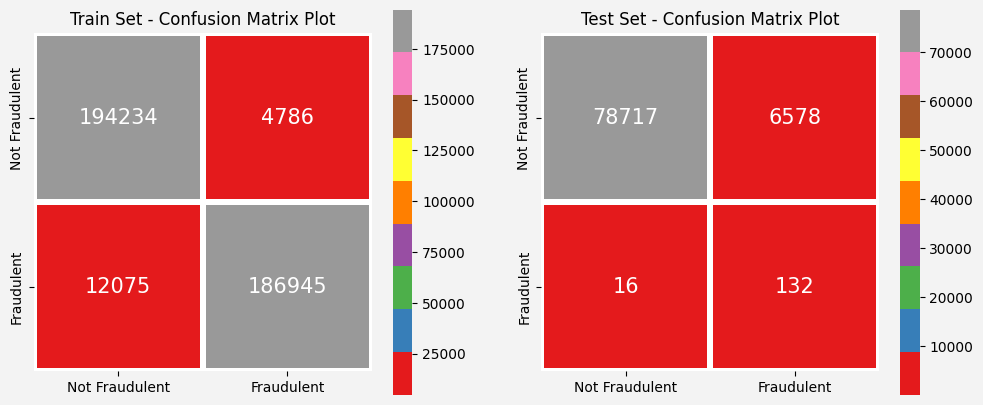

------------------------------------------------------------ 



Model - LR Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
0         LR  Train Set     0.975952  0.957640  0.024048  0.975038  0.941471   
1         LR   Test Set     0.922879  0.922826  0.077121  0.019672  0.999797   

   Threshold  
0   0.397782  
1   0.933968  
------------------------------------------------------------ 

Model - LR : Number of Train values correctly predicted
Class
True     381179
False     16861
Name: count, dtype: int64
------------------------------------------------------------ 

Model - LR : Number of Test values correctly predicted
Class
True     78849
False     6594
Name: count, dtype: int64


Model - LR ROC Curve
************************************************************ 



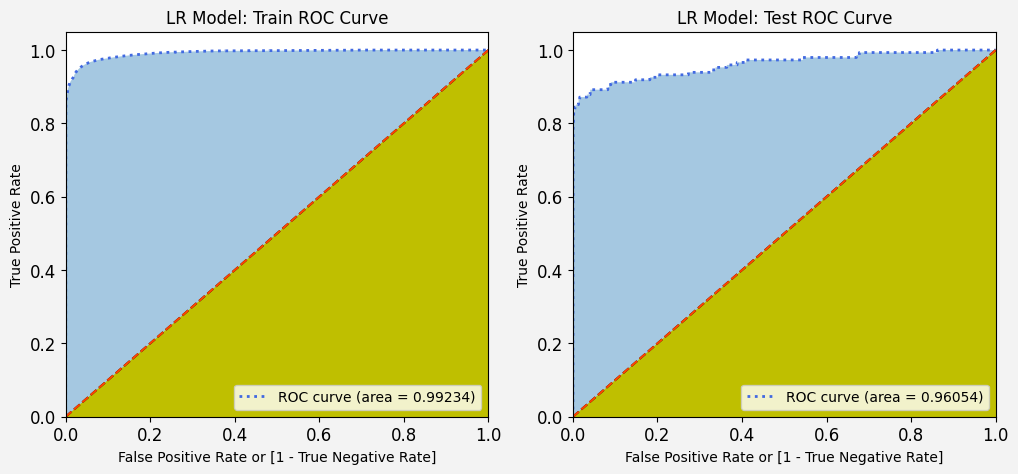

------------------------------------------------------------ 



Model - LR Precision Recall Curve
************************************************************ 



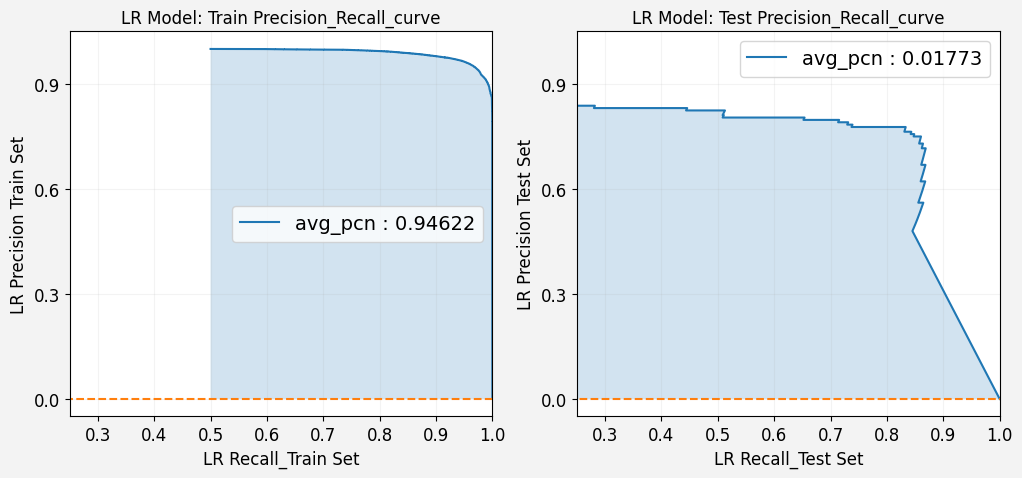

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-KNN Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-KNN Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

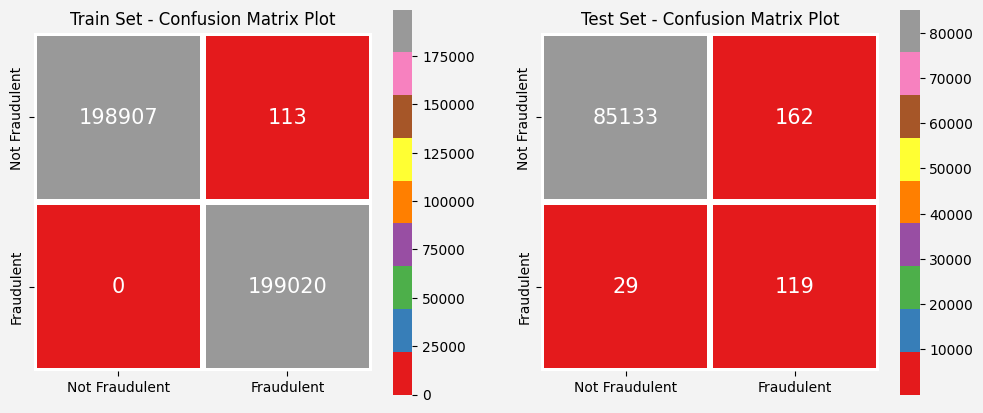

------------------------------------------------------------ 



Model - KNN Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
2        KNN  Train Set     0.999432  0.999716  0.000568  0.999433  1.000000   
3        KNN   Test Set     0.998101  0.997765  0.001899  0.423488  0.999659   

   Threshold  
2   1.000000  
3   0.333333  
------------------------------------------------------------ 

Model - KNN : Number of Train values correctly predicted
Class
True     397927
False       113
Name: count, dtype: int64
------------------------------------------------------------ 

Model - KNN : Number of Test values correctly predicted
Class
True     85252
False      191
Name: count, dtype: int64


Model - KNN ROC Curve
************************************************************ 



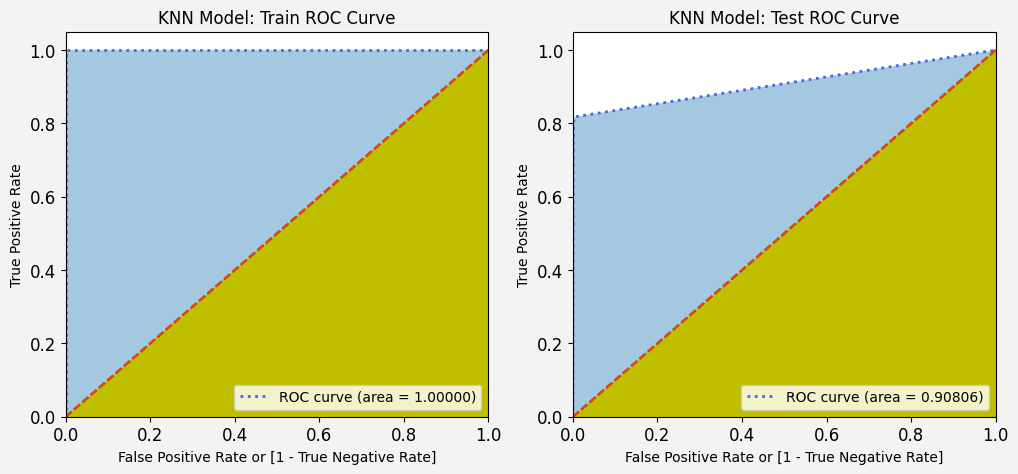

------------------------------------------------------------ 



Model - KNN Precision Recall Curve
************************************************************ 



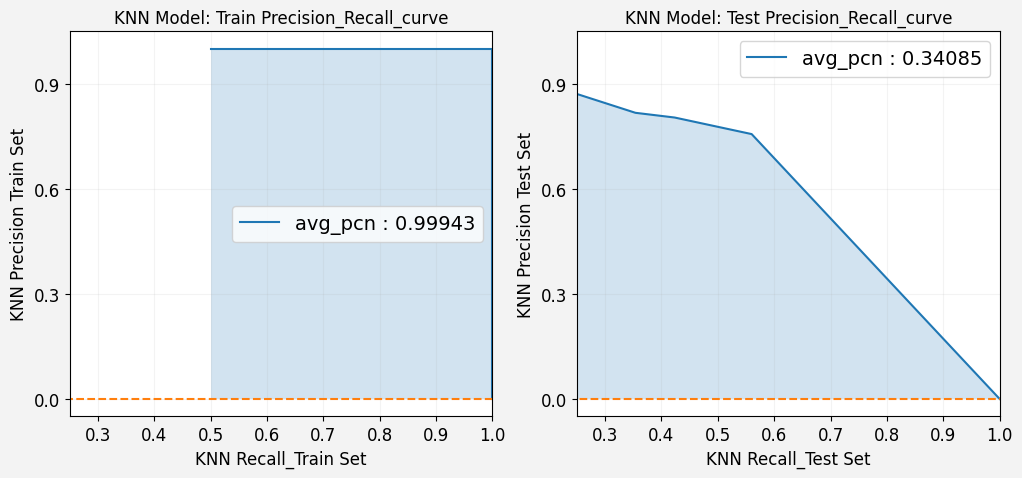

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-DT Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    199020
           1       0.97      0.96      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-DT Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.97  

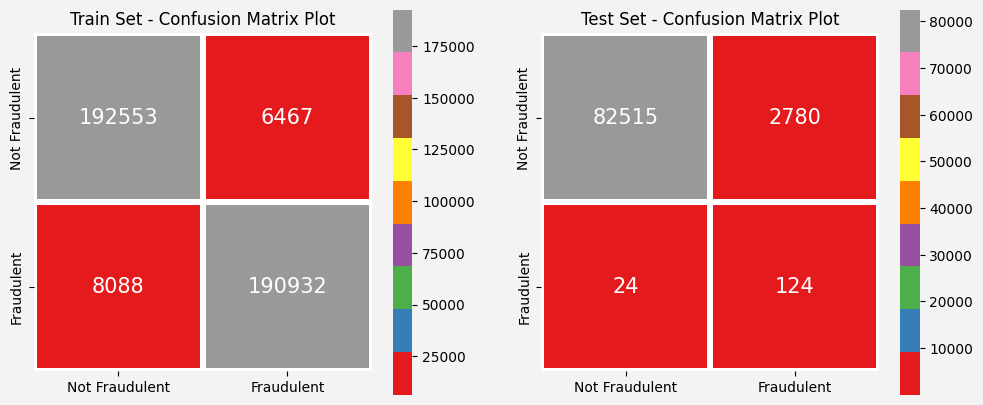

------------------------------------------------------------ 



Model - DT Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
4         DT  Train Set     0.967506  0.963433  0.032494  0.967239  0.959689   
5         DT   Test Set     0.967407  0.967183  0.032593  0.042700  0.999709   

   Threshold  
4   0.536122  
5   0.127549  
------------------------------------------------------------ 

Model - DT : Number of Train values correctly predicted
Class
True     383485
False     14555
Name: count, dtype: int64
------------------------------------------------------------ 

Model - DT : Number of Test values correctly predicted
Class
True     82639
False     2804
Name: count, dtype: int64


Model - DT ROC Curve
************************************************************ 



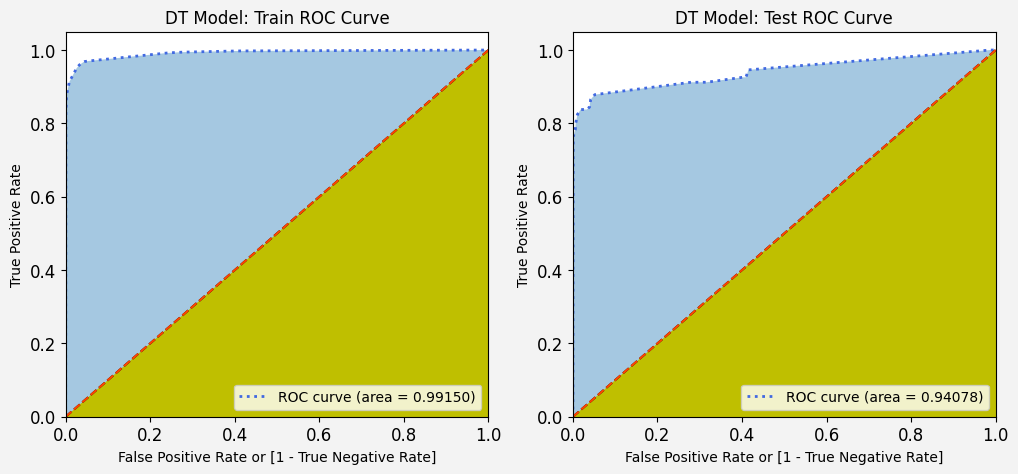

------------------------------------------------------------ 



Model - DT Precision Recall Curve
************************************************************ 



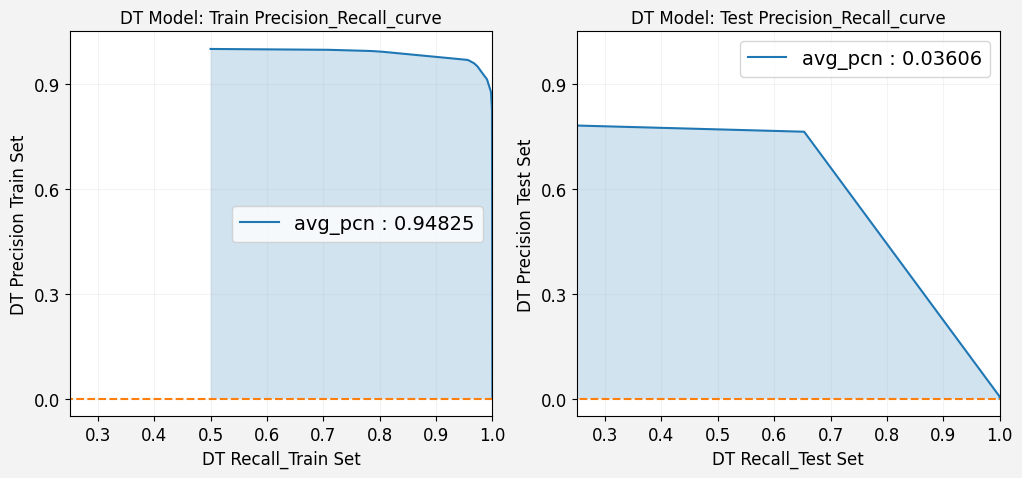

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-RF Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    199020
           1       0.99      0.90      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-RF Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99  

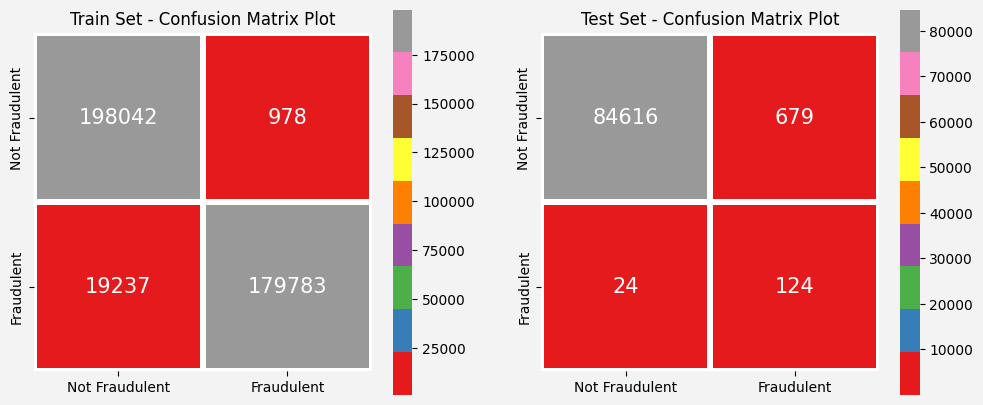

------------------------------------------------------------ 



Model - RF Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
6         RF  Train Set     0.995086  0.949214  0.004914  0.994590  0.911464   
7         RF   Test Set     0.992039  0.991772  0.007961  0.154421  0.999716   

   Threshold  
6   0.301733  
7   0.312452  
------------------------------------------------------------ 

Model - RF : Number of Train values correctly predicted
Class
True     377825
False     20215
Name: count, dtype: int64
------------------------------------------------------------ 

Model - RF : Number of Test values correctly predicted
Class
True     84740
False      703
Name: count, dtype: int64


Model - RF ROC Curve
************************************************************ 



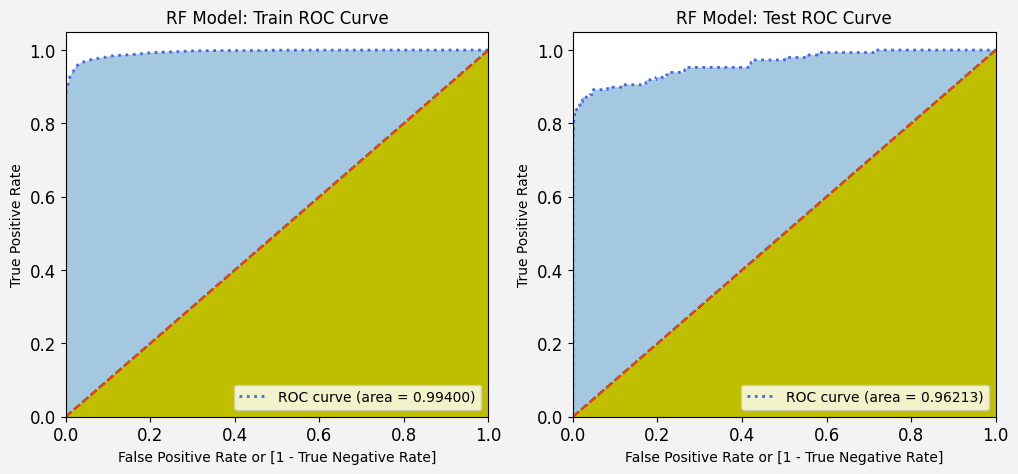

------------------------------------------------------------ 



Model - RF Precision Recall Curve
************************************************************ 



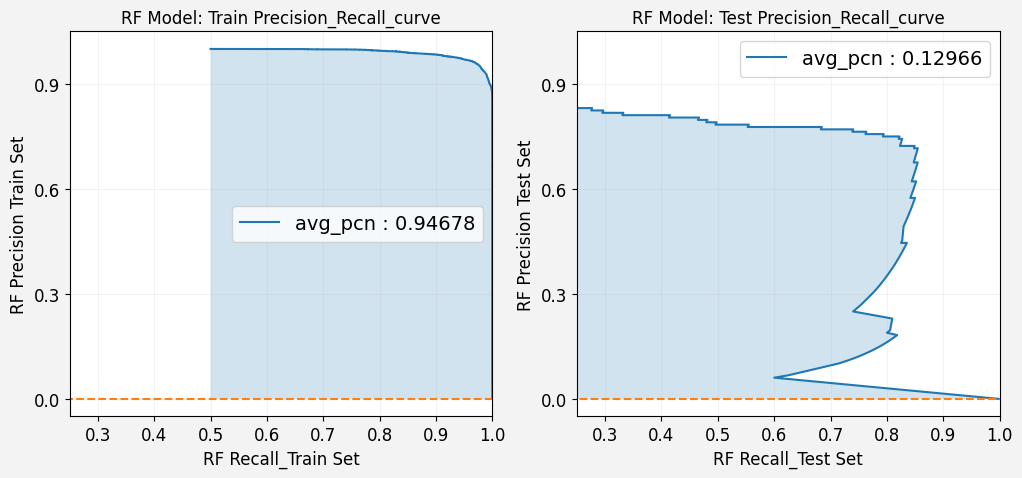

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-XGB Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

------------------------------------------------------------ 

Getting Test Metrics...
Model-XGB Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

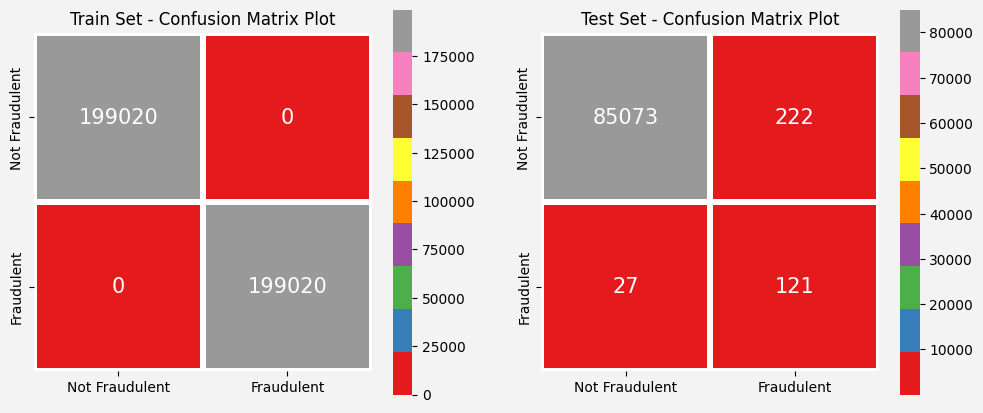

------------------------------------------------------------ 



Model - XGB Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR      PPV       NPV  \
8        XGB  Train Set     1.000000  1.000000  0.000000  1.00000  1.000000   
9        XGB   Test Set     0.997397  0.997086  0.002603  0.35277  0.999683   

   Threshold  
8   0.848949  
9   0.022230  
------------------------------------------------------------ 

Model - XGB : Number of Train values correctly predicted
Class
True    398040
Name: count, dtype: int64
------------------------------------------------------------ 

Model - XGB : Number of Test values correctly predicted
Class
True     85194
False      249
Name: count, dtype: int64


Model - XGB ROC Curve
************************************************************ 



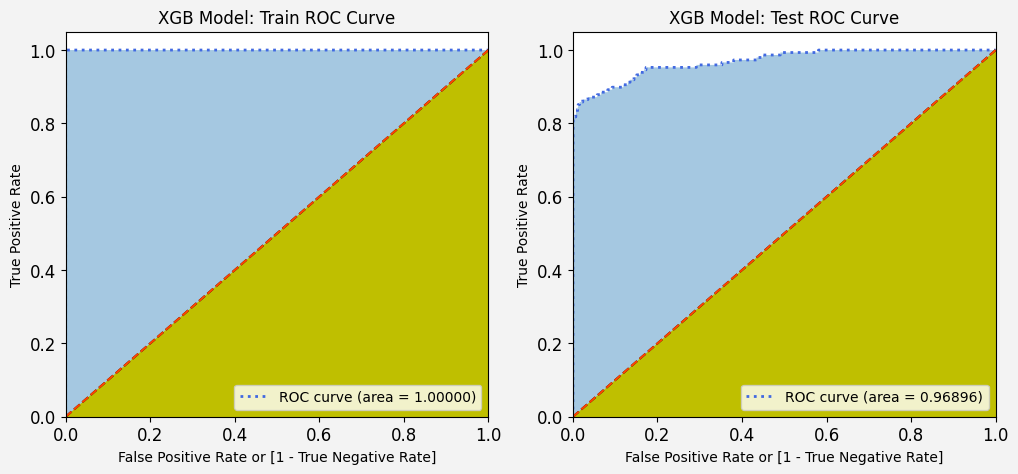

------------------------------------------------------------ 



Model - XGB Precision Recall Curve
************************************************************ 



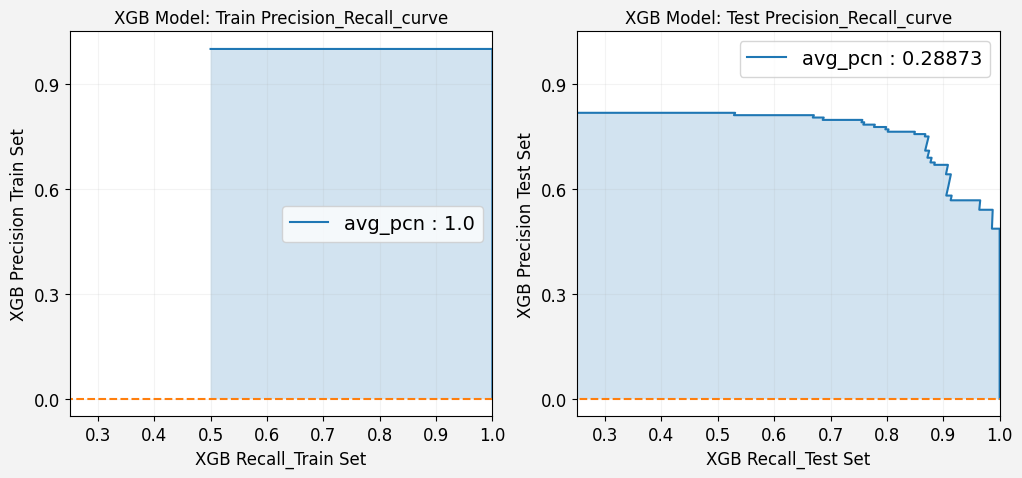

------------------------------------------------------------ 

************************************************************ 





Models
************************************************************ 

{'LR': LogisticRegression(C=10), 'KNN': KNeighborsClassifier(n_neighbors=3), 'DT': DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50), 'RF': RandomForestClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100), 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
 

In [ ]:
# Train Model Summary
#train_summary = []
ML_models = {}

# ML Models to Train

model_index = ['LR','KNN', 'DT','RF', 'XGB']
model_sklearn = [LogisticRegression(penalty='l2', C=10, solver='lbfgs'),
                 # Using KNN  with Default
                 KNeighborsClassifier(n_neighbors=3),
                 DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=100, min_samples_split=50),
                 RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=100, min_samples_split=100, n_estimators=100),
                 XGBClassifier(learning_rate=0.2, n_estimators=200, subsample=0.6, eval_metric='mlogloss',use_label_encoder=False)]

# Calling Defined Function for model Fitment and printing results
model_fitment(model_index, model_sklearn, 'SMOTE Balanced', exp_results_smote, X_train_smote, y_train_smote)


# Print Model Details
print('\n')
print (color.BOLD+"Models"+color.END)
print('*'*60, '\n')
print(ML_models)
print('-'*60, '\n')
print('\n')


Evaluation Plot

Model Wise Evaluation Parameters Comparison  for SMOTE Balanced - Train-Test
******************************************************************************** 



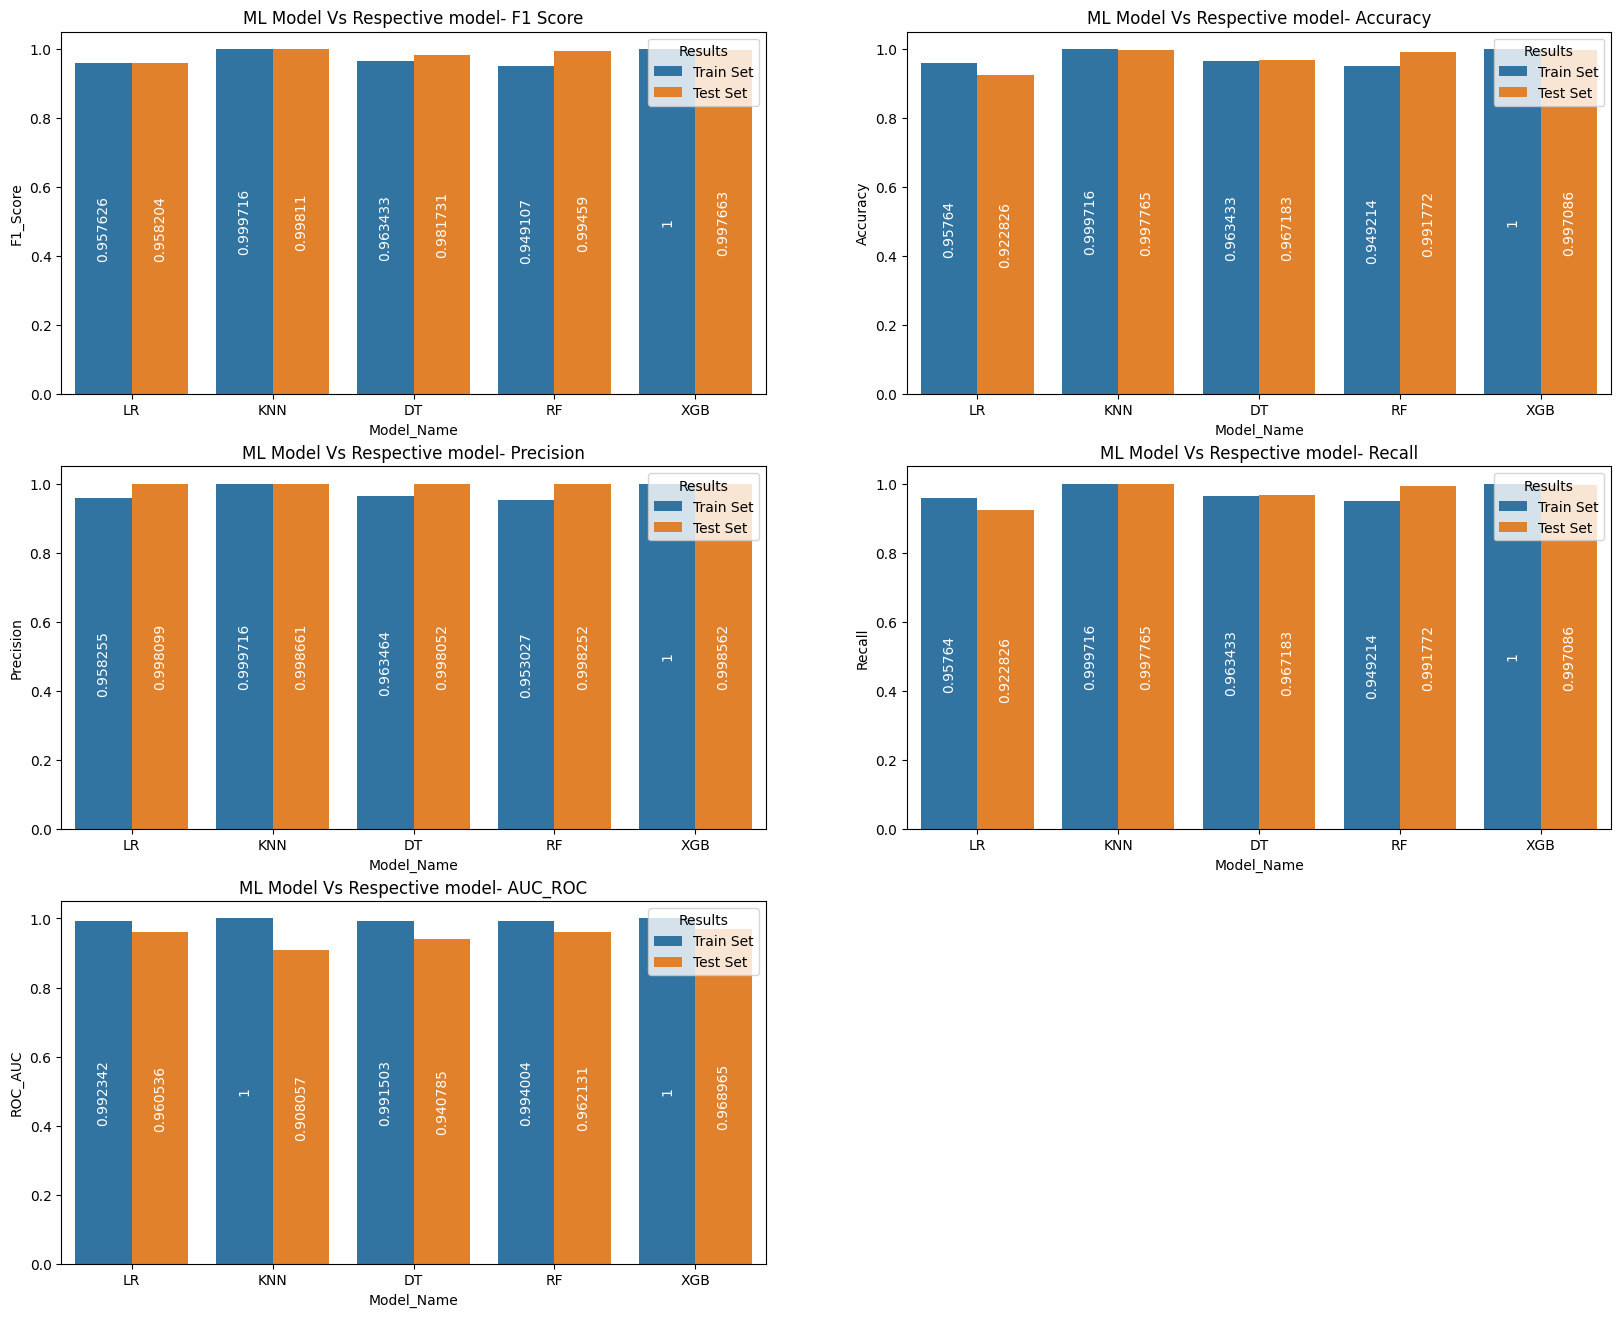

In [ ]:
# Plot Comparison of evaluation parameters for all the models]

model_eval_param(exp_results_smote, 'Train-Test', 'SMOTE Balanced')

### Model Train Results

In [ ]:
exp_results_smote

Dataset Model_Name    Results                   confusion_matrix  \
0  SMOTE Balanced         LR  Train Set  [[194234, 4786], [12075, 186945]]   
1  SMOTE Balanced         LR   Test Set         [[78717, 6578], [16, 132]]   
2  SMOTE Balanced        KNN  Train Set       [[198907, 113], [0, 199020]]   
3  SMOTE Balanced        KNN   Test Set          [[85133, 162], [29, 119]]   
4  SMOTE Balanced         DT  Train Set   [[192553, 6467], [8088, 190932]]   
5  SMOTE Balanced         DT   Test Set         [[82515, 2780], [24, 124]]   
6  SMOTE Balanced         RF  Train Set   [[198042, 978], [19237, 179783]]   
7  SMOTE Balanced         RF   Test Set          [[84616, 679], [24, 124]]   
8  SMOTE Balanced        XGB  Train Set         [[199020, 0], [0, 199020]]   
9  SMOTE Balanced        XGB   Test Set          [[85073, 222], [27, 121]]   

   Accuracy  Precision    Recall  Specificity       FPR       FNR       PPV  \
0  0.957640   0.958255  0.957640     0.975952  0.024048  0.060672  0.975038   
1  0.922826   0.998099  0.922826     0.922879  0.077121  0.108108  0.019672   
2  0.999716   0.999716  0.999716     0.999432  0.000568  0.000000  0.999433   
3  0.997765   0.998661  0.997765     0.998101  0.001899  0.195946  0.423488   
4  0.963433   0.963464  0.963433     0.967506  0.032494  0.040639  0.967239   
5  0.967183   0.998052  0.967183     0.967407  0.032593  0.162162  0.042700   
6  0.949214   0.953027  0.949214     0.995086  0.004914  0.096659  0.994590   
7  0.991772   0.998252  0.991772     0.992039  0.007961  0.162162  0.154421   
8  1.000000   1.000000  1.000000     1.000000  0.000000  0.000000  1.000000   
9  0.997086   0.998562  0.997086     0.997397  0.002603  0.182432  0.352770   

        NPV  F1_Score   ROC_AUC  Threshold  \
0  0.941471  0.957626  0.992342   0.397782   
1  0.999797  0.958204  0.960536   0.933968   
2  1.000000  0.999716  1.000000   1.000000   
3  0.999659  0.998110  0.908057   0.333333   
4  0.959689  0.963433  0.991503   0.536122   
5  0.999709  0.981731  0.940785   0.127549   
6  0.911464  0.949107  0.994004   0.301733   
7  0.999716  0.994590  0.962131   0.312452   
8  1.000000  1.000000  1.000000   0.848949   
9  0.999683  0.997663  0.968965   0.022230   

                                           Residuals  
0  Class
True     381179
False     16861
Name: co...  
1  Class
True     78849
False     6594
Name: coun...  
2  Class
True     397927
False       113
Name: co...  
3  Class
True     85252
False      191
Name: coun...  
4  Class
True     383485
False     14555
Name: co...  
5  Class
True     82639
False     2804
Name: coun...  
6  Class
True     377825
False     20215
Name: co...  
7  Class
True     84740
False      703
Name: coun...  
8     Class
True    398040
Name: count, dtype: int64  
9  Class
True     85194
False      249
Name: coun...

### Best Model

#### Outcome - Best Model
- Models Trained / Experimented - Logistic Regression, K-Nearest Neighbhor, SVM, Decision Tree, Random Forest and XGBoost
- **Random Forest (RF)** Model has better results among all the models run
  - **FPR** is low
  - **TPR** is high
  - **Threshold** is closer to 0.5
  - **Train & Test AUC_ROC** is good.

Best Model : RF - Feature Importance - 
******************************************************************************** 

Top var = 14
2nd Top var = 12
3rd Top var = 4


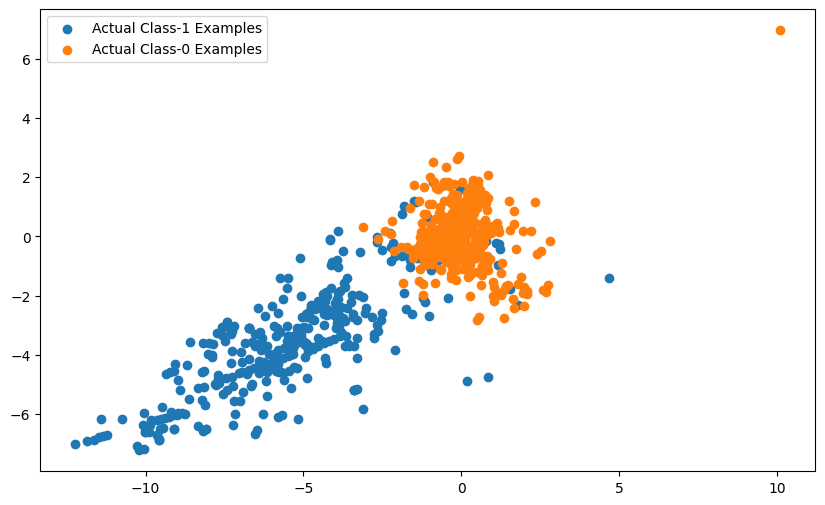

In [ ]:
# Best Model - FeatXGBure Importance
var_imp = []
clf = ML_models['RF']

# Feature Importance Function for the Best Model
print(color.BOLD+"Best Model : RF - Feature Importance"+" - "+color.BOLD)
print('*'*80,'\n')
feature_imp_model(clf, X_train_smote)

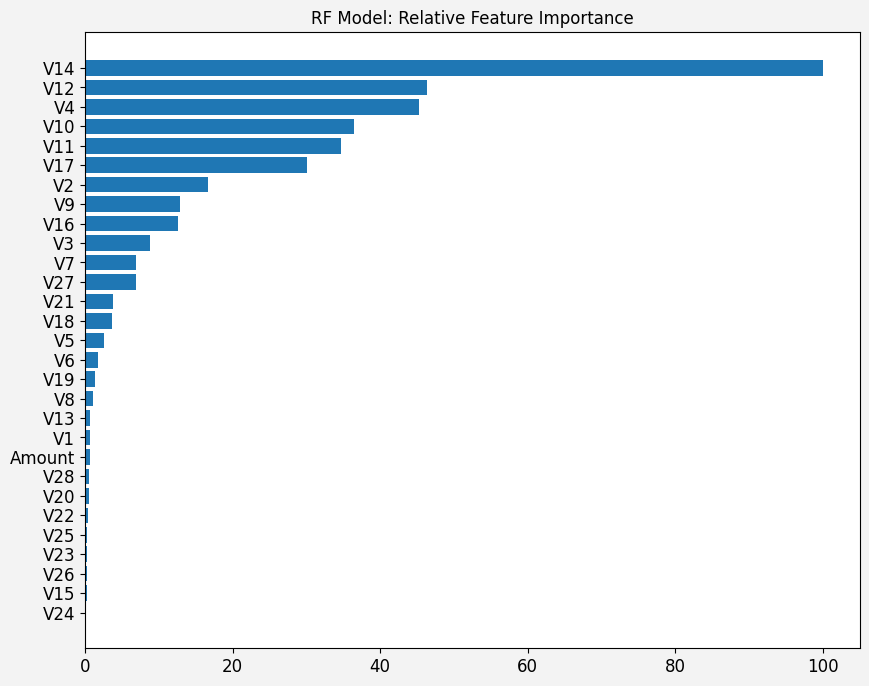

In [ ]:
# Re-Confirm the Feature Importance for the Model - XGB

clf = ML_models['RF']

verify_feature_importance(clf, X_train, 'RF')

#### Best Model - Metrics : SMOTE Balanced

In [ ]:
print(color.BOLD+'SMOTE Balanced DataSet - Best Model : XGB Metrics'+color.BOLD)
print('*'*80,'\n')
exp_results_smote[(exp_results_smote["Model_Name"]=='RF') ]

SMOTE Balanced DataSet - Best Model : XGB Metrics
******************************************************************************** 



Dataset Model_Name    Results                  confusion_matrix  \
6  SMOTE Balanced         RF  Train Set  [[198042, 978], [19237, 179783]]   
7  SMOTE Balanced         RF   Test Set         [[84616, 679], [24, 124]]   

   Accuracy  Precision    Recall  Specificity       FPR       FNR       PPV  \
6  0.949214   0.953027  0.949214     0.995086  0.004914  0.096659  0.994590   
7  0.991772   0.998252  0.991772     0.992039  0.007961  0.162162  0.154421   

        NPV  F1_Score   ROC_AUC  Threshold  \
6  0.911464  0.949107  0.994004   0.301733   
7  0.999716  0.994590  0.962131   0.312452   

                                           Residuals  
6  Class
True     377825
False     20215
Name: co...  
7  Class
True     84740
False      703
Name: coun...

### Export Results to CSV

In [ ]:
# Export to CSV
smote_ML_models = ML_models
exp_results_smote.to_csv('exp_results_smote.csv', index=False)

### Save Best Model

In [ ]:
import pickle
smote_best_model = ML_models['RF']
# save the model to disk
smote_best_model_saved = 'smote_best_model.sav'
pickle.dump(smote_best_model, open(smote_best_model_saved, 'wb'))

## AdaSyn (Adaptive Synthetic Sampling)

In [ ]:
# importing libraries
from imblearn.over_sampling import ADASYN

In [ ]:
# Creating a Dataframe to store the Model Results

# DataFrame - Model Best Parameters
#model_params_adasyn = pd.DataFrame(columns=['DataType','Model_Name', 'best_params', 'best_score'])


# Model Experiment / Train-Test Prediction Results
exp_results_adasyn = pd.DataFrame(columns=['Dataset','Model_Name', 'Results','confusion_matrix','Accuracy','Precision','Recall',
                                    'Specificity', 'FPR', 'FNR','PPV','NPV','F1_Score','ROC_AUC', 'Threshold', 'Residuals' ])

In [ ]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

# New class distribution
print('New class distribution:', Counter(y_train_adasyn))

Before sampling class distribution: Counter({0: 199020, 1: 344})
New class distribution: Counter({1: 199035, 0: 199020})


### Logistic Regression

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = lr_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_adasyn, y_train_adasyn, 'LR')

# Save results to Dataframe
new_row =  {'DataType' : 'ADASYN Balanced','Model_Name':'LR', 'best_params':best_params, 'best_score':best_score}
model_params_adasyn.loc[len(model_params_adasyn)] = new_row
model_params_adasyn



LR Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 04:24:05
Fitting 30 folds for each of 15 candidates, totalling 450 fits
End Time = 04:27:34


Best Param :  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score :  0.972464882432207
------------------------------------------------------------ 

Print Results
************************************************************ 

0.972463 (0.000710) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972459 (0.000710) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.972465 (0.000710) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.972463 (0.000710) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972459 (0.000710) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.972465 (0.000710) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.972462 (0.000710) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.97

DataType Model_Name  \
0  ADASYN Balanced         LR   

                                         best_params  best_score  
0  {'C': 100, 'penalty': 'l2', 'solver': 'libline...    0.972465

### Decision Tree

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = dt_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_adasyn, y_train_adasyn, 'DT')

# Save results to Dataframe
new_row =  {'DataType' : 'ADASYN Balanced','Model_Name':'DT', 'best_params':best_params, 'best_score':best_score}
model_params_adasyn.loc[len(model_params_adasyn)] = new_row
model_params_adasyn



DT Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 04:27:34
Fitting 10 folds for each of 8 candidates, totalling 80 fits
End Time = 04:29:33


Best Param :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}
Best Score :  0.9708642926967357
------------------------------------------------------------ 

Print Results
************************************************************ 

0.970863 (0.001029) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}
0.970864 (0.001028) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}
0.970863 (0.001028) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
0.970863 (0.001028) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}
0.970116 (0.000520) with: {'criterion': 

DataType Model_Name  \
0  ADASYN Balanced         LR   
1  ADASYN Balanced         DT   

                                         best_params  best_score  
0  {'C': 100, 'penalty': 'l2', 'solver': 'libline...    0.972465  
1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...    0.970864

### Random Forest

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = rf_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_adasyn, y_train_adasyn, 'RF')

# Save results to Dataframe
new_row =  {'DataType' : 'ADASYN Balanced','Model_Name':'RF', 'best_params':best_params, 'best_score':best_score}
model_params_adasyn.loc[len(model_params_adasyn)] = new_row
model_params_adasyn



RF Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 04:29:33
Fitting 10 folds for each of 24 candidates, totalling 240 fits
End Time = 05:30:40


Best Param :  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
Best Score :  0.9883683949913028
------------------------------------------------------------ 

Print Results
************************************************************ 

0.984300 (0.002108) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 10}
0.988120 (0.000354) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}
0.988368 (0.000563) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
0.984884 (0.001658) with: {'max_depth': 5, 'max_features': 's

DataType Model_Name  \
0  ADASYN Balanced         LR   
1  ADASYN Balanced         DT   
2  ADASYN Balanced         RF   

                                         best_params  best_score  
0  {'C': 100, 'penalty': 'l2', 'solver': 'libline...    0.972465  
1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...    0.970864  
2  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.988368

### XGBoost

In [ ]:
#  GridSearchCV to get best parameters
# define models and parameters
model_cv = xgb_set_GridSearch()

# Fit Model and get cv results
best_score, best_params = get_cv_results(model_cv, X_train_adasyn, y_train_adasyn, 'XGB')

# Save results to Dataframe
new_row =  {'DataType' : 'ADASYN Balanced','Model_Name':'XGB', 'best_params':best_params, 'best_score':best_score}
model_params_adasyn.loc[len(model_params_adasyn)] = new_row
model_params_adasyn



XGB Model - Finding Best Parameters Values using GridSearchCV
************************************************************ 

Start Time = 05:32:20
Fitting 10 folds for each of 12 candidates, totalling 120 fits
End Time = 05:34:21


Best Param :  {'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.6}
Best Score :  0.9999921817003999
------------------------------------------------------------ 

Print Results
************************************************************ 

0.995464 (0.000345) with: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.3}
0.995318 (0.000377) with: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.6}
0.999894 (0.000039) with: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.3}
0.999899 (0.000033) with: {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.6}
0.999982 (0.000012) with: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.3}
0.999981 (0.000010) with: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample'

DataType Model_Name  \
0  ADASYN Balanced         LR   
1  ADASYN Balanced         DT   
2  ADASYN Balanced         RF   
3  ADASYN Balanced        XGB   

                                         best_params  best_score  
0  {'C': 100, 'penalty': 'l2', 'solver': 'libline...    0.972465  
1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...    0.970864  
2  {'max_depth': 5, 'max_features': 'sqrt', 'min_...    0.988368  
3  {'learning_rate': 0.2, 'n_estimators': 200, 's...    0.999992

### Saving the Params

In [ ]:
# Creating a Dataframe to store the Imbalance HyperParameter Results for each model
# Creating dataframe and storing in CSV, as the runtime for each for each of models is time consuming.
# Please note that HyperTuning has been done with 1 GPU, 32 MB on JarvisLabs (AWS) platform.
# will be embedding the CV results images for each model and avoid execution of the same multiple times.


# Export to CSV
model_params_adasyn.to_csv('model_params_adasyn.csv', index=False)

## Model Training - ADASYN

************************************************************ 

Model-LR Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    199020
           1       0.92      0.89      0.91    199035

    accuracy                           0.91    398055
   macro avg       0.91      0.91      0.91    398055
weighted avg       0.91      0.91      0.91    398055

------------------------------------------------------------ 

Getting Test Metrics...
Model-LR Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     85295
           1       0.01      0.91      0.02       148

    accuracy                           0.84     85443


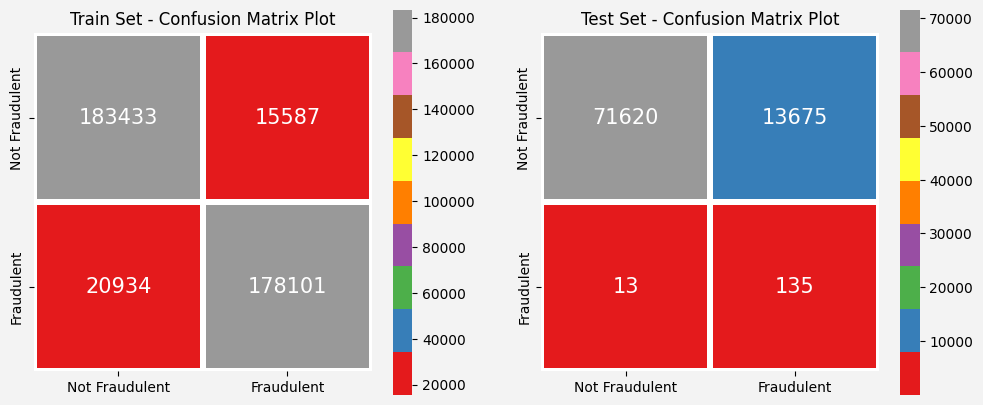

------------------------------------------------------------ 



Model - LR Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
0         LR  Train Set     0.921681  0.908251  0.078319  0.919525  0.897567   
1         LR   Test Set     0.839674  0.839800  0.160326  0.009776  0.999819   

   Threshold  
0    0.46265  
1    0.99129  
------------------------------------------------------------ 

Model - LR : Number of Train values correctly predicted
Class
True     361534
False     36521
Name: count, dtype: int64
------------------------------------------------------------ 

Model - LR : Number of Test values correctly predicted
Class
True     71755
False    13688
Name: count, dtype: int64


Model - LR ROC Curve
************************************************************ 



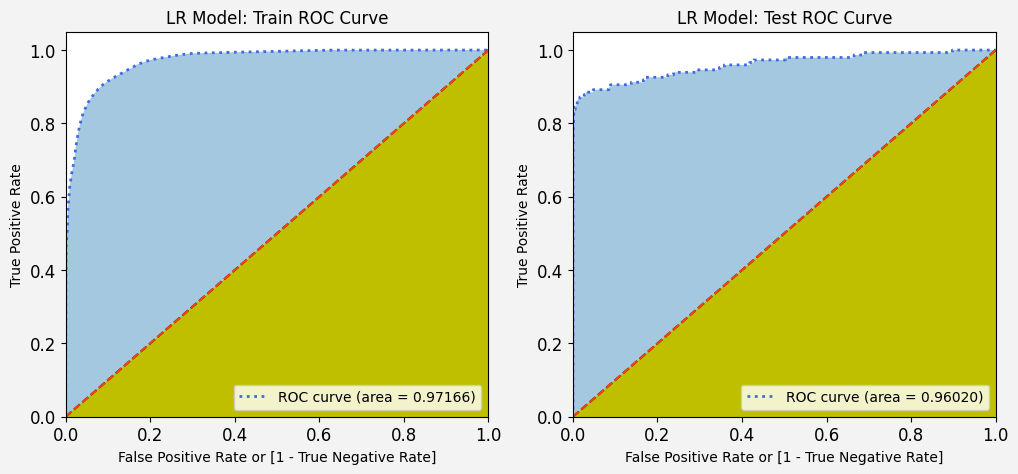

------------------------------------------------------------ 



Model - LR Precision Recall Curve
************************************************************ 



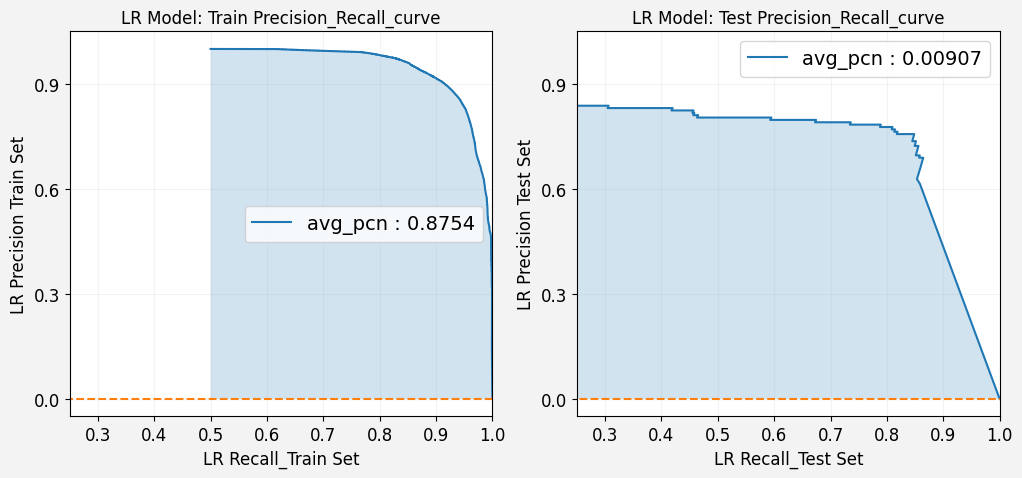

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-KNN Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199035

    accuracy                           1.00    398055
   macro avg       1.00      1.00      1.00    398055
weighted avg       1.00      1.00      1.00    398055

------------------------------------------------------------ 

Getting Test Metrics...
Model-KNN Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

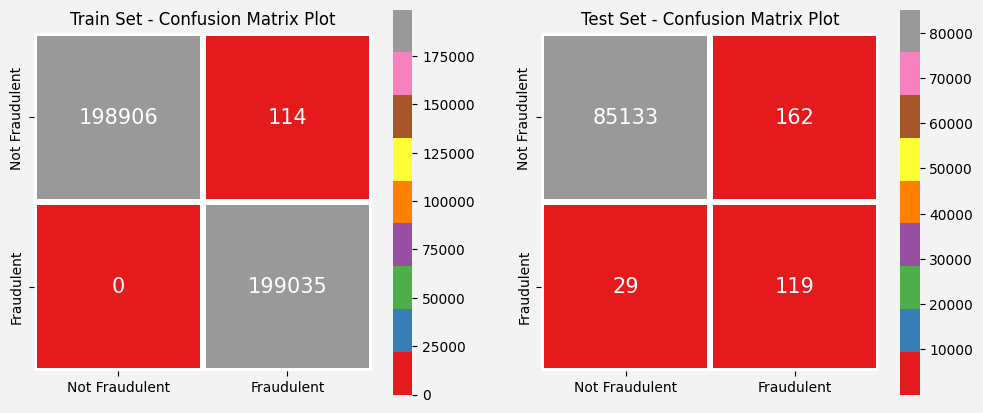

------------------------------------------------------------ 



Model - KNN Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
2        KNN  Train Set     0.999427  0.999714  0.000573  0.999428  1.000000   
3        KNN   Test Set     0.998101  0.997765  0.001899  0.423488  0.999659   

   Threshold  
2   1.000000  
3   0.333333  
------------------------------------------------------------ 

Model - KNN : Number of Train values correctly predicted
Class
True     397941
False       114
Name: count, dtype: int64
------------------------------------------------------------ 

Model - KNN : Number of Test values correctly predicted
Class
True     85252
False      191
Name: count, dtype: int64


Model - KNN ROC Curve
************************************************************ 



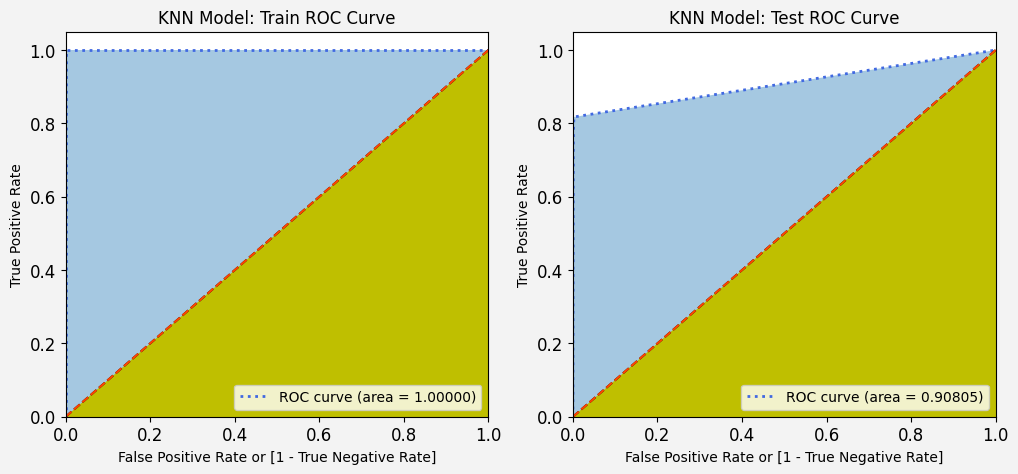

------------------------------------------------------------ 



Model - KNN Precision Recall Curve
************************************************************ 



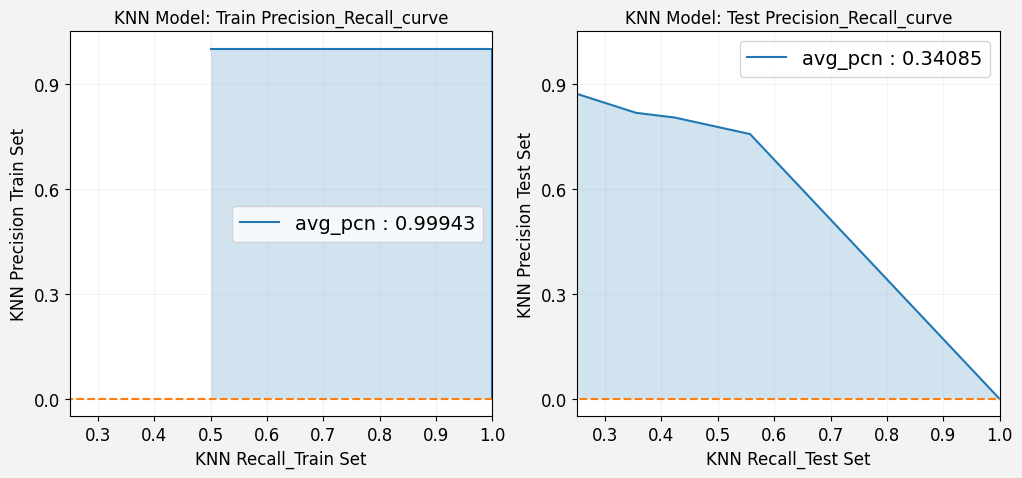

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-DT Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.97      0.89      0.93    199020
           1       0.90      0.97      0.93    199035

    accuracy                           0.93    398055
   macro avg       0.93      0.93      0.93    398055
weighted avg       0.93      0.93      0.93    398055

------------------------------------------------------------ 

Getting Test Metrics...
Model-DT Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.89  

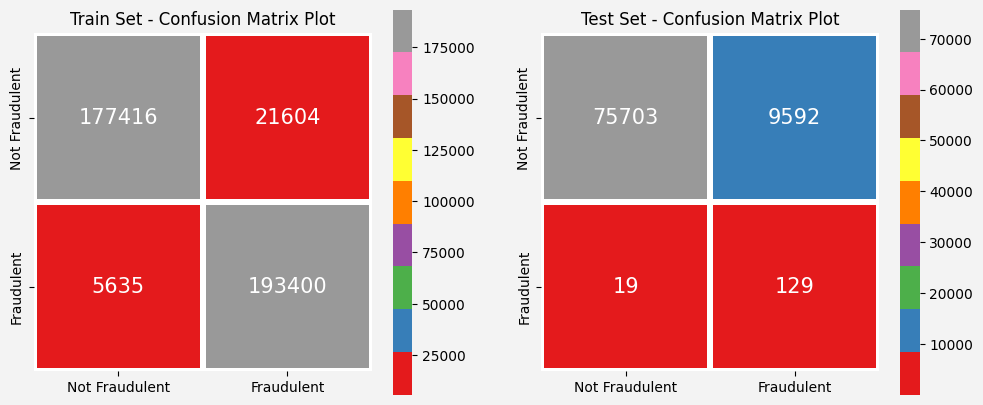

------------------------------------------------------------ 



Model - DT Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
4         DT  Train Set     0.891448  0.931570  0.108552  0.899518  0.969216   
5         DT   Test Set     0.887543  0.887516  0.112457  0.013270  0.999749   

   Threshold  
4   0.570673  
5   0.853967  
------------------------------------------------------------ 

Model - DT : Number of Train values correctly predicted
Class
True     370816
False     27239
Name: count, dtype: int64
------------------------------------------------------------ 

Model - DT : Number of Test values correctly predicted
Class
True     75832
False     9611
Name: count, dtype: int64


Model - DT ROC Curve
************************************************************ 



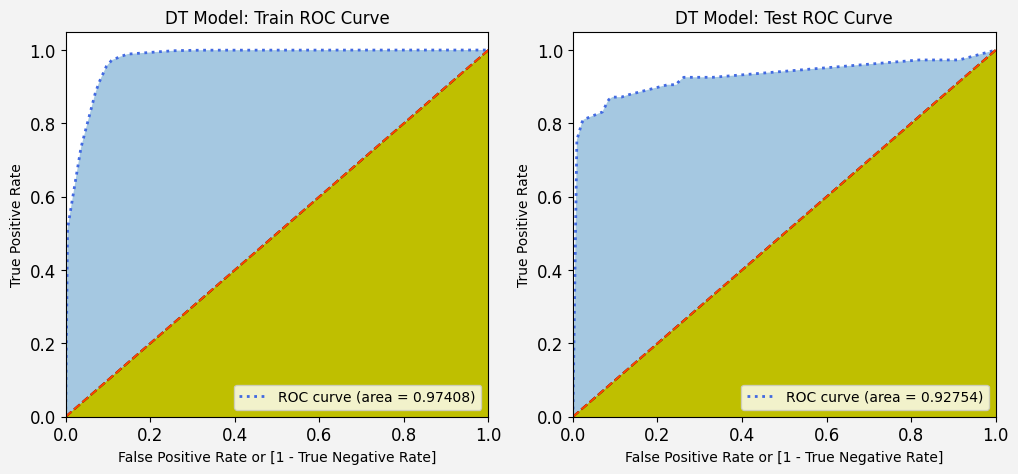

------------------------------------------------------------ 



Model - DT Precision Recall Curve
************************************************************ 



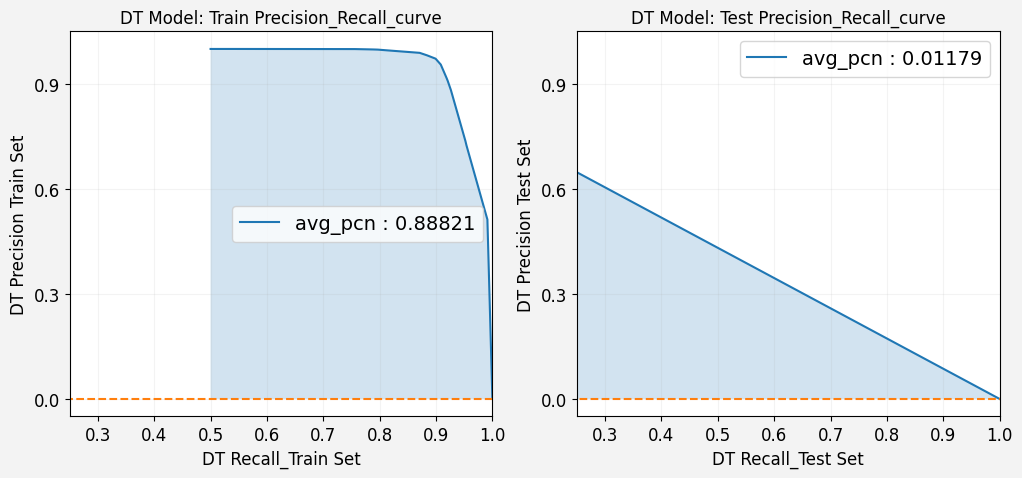

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-RF Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.96      0.92      0.94    199035

    accuracy                           0.94    398055
   macro avg       0.94      0.94      0.94    398055
weighted avg       0.94      0.94      0.94    398055

------------------------------------------------------------ 

Getting Test Metrics...
Model-RF Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.97  

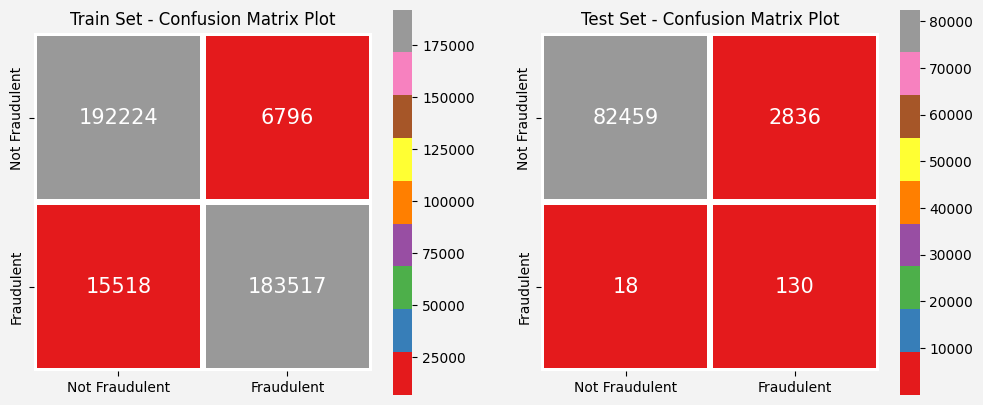

------------------------------------------------------------ 



Model - RF Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR      PPV       NPV  \
6         RF  Train Set     0.965853  0.943942  0.034147  0.96429  0.925302   
7         RF   Test Set     0.966751  0.966598  0.033249  0.04383  0.999782   

   Threshold  
6   0.404333  
7   0.494685  
------------------------------------------------------------ 

Model - RF : Number of Train values correctly predicted
Class
True     375741
False     22314
Name: count, dtype: int64
------------------------------------------------------------ 

Model - RF : Number of Test values correctly predicted
Class
True     82589
False     2854
Name: count, dtype: int64


Model - RF ROC Curve
************************************************************ 



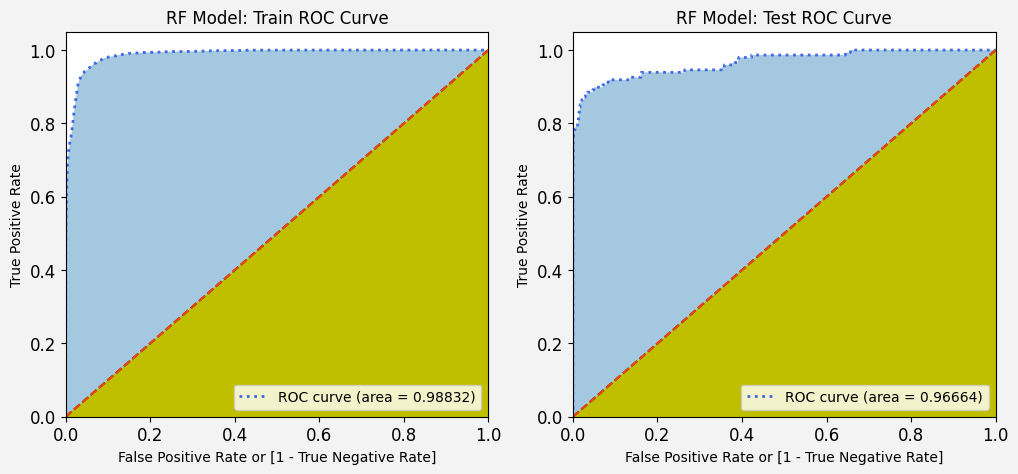

------------------------------------------------------------ 



Model - RF Precision Recall Curve
************************************************************ 



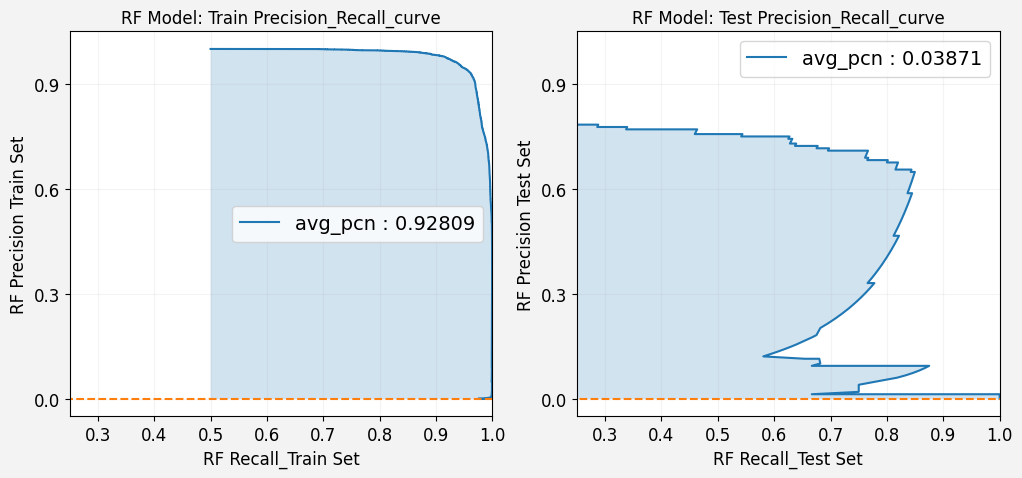

------------------------------------------------------------ 

************************************************************ 



************************************************************ 

Model-XGB Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199035

    accuracy                           1.00    398055
   macro avg       1.00      1.00      1.00    398055
weighted avg       1.00      1.00      1.00    398055

------------------------------------------------------------ 

Getting Test Metrics...
Model-XGB Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00

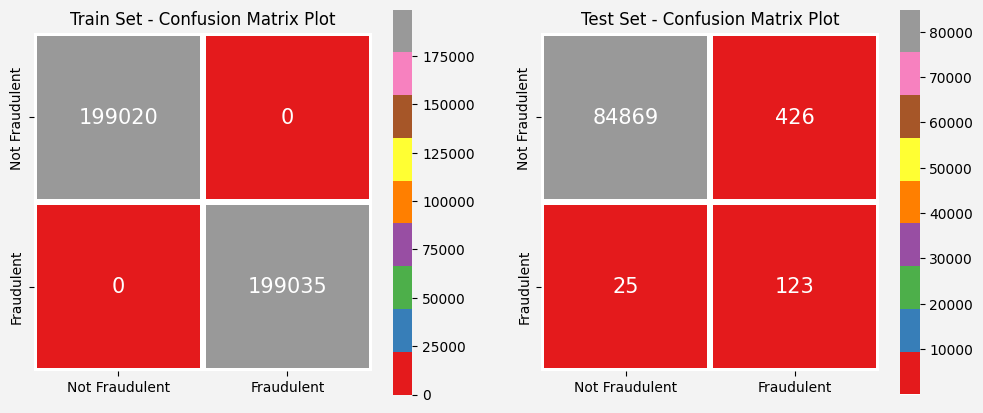

------------------------------------------------------------ 



Model - XGB Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
8        XGB  Train Set     1.000000  1.000000  0.000000  1.000000  1.000000   
9        XGB   Test Set     0.995006  0.994722  0.004994  0.224044  0.999706   

   Threshold  
8   0.905991  
9   0.014746  
------------------------------------------------------------ 

Model - XGB : Number of Train values correctly predicted
Class
True    398055
Name: count, dtype: int64
------------------------------------------------------------ 

Model - XGB : Number of Test values correctly predicted
Class
True     84992
False      451
Name: count, dtype: int64


Model - XGB ROC Curve
************************************************************ 



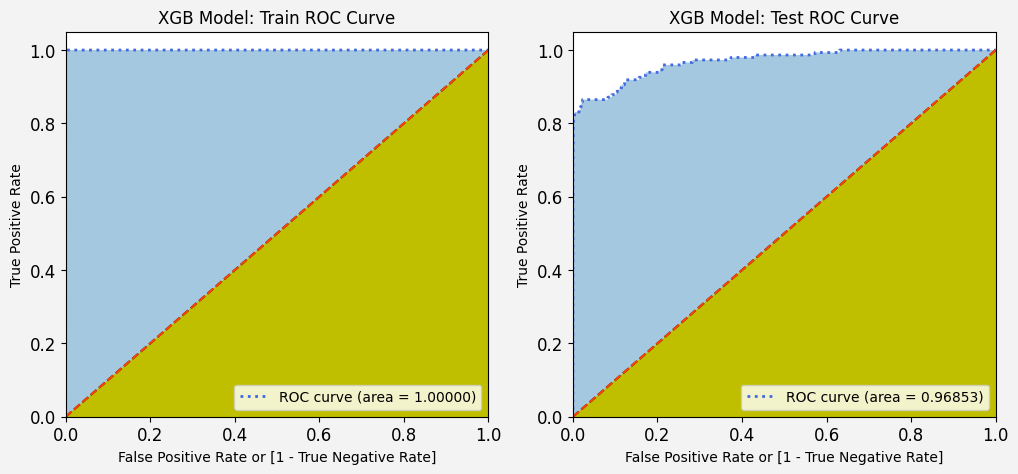

------------------------------------------------------------ 



Model - XGB Precision Recall Curve
************************************************************ 



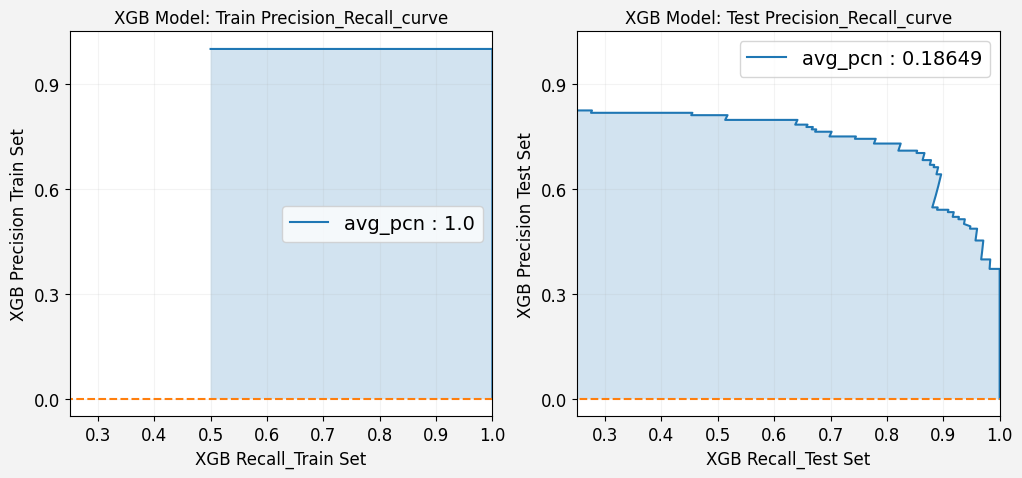

------------------------------------------------------------ 

************************************************************ 





Models
************************************************************ 

{'LR': LogisticRegression(C=100, solver='liblinear'), 'KNN': KNeighborsClassifier(n_neighbors=3), 'DT': DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100), 'RF': RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=200), 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              ma

In [ ]:
# Train Model Summary
#train_summary = []
ML_models = {}

# ML Models to Train

model_index = ['LR', 'KNN', 'DT','RF', 'XGB']
model_sklearn = [LogisticRegression(penalty='l2', C=100, solver='liblinear'),
                 # Using KNN  with Default
                 KNeighborsClassifier(n_neighbors=3),
                 DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=50, min_samples_split=100),
                 RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=50, min_samples_split=50, n_estimators=200),
                 XGBClassifier(learning_rate=0.2, n_estimators=200, subsample=0.6, eval_metric='mlogloss',use_label_encoder=False)]


# Calling Defined Function for model Fitment and printing results
model_fitment(model_index, model_sklearn, 'ADASYN Balanced', exp_results_adasyn, X_train_adasyn, y_train_adasyn)


# Print Model Details
print('\n')
print (color.BOLD+"Models"+color.END)
print('*'*60, '\n')
print(ML_models)
print('-'*60, '\n')
print('\n')


### Residuals

In [ ]:
# Print Residuals for all models
#exp_results=exp_results.reset_index(drop=True, inplace=True)
model_index = ['LR', 'KNN','DT','RF', 'XGB']
print_ml_residuals(model_index, 'ADASYN Balanced', exp_results_adasyn )

***************Model LR - ADASYN Balanced Data Set******************
Residuals - Train Set
************************************************************ 

                                           Residuals
0  Class
True     361534
False     36521
Name: co...
------------------------------------------------------------ 

Residuals - Test Set
************************************************************ 

                                           Residuals
1  Class
True     71755
False    13688
Name: coun...
------------------------------------------------------------ 



***************Model KNN - ADASYN Balanced Data Set******************
Residuals - Train Set
************************************************************ 

                                           Residuals
2  Class
True     397941
False       114
Name: co...
------------------------------------------------------------ 

Residuals - Test Set
************************************************************ 

              

### Evaluation Plot

Model Wise Evaluation Parameters Comparison  for ADASYN Balanced - Train-Test
******************************************************************************** 



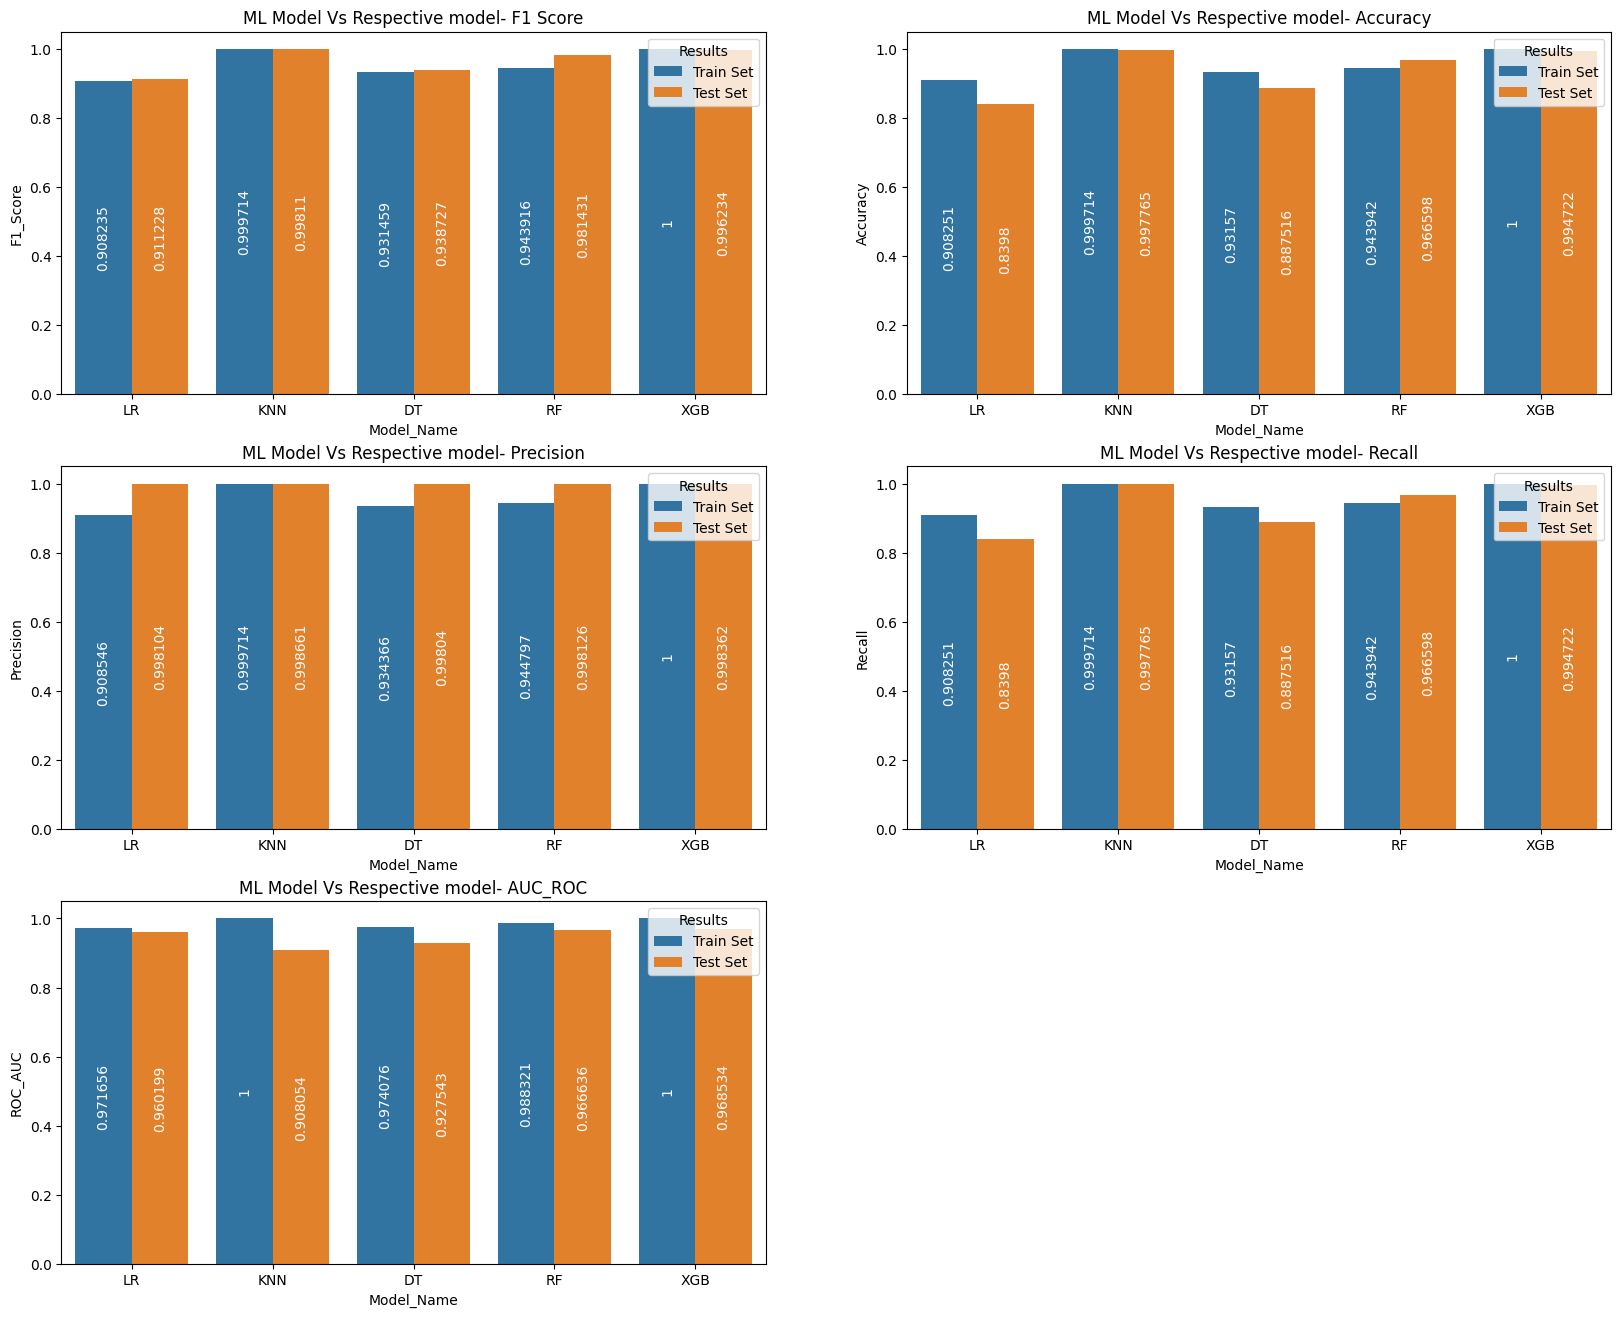

In [ ]:
# Plot Comparison of evaluation parameters for all the models]

model_eval_param(exp_results_adasyn, 'Train-Test', 'ADASYN Balanced')

### Model Train Metrics

In [ ]:
exp_results_adasyn

Dataset Model_Name    Results                    confusion_matrix  \
0  ADASYN Balanced         LR  Train Set  [[183433, 15587], [20934, 178101]]   
1  ADASYN Balanced         LR   Test Set         [[71620, 13675], [13, 135]]   
2  ADASYN Balanced        KNN  Train Set        [[198906, 114], [0, 199035]]   
3  ADASYN Balanced        KNN   Test Set           [[85133, 162], [29, 119]]   
4  ADASYN Balanced         DT  Train Set   [[177416, 21604], [5635, 193400]]   
5  ADASYN Balanced         DT   Test Set          [[75703, 9592], [19, 129]]   
6  ADASYN Balanced         RF  Train Set   [[192224, 6796], [15518, 183517]]   
7  ADASYN Balanced         RF   Test Set          [[82459, 2836], [18, 130]]   
8  ADASYN Balanced        XGB  Train Set          [[199020, 0], [0, 199035]]   
9  ADASYN Balanced        XGB   Test Set           [[84869, 426], [25, 123]]   

   Accuracy  Precision    Recall  Specificity       FPR       FNR       PPV  \
0  0.908251   0.908546  0.908251     0.921681  0.078319  0.105177  0.919525   
1  0.839800   0.998104  0.839800     0.839674  0.160326  0.087838  0.009776   
2  0.999714   0.999714  0.999714     0.999427  0.000573  0.000000  0.999428   
3  0.997765   0.998661  0.997765     0.998101  0.001899  0.195946  0.423488   
4  0.931570   0.934366  0.931570     0.891448  0.108552  0.028312  0.899518   
5  0.887516   0.998040  0.887516     0.887543  0.112457  0.128378  0.013270   
6  0.943942   0.944797  0.943942     0.965853  0.034147  0.077966  0.964290   
7  0.966598   0.998126  0.966598     0.966751  0.033249  0.121622  0.043830   
8  1.000000   1.000000  1.000000     1.000000  0.000000  0.000000  1.000000   
9  0.994722   0.998362  0.994722     0.995006  0.004994  0.168919  0.224044   

        NPV  F1_Score   ROC_AUC  Threshold  \
0  0.897567  0.908235  0.971656   0.462650   
1  0.999819  0.911228  0.960199   0.991290   
2  1.000000  0.999714  1.000000   1.000000   
3  0.999659  0.998110  0.908054   0.333333   
4  0.969216  0.931459  0.974076   0.570673   
5  0.999749  0.938727  0.927543   0.853967   
6  0.925302  0.943916  0.988321   0.404333   
7  0.999782  0.981431  0.966636   0.494685   
8  1.000000  1.000000  1.000000   0.905991   
9  0.999706  0.996234  0.968534   0.014746   

                                           Residuals  
0  Class
True     361534
False     36521
Name: co...  
1  Class
True     71755
False    13688
Name: coun...  
2  Class
True     397941
False       114
Name: co...  
3  Class
True     85252
False      191
Name: coun...  
4  Class
True     370816
False     27239
Name: co...  
5  Class
True     75832
False     9611
Name: coun...  
6  Class
True     375741
False     22314
Name: co...  
7  Class
True     82589
False     2854
Name: coun...  
8     Class
True    398055
Name: count, dtype: int64  
9  Class
True     84992
False      451
Name: coun...

### Best Model

#### Outcome - Best Model
- Models Trained / Experimented - Logistic Regression, K-Nearest Neighbhor, SVM, Decision Tree, Random Forest and XGBoost
- **Random Forest (RF)** Model has better results among all the models run
  - **FPR** is low
  - **TPR** is high
  - **Threshold** is closer to 0.5
  - **Train & Test AUC_ROC** is good.

Best Model : RF - Feature Importance - 
******************************************************************************** 

Top var = 4
2nd Top var = 14
3rd Top var = 17


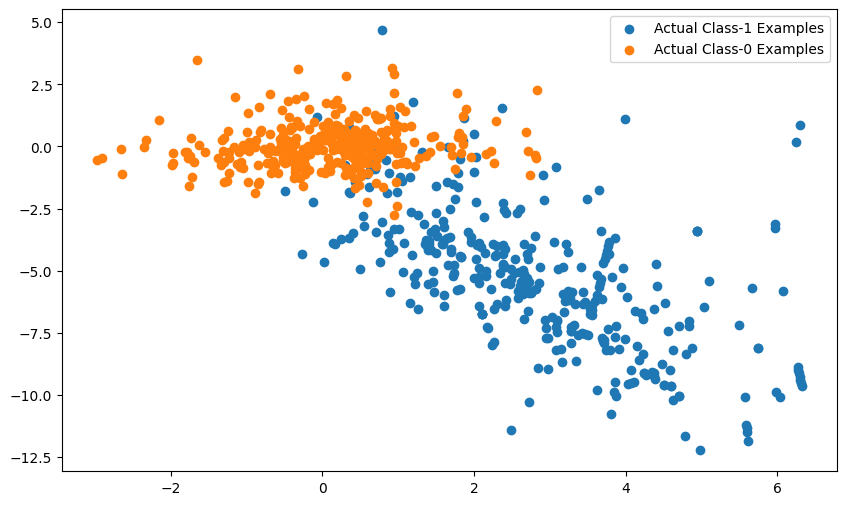

In [ ]:
# Best Model - Feature Importance
var_imp = []
clf = ML_models['RF']

# Feature Importance Function for the Best Model
print(color.BOLD+"Best Model : RF - Feature Importance"+" - "+color.BOLD)
print('*'*80,'\n')
feature_imp_model(clf, X_train_adasyn)

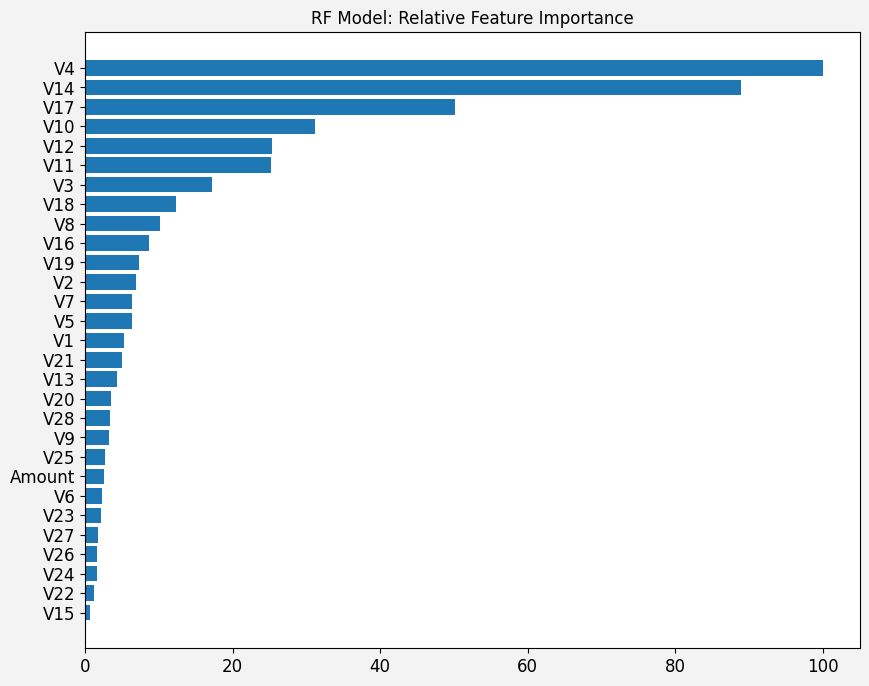

In [ ]:
# Re-Confirm the Feature Importance for the Model - XGB

clf = ML_models['RF']

verify_feature_importance(clf, X_train, 'RF')

### Best Model - Metrics : ADASYN Balanced

In [ ]:
print(color.BOLD+'ADASYN Balanced DataSet - Best Model : RF Metrics'+color.BOLD)
print('*'*80,'\n')
exp_results_adasyn[(exp_results_adasyn["Model_Name"]=='RF') ]

ADASYN Balanced DataSet - Best Model : RF Metrics
******************************************************************************** 



Dataset Model_Name    Results                   confusion_matrix  \
6  ADASYN Balanced         RF  Train Set  [[192224, 6796], [15518, 183517]]   
7  ADASYN Balanced         RF   Test Set         [[82459, 2836], [18, 130]]   

   Accuracy  Precision    Recall  Specificity       FPR       FNR      PPV  \
6  0.943942   0.944797  0.943942     0.965853  0.034147  0.077966  0.96429   
7  0.966598   0.998126  0.966598     0.966751  0.033249  0.121622  0.04383   

        NPV  F1_Score   ROC_AUC  Threshold  \
6  0.925302  0.943916  0.988321   0.404333   
7  0.999782  0.981431  0.966636   0.494685   

                                           Residuals  
6  Class
True     375741
False     22314
Name: co...  
7  Class
True     82589
False     2854
Name: coun...

### Export Results to CSV

In [ ]:
# Export to CSV
adasyn_ML_models = ML_models
exp_results_adasyn.to_csv('exp_results_adasyn.csv', index=False)

### Save Best Model

In [ ]:
import pickle
adasyn_best_model = ML_models['RF']
# save the model to disk
adasyn_best_model_saved = 'adasyn_best_model.sav'
pickle.dump(adasyn_best_model, open(adasyn_best_model_saved, 'wb'))

# Best Model - Overall

**Select the oversampling method which shows the best result on a model**
- Apply the best hyperparameter on the model
- Predict on the test dataset

**Best Model - OverSampling ADASYN - RandomForest**

## Best Model - Random Forest - ADASYN

************************************************************ 

Model-RF Fitting Train Set
************************************************************ 

Train Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       0.92      0.97      0.94    199020
           1       0.96      0.92      0.94    199035

    accuracy                           0.94    398055
   macro avg       0.94      0.94      0.94    398055
weighted avg       0.94      0.94      0.94    398055

------------------------------------------------------------ 

Getting Test Metrics...
Model-RF Fitting Test Set
Test Set - Classification Report
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.89      0.08       148

    accuracy                           0.97     85443


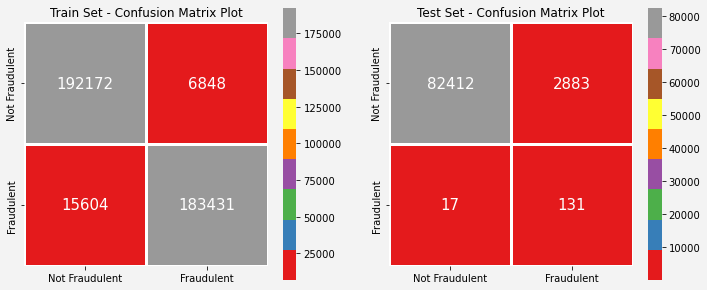

------------------------------------------------------------ 



Model - RF Print Metrics
************************************************************ 

  Model_Name    Results  Specificity    Recall       FPR       PPV       NPV  \
0         RF  Train Set     0.965591  0.943596  0.034409  0.964011  0.924900   
1         RF   Test Set     0.966200  0.966059  0.033800  0.043464  0.999794   

   Threshold  
0   0.461795  
1   0.518340  
------------------------------------------------------------ 

Model - RF : Number of Train values correctly predicted
True     375603
False     22452
Name: Class, dtype: int64
------------------------------------------------------------ 

Model - RF : Number of Test values correctly predicted
True     82543
False     2900
Name: Class, dtype: int64


Model - RF ROC Curve
************************************************************ 



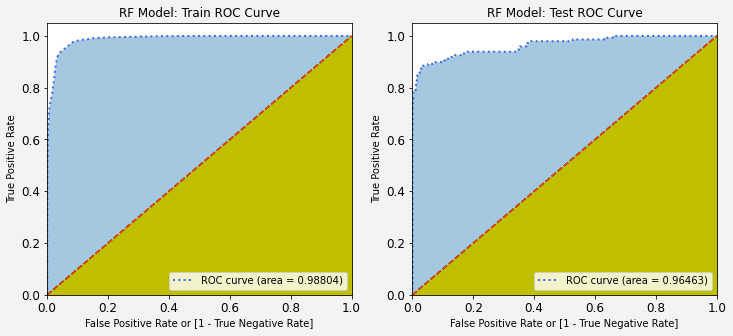

------------------------------------------------------------ 



Model - RF Precision Recall Curve
************************************************************ 



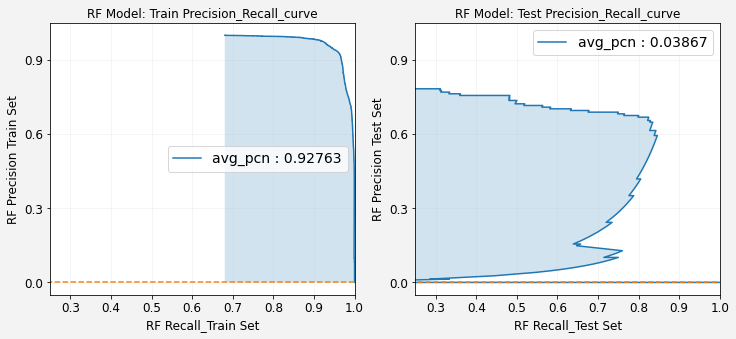

------------------------------------------------------------ 

************************************************************ 





In [ ]:
# perform the best oversampling method on X_train & y_train
# Create Dataframe to save Best Model Results
# Model Experiment / Train-Test Prediction Results
best_model_df = pd.DataFrame(columns=['Dataset','Model_Name', 'Results','confusion_matrix','Accuracy','Precision','Recall',
                                    'Specificity', 'FPR', 'FNR','PPV','NPV','F1_Score','ROC_AUC', 'Threshold', 'Residuals' ])
# Train Model Summary
#train_summary = []
ML_models = {}

# ML Models to Train

model_index = ['RF']
model_sklearn = [RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=50, min_samples_split=50, n_estimators=200)]


# Calling Defined Function for model Fitment and printing results
model_fitment(model_index, model_sklearn, 'ADASYN Balanced', best_model_df, X_train_adasyn, y_train_adasyn)

## Best Model - RandomForest(Adasyn) - Feature Importance

## Print the important features of the best model to understand the dataset

Best Model : RF - Feature Importance - 
******************************************************************************** 

Top var = 4
2nd Top var = 14
3rd Top var = 17


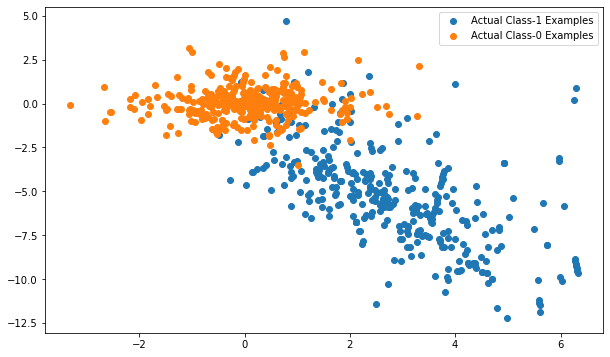

In [ ]:
# Best Model - Feature Importance
var_imp = []
clf = ML_models['RF']

# Feature Importance Function for the Best Model
print(color.BOLD+"Best Model : RF - Feature Importance"+" - "+color.BOLD)
print('*'*80,'\n')
feature_imp_model(clf, X_train_adasyn)

## FPR,TPR & select the best threshold from the roc curve

In [ ]:
# Train - Print the FPR,TPR & select the best threshold from the roc curve
from tabulate import tabulate

y_train_pred = clf.predict(X_train_adasyn)
y_train_pred_proba = clf.predict_proba(X_train_adasyn)[:,1]
fpr,tpr,thresholds = roc_curve(y_train_adasyn, y_train_pred_proba)
tr_threshold = thresholds[np.argmax(tpr-fpr)]


# Test - Print the FPR,TPR & select the best threshold from the roc curve
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_test_pred_proba)
ts_threshold = thresholds[np.argmax(tpr-fpr)]



print(color.BOLD+"Best Model : RandomForest - Best Threshold"+color.END)
print('*'*80,'\n')
print(color.BOLD+tabulate([['Train ', tr_threshold], ['Test', ts_threshold]], headers=['Dataset', 'Threshold'])+color.END)
print('-'*80,'\n')
print(color.BOLD+"Best Model : RandomForest - Metrics"+color.END)
print('*'*80,'\n')
print(best_model_df[["Results", "Specificity", "Recall", "FPR", "PPV", "NPV"]])

print('-'*80,'\n')

Best Model : RandomForest - Best Threshold
******************************************************************************** 

Dataset      Threshold
---------  -----------
Train         0.461795
Test          0.51834
-------------------------------------------------------------------------------- 

Best Model : RandomForest - Metrics
******************************************************************************** 

     Results  Specificity    Recall       FPR       PPV       NPV
0  Train Set     0.965591  0.943596  0.034409  0.964011  0.924900
1   Test Set     0.966200  0.966059  0.033800  0.043464  0.999794
-------------------------------------------------------------------------------- 



## Save Best Model

In [ ]:
import pickle
overall_best_model = ML_models['RF']
# save the model to disk
overall_best_model_saved = 'overall_best_model.sav'
pickle.dump(overall_best_model, open(overall_best_model_saved, 'wb'))

# **Summary**



## Activities Performed

- **Data Preparation**
  - Performed Data Exploration
  - Checked and Addressed Data Skewness
  - Stratified Train-Test Split applied
- **Model Building**
  - Performed Cross-Validation & Hypertuning
  - Imbalance Data
    - Built Models (Logistic Regression, KNN, SVM, Decision Tree RandomForest and XGBoost)
  - Balancing Data
    - Applied RandomOversampling (ROS), SMOTE and ADASYN balancing Techniques and Built Models
      - Dropped SVM model from Balanced Dataset, as the Data Size increased.
    - Models Built (Logistic Regression, KNN, SVM, Decision Tree, RandomForest and XGBoost)
- **Model Evaluation**
  - Used AUC_ROC, FPR, TPR and Threshold for evaluating and identifying best model.
  - Evaluated and Identified Best performing models for each Imbalanced Dataset, ROS, SMOTE and ADASYN
  - Identified Best Model Overall - **RandomForest using ADASYN**
- **Python Notebook Coding**
  - Comments and Headings Added
  - Written Common Functions to reduce the repeatable code.

## **Cost benefit analysis**


- Models runs demonstrated better results when we balanced the dataset.
  - Though certain metrics remained consistent.
- We dropped SVM model as the datasize increased and it required  infrastructure with higher configuration in terms of resources and computational power.
  - Used Infrasture with 1 GPU, 32 GD RAM and 16 GB VRAM.
- Best Model RandomForest for Balanced Data (ADASYN) identfied and selected based on the Model Evaluation metrics and Infrastructure requirements.


## **Final Outcome**

- After executing the model runs and observing the metrics, conclude that High-value fraudulent transactions can be detected observing the FPR, TPR, AUC_ROC and Threshold Scores.
- In our case, **RandomForest (Adasyn)** is the **Best Model**, with following Metrics:
**Best Model : RandomForest - Metrics**
************************************************************************
- **Train Set**
  - **Recall/TPR** : 0.943596
  - **FPR**        : 0.034409
  - **AUC_ROC**    : 0.988321
  - **Threshold**  : 0.461795
- **Test Set**
  - **Recall/TPR** : 0.966059
  - **FPR**        : 0.033800
  - **AUC_ROC**    : 0.966636
  - **Threshold**  :  0.51834


------------------------------------------------------------------------

